<h1>Getting the Environment Set Up</h1>

We will be using tensorflow to create and use our neural networks. Throughout this notebook, we will see just how easy it is to make a working neural network that has a surprisingly high accuary!

In [1]:
import tensorflow as tf
from tensorflow import keras

<h1>Managing our Images</h1>

In [2]:
# parameters
input_shape = (28, 28) # the image is 28x28
num_classes = 10 # 10 labels
num_epochs = 5 # 5 training iterations, we bump this down because the model takes longer to train

# TODO You can change to the numbers MNIST dataset if you'd like to see how it works on different images
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ("T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
           "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot")

# 60,000 images with each image being 28 by 28 pixels
train_images.shape

(60000, 28, 28)

Each image is represented by a 2-D array where each number in the list represents the brightness of the pixel

In [3]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

For our CNN model, we will need this to be a 3-D array for it to work with tensorflow properly. Below we will reshape it to be 3D and then print it out again

In [6]:
train_images = train_images.reshape((60000,28,28,1))
# This just has a massive output, if you want to see the new shape, uncomment it and run this block
# train_images[0]

We will also need to do this for our test images

In [10]:
test_images = test_images.reshape((10000, 28, 28, 1))

That wall of numbers isn't very easy to understand to our brains however. Lets go ahead and display a few of the images from the dataset with matplotlib. If you want to read more about matplot lib, you can go here: https://matplotlib.org/stable/users/index

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def show_imgs():
    plt.figure(figsize=(10,10))
    for i in range(25):
        # Create a 5x5 grid of pictures, place current picture in the grid
        plt.subplot(5,5,i+1)
        # Remove the x and y ticks
        plt.xticks([])
        plt.yticks([])
        # Disable the grid in each picture, we dont want x/y axis for these
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i]])
    plt.show()

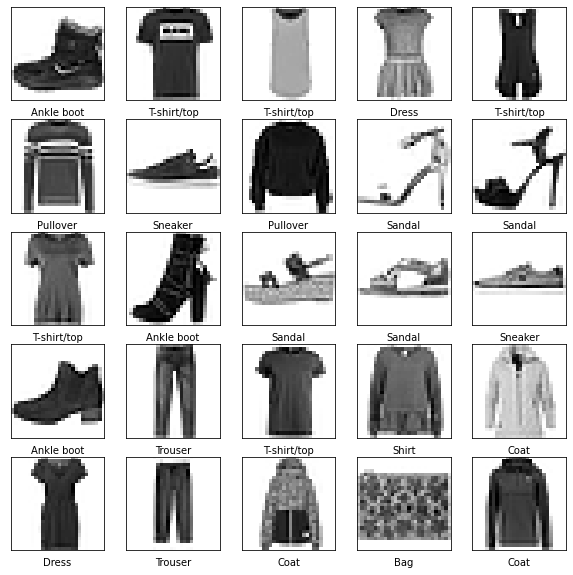

In [13]:
show_imgs()

<h1>Creating Our Model</h1>

Tensorflow lets us create a model super easily. A "Dense" layer is just a layer that is fully connected to the next layer, this is the basic type of layer that we are familiar with. Then all we need to do is specify how many neurons there should be in the given layer and tensorflow figures out the rest.

In [14]:
# The parameters in each of these Conv2D layers are as follows:
# layers.Conv2D(Output_size, Stride, activation, input_shape)
# Stride is just how far the square of relevant pixels moves between layers. 
# Simply put, for this model, the model looks at a 4x4 square of pixels and
# then moves 4 pixels to the left before checking the next 4x4 box of pixels
def create_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    # Max Pooling just grabs the largest number in a specified area and uses that for the whole area
    # below we are looking at a 2x2 square and using the largest number in that square as the value for the whole square

    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Conv2D(56, (3, 3), activation='relu'))

    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Conv2D(56, (3, 3), activation='relu'))
    
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(10))

    return model

In [15]:
model = create_model()
# The optimizer is just an algorithm that helps the AI learn faster
# The loss is Sparse Categorical Crossentropy, the name is scary but it just means that 
# the outputs are converted to percentages and then compared to the expected output
# Metrics = accuracy means that we only care about how close the answer was to the actual answer 
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

2022-06-14 20:28:36.235578: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-06-14 20:28:36.237399: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-14 20:28:36.237646: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 56)        14168     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 56)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 56)          28280     
_________________________________________________________________
flatten (Flatten)            (None, 504)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

<h1>Training our Model</h1>



Tensorflow makes training easy. All we need to do is give it the input data and the expected outputs with the number of epochs to train for and it will handle the rest!

In [16]:
model.fit(train_images, train_labels, epochs=num_epochs)

2022-06-14 20:29:39.112341: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-06-14 20:29:39.116895: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2500000000 Hz


Epoch 1/5


   1/1875 [..............................] - ETA: 1:17:08 - loss: 22.0928 - accuracy: 0.1250

   2/1875 [..............................] - ETA: 1:50 - loss: 19.6038 - accuracy: 0.1484   

   4/1875 [..............................] - ETA: 1:32 - loss: 18.0371 - accuracy: 0.1738

   5/1875 [..............................] - ETA: 1:35 - loss: 17.4579 - accuracy: 0.1803

   7/1875 [..............................] - ETA: 1:29 - loss: 16.2605 - accuracy: 0.1912

   9/1875 [..............................] - ETA: 1:31 - loss: 15.2671 - accuracy: 0.1993

  11/1875 [..............................] - ETA: 1:31 - loss: 14.3945 - accuracy: 0.2050

  12/1875 [..............................] - ETA: 1:33 - loss: 13.9966 - accuracy: 0.2068

  14/1875 [..............................] - ETA: 1:32 - loss: 13.2601 - accuracy: 0.2115

  15/1875 [..............................] - ETA: 1:33 - loss: 12.9225 - accuracy: 0.2136

  17/1875 [..............................] - ETA: 1:31 - loss: 12.3004 - accuracy: 0.2193

  18/1875 [..............................] - ETA: 1:32 - loss: 12.0131 - accuracy: 0.2226

  19/1875 [..............................] - ETA: 1:32 - loss: 11.7412 - accuracy: 0.2258

  20/1875 [..............................] - ETA: 1:33 - loss: 11.4836 - accuracy: 0.2291

  21/1875 [..............................] - ETA: 1:34 - loss: 11.2387 - accuracy: 0.2327

  22/1875 [..............................] - ETA: 1:35 - loss: 11.0070 - accuracy: 0.2361

  23/1875 [..............................] - ETA: 1:35 - loss: 10.7864 - accuracy: 0.2394

  25/1875 [..............................] - ETA: 1:34 - loss: 10.3736 - accuracy: 0.2470

  26/1875 [..............................] - ETA: 1:35 - loss: 10.1815 - accuracy: 0.2507

  28/1875 [..............................] - ETA: 1:34 - loss: 9.8229 - accuracy: 0.2581 

  29/1875 [..............................] - ETA: 1:35 - loss: 9.6551 - accuracy: 0.2619

  30/1875 [..............................] - ETA: 1:35 - loss: 9.4945 - accuracy: 0.2656

  31/1875 [..............................] - ETA: 1:35 - loss: 9.3406 - accuracy: 0.2692

  32/1875 [..............................] - ETA: 1:35 - loss: 9.1926 - accuracy: 0.2729

  34/1875 [..............................] - ETA: 1:34 - loss: 8.9136 - accuracy: 0.2804

  36/1875 [..............................] - ETA: 1:33 - loss: 8.6553 - accuracy: 0.2876

  37/1875 [..............................] - ETA: 1:33 - loss: 8.5329 - accuracy: 0.2912

  39/1875 [..............................] - ETA: 1:32 - loss: 8.3012 - accuracy: 0.2982

  41/1875 [..............................] - ETA: 1:31 - loss: 8.0850 - accuracy: 0.3050

  43/1875 [..............................] - ETA: 1:30 - loss: 7.8828 - accuracy: 0.3118

  45/1875 [..............................] - ETA: 1:29 - loss: 7.6941 - accuracy: 0.3182

  47/1875 [..............................] - ETA: 1:29 - loss: 7.5167 - accuracy: 0.3244

  48/1875 [..............................] - ETA: 1:29 - loss: 7.4318 - accuracy: 0.3275

  49/1875 [..............................] - ETA: 1:29 - loss: 7.3492 - accuracy: 0.3305

  51/1875 [..............................] - ETA: 1:29 - loss: 7.1907 - accuracy: 0.3365

  53/1875 [..............................] - ETA: 1:29 - loss: 7.0408 - accuracy: 0.3424

  55/1875 [..............................] - ETA: 1:28 - loss: 6.8987 - accuracy: 0.3482

  56/1875 [..............................] - ETA: 1:28 - loss: 6.8304 - accuracy: 0.3509

  58/1875 [..............................] - ETA: 1:28 - loss: 6.6988 - accuracy: 0.3564

  60/1875 [..............................] - ETA: 1:27 - loss: 6.5735 - accuracy: 0.3618

  61/1875 [..............................] - ETA: 1:28 - loss: 6.5131 - accuracy: 0.3644

  62/1875 [..............................] - ETA: 1:28 - loss: 6.4542 - accuracy: 0.3670

  63/1875 [>.............................] - ETA: 1:28 - loss: 6.3965 - accuracy: 0.3696

  64/1875 [>.............................] - ETA: 1:28 - loss: 6.3402 - accuracy: 0.3721

  66/1875 [>.............................] - ETA: 1:28 - loss: 6.2315 - accuracy: 0.3770

  67/1875 [>.............................] - ETA: 1:29 - loss: 6.1789 - accuracy: 0.3794

  69/1875 [>.............................] - ETA: 1:28 - loss: 6.0773 - accuracy: 0.3840

  71/1875 [>.............................] - ETA: 1:28 - loss: 5.9799 - accuracy: 0.3886

  72/1875 [>.............................] - ETA: 1:28 - loss: 5.9328 - accuracy: 0.3908

  74/1875 [>.............................] - ETA: 1:28 - loss: 5.8416 - accuracy: 0.3950

  75/1875 [>.............................] - ETA: 1:28 - loss: 5.7975 - accuracy: 0.3971

  77/1875 [>.............................] - ETA: 1:28 - loss: 5.7118 - accuracy: 0.4012

  79/1875 [>.............................] - ETA: 1:28 - loss: 5.6294 - accuracy: 0.4051

  80/1875 [>.............................] - ETA: 1:27 - loss: 5.5893 - accuracy: 0.4071

  81/1875 [>.............................] - ETA: 1:28 - loss: 5.5500 - accuracy: 0.4090

  83/1875 [>.............................] - ETA: 1:27 - loss: 5.4734 - accuracy: 0.4128

  85/1875 [>.............................] - ETA: 1:27 - loss: 5.3996 - accuracy: 0.4165

  87/1875 [>.............................] - ETA: 1:26 - loss: 5.3283 - accuracy: 0.4201

  89/1875 [>.............................] - ETA: 1:26 - loss: 5.2595 - accuracy: 0.4236

  91/1875 [>.............................] - ETA: 1:25 - loss: 5.1931 - accuracy: 0.4270

  93/1875 [>.............................] - ETA: 1:24 - loss: 5.1290 - accuracy: 0.4302

  96/1875 [>.............................] - ETA: 1:22 - loss: 5.0367 - accuracy: 0.4349

  99/1875 [>.............................] - ETA: 1:20 - loss: 4.9487 - accuracy: 0.4395

 102/1875 [>.............................] - ETA: 1:19 - loss: 4.8647 - accuracy: 0.4439

 105/1875 [>.............................] - ETA: 1:17 - loss: 4.7843 - accuracy: 0.4482

 108/1875 [>.............................] - ETA: 1:16 - loss: 4.7075 - accuracy: 0.4523

 111/1875 [>.............................] - ETA: 1:15 - loss: 4.6338 - accuracy: 0.4564

 114/1875 [>.............................] - ETA: 1:14 - loss: 4.5633 - accuracy: 0.4603

 117/1875 [>.............................] - ETA: 1:13 - loss: 4.4955 - accuracy: 0.4641

 121/1875 [>.............................] - ETA: 1:11 - loss: 4.4094 - accuracy: 0.4689

 122/1875 [>.............................] - ETA: 1:12 - loss: 4.3885 - accuracy: 0.4701

 123/1875 [>.............................] - ETA: 1:12 - loss: 4.3679 - accuracy: 0.4712

 124/1875 [>.............................] - ETA: 1:12 - loss: 4.3476 - accuracy: 0.4724

 126/1875 [=>............................] - ETA: 1:12 - loss: 4.3077 - accuracy: 0.4746

 128/1875 [=>............................] - ETA: 1:12 - loss: 4.2688 - accuracy: 0.4769

 130/1875 [=>............................] - ETA: 1:11 - loss: 4.2308 - accuracy: 0.4791

 132/1875 [=>............................] - ETA: 1:11 - loss: 4.1938 - accuracy: 0.4812

 134/1875 [=>............................] - ETA: 1:11 - loss: 4.1576 - accuracy: 0.4833

 136/1875 [=>............................] - ETA: 1:11 - loss: 4.1223 - accuracy: 0.4854

 138/1875 [=>............................] - ETA: 1:10 - loss: 4.0879 - accuracy: 0.4874

 140/1875 [=>............................] - ETA: 1:10 - loss: 4.0543 - accuracy: 0.4893

 142/1875 [=>............................] - ETA: 1:10 - loss: 4.0213 - accuracy: 0.4913

 144/1875 [=>............................] - ETA: 1:09 - loss: 3.9891 - accuracy: 0.4932

 147/1875 [=>............................] - ETA: 1:09 - loss: 3.9421 - accuracy: 0.4960

 148/1875 [=>............................] - ETA: 1:09 - loss: 3.9267 - accuracy: 0.4969

 150/1875 [=>............................] - ETA: 1:08 - loss: 3.8965 - accuracy: 0.4988

 152/1875 [=>............................] - ETA: 1:08 - loss: 3.8669 - accuracy: 0.5006

 154/1875 [=>............................] - ETA: 1:08 - loss: 3.8379 - accuracy: 0.5024

 157/1875 [=>............................] - ETA: 1:07 - loss: 3.7956 - accuracy: 0.5050

 158/1875 [=>............................] - ETA: 1:07 - loss: 3.7818 - accuracy: 0.5059

 160/1875 [=>............................] - ETA: 1:07 - loss: 3.7545 - accuracy: 0.5076

 163/1875 [=>............................] - ETA: 1:06 - loss: 3.7146 - accuracy: 0.5101

 166/1875 [=>............................] - ETA: 1:06 - loss: 3.6759 - accuracy: 0.5125

 169/1875 [=>............................] - ETA: 1:05 - loss: 3.6382 - accuracy: 0.5149

 172/1875 [=>............................] - ETA: 1:04 - loss: 3.6016 - accuracy: 0.5172

 175/1875 [=>............................] - ETA: 1:04 - loss: 3.5661 - accuracy: 0.5195

 177/1875 [=>............................] - ETA: 1:03 - loss: 3.5429 - accuracy: 0.5210

 180/1875 [=>............................] - ETA: 1:03 - loss: 3.5089 - accuracy: 0.5232

 183/1875 [=>............................] - ETA: 1:02 - loss: 3.4758 - accuracy: 0.5253

 185/1875 [=>............................] - ETA: 1:02 - loss: 3.4542 - accuracy: 0.5267

 188/1875 [==>...........................] - ETA: 1:01 - loss: 3.4224 - accuracy: 0.5288

 192/1875 [==>...........................] - ETA: 1:00 - loss: 3.3813 - accuracy: 0.5316

 195/1875 [==>...........................] - ETA: 1:00 - loss: 3.3514 - accuracy: 0.5336

 198/1875 [==>...........................] - ETA: 59s - loss: 3.3222 - accuracy: 0.5355 

 201/1875 [==>...........................] - ETA: 59s - loss: 3.2936 - accuracy: 0.5375

 204/1875 [==>...........................] - ETA: 58s - loss: 3.2658 - accuracy: 0.5394

 207/1875 [==>...........................] - ETA: 58s - loss: 3.2387 - accuracy: 0.5412

 210/1875 [==>...........................] - ETA: 57s - loss: 3.2121 - accuracy: 0.5430

 212/1875 [==>...........................] - ETA: 57s - loss: 3.1948 - accuracy: 0.5442

 215/1875 [==>...........................] - ETA: 57s - loss: 3.1692 - accuracy: 0.5460

 218/1875 [==>...........................] - ETA: 56s - loss: 3.1443 - accuracy: 0.5477

 221/1875 [==>...........................] - ETA: 56s - loss: 3.1199 - accuracy: 0.5494

 224/1875 [==>...........................] - ETA: 55s - loss: 3.0960 - accuracy: 0.5511

 227/1875 [==>...........................] - ETA: 55s - loss: 3.0726 - accuracy: 0.5527

 230/1875 [==>...........................] - ETA: 54s - loss: 3.0497 - accuracy: 0.5543

 233/1875 [==>...........................] - ETA: 54s - loss: 3.0273 - accuracy: 0.5559

 236/1875 [==>...........................] - ETA: 54s - loss: 3.0054 - accuracy: 0.5574

 237/1875 [==>...........................] - ETA: 54s - loss: 2.9982 - accuracy: 0.5579

 239/1875 [==>...........................] - ETA: 54s - loss: 2.9840 - accuracy: 0.5589

 240/1875 [==>...........................] - ETA: 54s - loss: 2.9769 - accuracy: 0.5594

 241/1875 [==>...........................] - ETA: 54s - loss: 2.9699 - accuracy: 0.5599

 244/1875 [==>...........................] - ETA: 54s - loss: 2.9492 - accuracy: 0.5614

 247/1875 [==>...........................] - ETA: 53s - loss: 2.9289 - accuracy: 0.5628

 249/1875 [==>...........................] - ETA: 53s - loss: 2.9156 - accuracy: 0.5638

 252/1875 [===>..........................] - ETA: 53s - loss: 2.8959 - accuracy: 0.5652

 255/1875 [===>..........................] - ETA: 52s - loss: 2.8767 - accuracy: 0.5666

 258/1875 [===>..........................] - ETA: 52s - loss: 2.8577 - accuracy: 0.5679

 261/1875 [===>..........................] - ETA: 52s - loss: 2.8392 - accuracy: 0.5693

 264/1875 [===>..........................] - ETA: 51s - loss: 2.8210 - accuracy: 0.5706

 267/1875 [===>..........................] - ETA: 51s - loss: 2.8031 - accuracy: 0.5719

 270/1875 [===>..........................] - ETA: 51s - loss: 2.7856 - accuracy: 0.5732

 274/1875 [===>..........................] - ETA: 50s - loss: 2.7626 - accuracy: 0.5749

 277/1875 [===>..........................] - ETA: 50s - loss: 2.7458 - accuracy: 0.5762

 280/1875 [===>..........................] - ETA: 49s - loss: 2.7292 - accuracy: 0.5774

 283/1875 [===>..........................] - ETA: 49s - loss: 2.7129 - accuracy: 0.5787

 285/1875 [===>..........................] - ETA: 49s - loss: 2.7022 - accuracy: 0.5795

 287/1875 [===>..........................] - ETA: 49s - loss: 2.6916 - accuracy: 0.5803

 289/1875 [===>..........................] - ETA: 49s - loss: 2.6811 - accuracy: 0.5811

 291/1875 [===>..........................] - ETA: 49s - loss: 2.6708 - accuracy: 0.5819

 293/1875 [===>..........................] - ETA: 49s - loss: 2.6605 - accuracy: 0.5826

 295/1875 [===>..........................] - ETA: 49s - loss: 2.6504 - accuracy: 0.5834

 297/1875 [===>..........................] - ETA: 49s - loss: 2.6404 - accuracy: 0.5842

 299/1875 [===>..........................] - ETA: 49s - loss: 2.6305 - accuracy: 0.5850

 301/1875 [===>..........................] - ETA: 49s - loss: 2.6207 - accuracy: 0.5857

 303/1875 [===>..........................] - ETA: 49s - loss: 2.6110 - accuracy: 0.5865

 305/1875 [===>..........................] - ETA: 49s - loss: 2.6014 - accuracy: 0.5872

 307/1875 [===>..........................] - ETA: 49s - loss: 2.5920 - accuracy: 0.5880

 309/1875 [===>..........................] - ETA: 49s - loss: 2.5826 - accuracy: 0.5887

 311/1875 [===>..........................] - ETA: 49s - loss: 2.5733 - accuracy: 0.5895

 313/1875 [====>.........................] - ETA: 49s - loss: 2.5641 - accuracy: 0.5902

 315/1875 [====>.........................] - ETA: 49s - loss: 2.5550 - accuracy: 0.5909

 316/1875 [====>.........................] - ETA: 49s - loss: 2.5505 - accuracy: 0.5913

 318/1875 [====>.........................] - ETA: 49s - loss: 2.5415 - accuracy: 0.5920

 320/1875 [====>.........................] - ETA: 49s - loss: 2.5327 - accuracy: 0.5927

 322/1875 [====>.........................] - ETA: 49s - loss: 2.5239 - accuracy: 0.5933

 323/1875 [====>.........................] - ETA: 49s - loss: 2.5196 - accuracy: 0.5937

 325/1875 [====>.........................] - ETA: 49s - loss: 2.5109 - accuracy: 0.5944

 327/1875 [====>.........................] - ETA: 48s - loss: 2.5024 - accuracy: 0.5950

 329/1875 [====>.........................] - ETA: 48s - loss: 2.4940 - accuracy: 0.5957

 331/1875 [====>.........................] - ETA: 48s - loss: 2.4856 - accuracy: 0.5964

 332/1875 [====>.........................] - ETA: 48s - loss: 2.4815 - accuracy: 0.5967

 334/1875 [====>.........................] - ETA: 48s - loss: 2.4733 - accuracy: 0.5974

 336/1875 [====>.........................] - ETA: 48s - loss: 2.4651 - accuracy: 0.5980

 338/1875 [====>.........................] - ETA: 48s - loss: 2.4570 - accuracy: 0.5986

 340/1875 [====>.........................] - ETA: 48s - loss: 2.4491 - accuracy: 0.5993

 342/1875 [====>.........................] - ETA: 48s - loss: 2.4411 - accuracy: 0.5999

 344/1875 [====>.........................] - ETA: 48s - loss: 2.4333 - accuracy: 0.6005

 346/1875 [====>.........................] - ETA: 48s - loss: 2.4255 - accuracy: 0.6012

 348/1875 [====>.........................] - ETA: 48s - loss: 2.4178 - accuracy: 0.6018

 349/1875 [====>.........................] - ETA: 48s - loss: 2.4140 - accuracy: 0.6021

 351/1875 [====>.........................] - ETA: 48s - loss: 2.4064 - accuracy: 0.6027

 353/1875 [====>.........................] - ETA: 48s - loss: 2.3989 - accuracy: 0.6033

 355/1875 [====>.........................] - ETA: 48s - loss: 2.3914 - accuracy: 0.6039

 357/1875 [====>.........................] - ETA: 48s - loss: 2.3840 - accuracy: 0.6045

 358/1875 [====>.........................] - ETA: 48s - loss: 2.3804 - accuracy: 0.6048

 360/1875 [====>.........................] - ETA: 48s - loss: 2.3731 - accuracy: 0.6054

 361/1875 [====>.........................] - ETA: 48s - loss: 2.3695 - accuracy: 0.6057

 363/1875 [====>.........................] - ETA: 48s - loss: 2.3623 - accuracy: 0.6063

 366/1875 [====>.........................] - ETA: 48s - loss: 2.3516 - accuracy: 0.6072

 369/1875 [====>.........................] - ETA: 48s - loss: 2.3411 - accuracy: 0.6080

 372/1875 [====>.........................] - ETA: 47s - loss: 2.3307 - accuracy: 0.6089

 375/1875 [=====>........................] - ETA: 47s - loss: 2.3205 - accuracy: 0.6097

 378/1875 [=====>........................] - ETA: 47s - loss: 2.3103 - accuracy: 0.6106

 381/1875 [=====>........................] - ETA: 47s - loss: 2.3003 - accuracy: 0.6114

 383/1875 [=====>........................] - ETA: 47s - loss: 2.2937 - accuracy: 0.6120

 386/1875 [=====>........................] - ETA: 46s - loss: 2.2839 - accuracy: 0.6128

 389/1875 [=====>........................] - ETA: 46s - loss: 2.2743 - accuracy: 0.6136

 392/1875 [=====>........................] - ETA: 46s - loss: 2.2647 - accuracy: 0.6144

 395/1875 [=====>........................] - ETA: 46s - loss: 2.2553 - accuracy: 0.6152

 398/1875 [=====>........................] - ETA: 45s - loss: 2.2460 - accuracy: 0.6159

 401/1875 [=====>........................] - ETA: 45s - loss: 2.2369 - accuracy: 0.6167

 403/1875 [=====>........................] - ETA: 45s - loss: 2.2308 - accuracy: 0.6172

 405/1875 [=====>........................] - ETA: 45s - loss: 2.2248 - accuracy: 0.6177

 407/1875 [=====>........................] - ETA: 45s - loss: 2.2188 - accuracy: 0.6182

 409/1875 [=====>........................] - ETA: 45s - loss: 2.2129 - accuracy: 0.6187

 411/1875 [=====>........................] - ETA: 45s - loss: 2.2071 - accuracy: 0.6192

 413/1875 [=====>........................] - ETA: 45s - loss: 2.2013 - accuracy: 0.6197

 415/1875 [=====>........................] - ETA: 45s - loss: 2.1955 - accuracy: 0.6202

 416/1875 [=====>........................] - ETA: 45s - loss: 2.1926 - accuracy: 0.6205

 417/1875 [=====>........................] - ETA: 45s - loss: 2.1898 - accuracy: 0.6207

 419/1875 [=====>........................] - ETA: 45s - loss: 2.1841 - accuracy: 0.6212

 421/1875 [=====>........................] - ETA: 45s - loss: 2.1784 - accuracy: 0.6217

 423/1875 [=====>........................] - ETA: 45s - loss: 2.1728 - accuracy: 0.6222

 426/1875 [=====>........................] - ETA: 45s - loss: 2.1645 - accuracy: 0.6229

 429/1875 [=====>........................] - ETA: 44s - loss: 2.1563 - accuracy: 0.6236

 432/1875 [=====>........................] - ETA: 44s - loss: 2.1481 - accuracy: 0.6243

 434/1875 [=====>........................] - ETA: 44s - loss: 2.1428 - accuracy: 0.6248

 437/1875 [=====>........................] - ETA: 44s - loss: 2.1348 - accuracy: 0.6255

 440/1875 [======>.......................] - ETA: 44s - loss: 2.1269 - accuracy: 0.6262

 443/1875 [======>.......................] - ETA: 44s - loss: 2.1191 - accuracy: 0.6269

 446/1875 [======>.......................] - ETA: 43s - loss: 2.1113 - accuracy: 0.6275

 449/1875 [======>.......................] - ETA: 43s - loss: 2.1037 - accuracy: 0.6282

 452/1875 [======>.......................] - ETA: 43s - loss: 2.0961 - accuracy: 0.6289

 455/1875 [======>.......................] - ETA: 43s - loss: 2.0887 - accuracy: 0.6295

 458/1875 [======>.......................] - ETA: 43s - loss: 2.0813 - accuracy: 0.6302

 461/1875 [======>.......................] - ETA: 42s - loss: 2.0739 - accuracy: 0.6309

 463/1875 [======>.......................] - ETA: 42s - loss: 2.0691 - accuracy: 0.6313

 465/1875 [======>.......................] - ETA: 42s - loss: 2.0643 - accuracy: 0.6317

 467/1875 [======>.......................] - ETA: 42s - loss: 2.0595 - accuracy: 0.6322

 469/1875 [======>.......................] - ETA: 42s - loss: 2.0548 - accuracy: 0.6326

 470/1875 [======>.......................] - ETA: 42s - loss: 2.0524 - accuracy: 0.6328

 471/1875 [======>.......................] - ETA: 42s - loss: 2.0501 - accuracy: 0.6330

 472/1875 [======>.......................] - ETA: 42s - loss: 2.0478 - accuracy: 0.6332

 473/1875 [======>.......................] - ETA: 42s - loss: 2.0454 - accuracy: 0.6335

 474/1875 [======>.......................] - ETA: 43s - loss: 2.0431 - accuracy: 0.6337

 476/1875 [======>.......................] - ETA: 42s - loss: 2.0385 - accuracy: 0.6341

 478/1875 [======>.......................] - ETA: 42s - loss: 2.0339 - accuracy: 0.6345

 481/1875 [======>.......................] - ETA: 42s - loss: 2.0271 - accuracy: 0.6351

 484/1875 [======>.......................] - ETA: 42s - loss: 2.0203 - accuracy: 0.6357

 487/1875 [======>.......................] - ETA: 42s - loss: 2.0137 - accuracy: 0.6363

 490/1875 [======>.......................] - ETA: 42s - loss: 2.0071 - accuracy: 0.6369

 493/1875 [======>.......................] - ETA: 41s - loss: 2.0005 - accuracy: 0.6375

 495/1875 [======>.......................] - ETA: 41s - loss: 1.9962 - accuracy: 0.6379

 497/1875 [======>.......................] - ETA: 41s - loss: 1.9919 - accuracy: 0.6383

 500/1875 [=======>......................] - ETA: 41s - loss: 1.9855 - accuracy: 0.6389

 503/1875 [=======>......................] - ETA: 41s - loss: 1.9792 - accuracy: 0.6395

 506/1875 [=======>......................] - ETA: 41s - loss: 1.9729 - accuracy: 0.6401

 509/1875 [=======>......................] - ETA: 41s - loss: 1.9667 - accuracy: 0.6407

 511/1875 [=======>......................] - ETA: 41s - loss: 1.9626 - accuracy: 0.6411

 513/1875 [=======>......................] - ETA: 41s - loss: 1.9585 - accuracy: 0.6414

 516/1875 [=======>......................] - ETA: 40s - loss: 1.9524 - accuracy: 0.6420

 519/1875 [=======>......................] - ETA: 40s - loss: 1.9464 - accuracy: 0.6426

 522/1875 [=======>......................] - ETA: 40s - loss: 1.9405 - accuracy: 0.6431

 525/1875 [=======>......................] - ETA: 40s - loss: 1.9346 - accuracy: 0.6437

 527/1875 [=======>......................] - ETA: 40s - loss: 1.9307 - accuracy: 0.6441

 530/1875 [=======>......................] - ETA: 40s - loss: 1.9249 - accuracy: 0.6446

 533/1875 [=======>......................] - ETA: 40s - loss: 1.9191 - accuracy: 0.6451

 536/1875 [=======>......................] - ETA: 39s - loss: 1.9134 - accuracy: 0.6457

 539/1875 [=======>......................] - ETA: 39s - loss: 1.9078 - accuracy: 0.6462

 542/1875 [=======>......................] - ETA: 39s - loss: 1.9022 - accuracy: 0.6467

 545/1875 [=======>......................] - ETA: 39s - loss: 1.8967 - accuracy: 0.6473

 548/1875 [=======>......................] - ETA: 39s - loss: 1.8912 - accuracy: 0.6478

 551/1875 [=======>......................] - ETA: 39s - loss: 1.8857 - accuracy: 0.6483

 554/1875 [=======>......................] - ETA: 38s - loss: 1.8804 - accuracy: 0.6488

 557/1875 [=======>......................] - ETA: 38s - loss: 1.8750 - accuracy: 0.6493

 560/1875 [=======>......................] - ETA: 38s - loss: 1.8697 - accuracy: 0.6498

 563/1875 [========>.....................] - ETA: 38s - loss: 1.8645 - accuracy: 0.6503

 566/1875 [========>.....................] - ETA: 38s - loss: 1.8593 - accuracy: 0.6508

 569/1875 [========>.....................] - ETA: 38s - loss: 1.8541 - accuracy: 0.6513

 572/1875 [========>.....................] - ETA: 37s - loss: 1.8490 - accuracy: 0.6518

 575/1875 [========>.....................] - ETA: 37s - loss: 1.8439 - accuracy: 0.6523

 578/1875 [========>.....................] - ETA: 37s - loss: 1.8389 - accuracy: 0.6528

 581/1875 [========>.....................] - ETA: 37s - loss: 1.8339 - accuracy: 0.6533

 584/1875 [========>.....................] - ETA: 37s - loss: 1.8290 - accuracy: 0.6537

 587/1875 [========>.....................] - ETA: 37s - loss: 1.8241 - accuracy: 0.6542

 590/1875 [========>.....................] - ETA: 37s - loss: 1.8192 - accuracy: 0.6547

 592/1875 [========>.....................] - ETA: 37s - loss: 1.8160 - accuracy: 0.6550

 595/1875 [========>.....................] - ETA: 36s - loss: 1.8112 - accuracy: 0.6555

 598/1875 [========>.....................] - ETA: 36s - loss: 1.8064 - accuracy: 0.6560

 600/1875 [========>.....................] - ETA: 36s - loss: 1.8033 - accuracy: 0.6563

 603/1875 [========>.....................] - ETA: 36s - loss: 1.7986 - accuracy: 0.6567

 606/1875 [========>.....................] - ETA: 36s - loss: 1.7939 - accuracy: 0.6572

 608/1875 [========>.....................] - ETA: 36s - loss: 1.7909 - accuracy: 0.6575

 610/1875 [========>.....................] - ETA: 36s - loss: 1.7878 - accuracy: 0.6578

 612/1875 [========>.....................] - ETA: 36s - loss: 1.7847 - accuracy: 0.6581

 614/1875 [========>.....................] - ETA: 36s - loss: 1.7817 - accuracy: 0.6584

 616/1875 [========>.....................] - ETA: 36s - loss: 1.7787 - accuracy: 0.6587

 618/1875 [========>.....................] - ETA: 36s - loss: 1.7757 - accuracy: 0.6590

 620/1875 [========>.....................] - ETA: 36s - loss: 1.7727 - accuracy: 0.6593

 622/1875 [========>.....................] - ETA: 36s - loss: 1.7697 - accuracy: 0.6596

 623/1875 [========>.....................] - ETA: 36s - loss: 1.7682 - accuracy: 0.6598

 626/1875 [=========>....................] - ETA: 36s - loss: 1.7638 - accuracy: 0.6602

 628/1875 [=========>....................] - ETA: 36s - loss: 1.7609 - accuracy: 0.6605

 630/1875 [=========>....................] - ETA: 35s - loss: 1.7579 - accuracy: 0.6608

 632/1875 [=========>....................] - ETA: 35s - loss: 1.7550 - accuracy: 0.6611

 634/1875 [=========>....................] - ETA: 35s - loss: 1.7522 - accuracy: 0.6614

 636/1875 [=========>....................] - ETA: 35s - loss: 1.7493 - accuracy: 0.6617

 638/1875 [=========>....................] - ETA: 35s - loss: 1.7464 - accuracy: 0.6620

 640/1875 [=========>....................] - ETA: 35s - loss: 1.7436 - accuracy: 0.6622

 642/1875 [=========>....................] - ETA: 35s - loss: 1.7407 - accuracy: 0.6625

 643/1875 [=========>....................] - ETA: 35s - loss: 1.7393 - accuracy: 0.6627

 645/1875 [=========>....................] - ETA: 35s - loss: 1.7365 - accuracy: 0.6630

 647/1875 [=========>....................] - ETA: 35s - loss: 1.7337 - accuracy: 0.6633

 649/1875 [=========>....................] - ETA: 35s - loss: 1.7309 - accuracy: 0.6635

 652/1875 [=========>....................] - ETA: 35s - loss: 1.7268 - accuracy: 0.6640

 654/1875 [=========>....................] - ETA: 35s - loss: 1.7241 - accuracy: 0.6642

 657/1875 [=========>....................] - ETA: 35s - loss: 1.7200 - accuracy: 0.6647

 660/1875 [=========>....................] - ETA: 35s - loss: 1.7159 - accuracy: 0.6651

 662/1875 [=========>....................] - ETA: 35s - loss: 1.7132 - accuracy: 0.6653

 664/1875 [=========>....................] - ETA: 35s - loss: 1.7105 - accuracy: 0.6656

 666/1875 [=========>....................] - ETA: 35s - loss: 1.7079 - accuracy: 0.6659

 668/1875 [=========>....................] - ETA: 34s - loss: 1.7052 - accuracy: 0.6662

 670/1875 [=========>....................] - ETA: 34s - loss: 1.7026 - accuracy: 0.6664

 673/1875 [=========>....................] - ETA: 34s - loss: 1.6987 - accuracy: 0.6668

 675/1875 [=========>....................] - ETA: 34s - loss: 1.6961 - accuracy: 0.6671

 678/1875 [=========>....................] - ETA: 34s - loss: 1.6922 - accuracy: 0.6675

 681/1875 [=========>....................] - ETA: 34s - loss: 1.6883 - accuracy: 0.6679

 684/1875 [=========>....................] - ETA: 34s - loss: 1.6845 - accuracy: 0.6683

 687/1875 [=========>....................] - ETA: 34s - loss: 1.6807 - accuracy: 0.6687

 689/1875 [==========>...................] - ETA: 34s - loss: 1.6782 - accuracy: 0.6689

 692/1875 [==========>...................] - ETA: 34s - loss: 1.6745 - accuracy: 0.6693

 695/1875 [==========>...................] - ETA: 33s - loss: 1.6707 - accuracy: 0.6697

 698/1875 [==========>...................] - ETA: 33s - loss: 1.6671 - accuracy: 0.6701

 700/1875 [==========>...................] - ETA: 33s - loss: 1.6646 - accuracy: 0.6703

 702/1875 [==========>...................] - ETA: 33s - loss: 1.6622 - accuracy: 0.6706

 705/1875 [==========>...................] - ETA: 33s - loss: 1.6585 - accuracy: 0.6710

 707/1875 [==========>...................] - ETA: 33s - loss: 1.6561 - accuracy: 0.6712

 709/1875 [==========>...................] - ETA: 33s - loss: 1.6537 - accuracy: 0.6715

 712/1875 [==========>...................] - ETA: 33s - loss: 1.6502 - accuracy: 0.6718

 714/1875 [==========>...................] - ETA: 33s - loss: 1.6478 - accuracy: 0.6721

 717/1875 [==========>...................] - ETA: 33s - loss: 1.6443 - accuracy: 0.6724

 719/1875 [==========>...................] - ETA: 32s - loss: 1.6419 - accuracy: 0.6727

 721/1875 [==========>...................] - ETA: 32s - loss: 1.6396 - accuracy: 0.6729

 724/1875 [==========>...................] - ETA: 32s - loss: 1.6361 - accuracy: 0.6733

 726/1875 [==========>...................] - ETA: 32s - loss: 1.6338 - accuracy: 0.6735

 728/1875 [==========>...................] - ETA: 32s - loss: 1.6315 - accuracy: 0.6738

 730/1875 [==========>...................] - ETA: 32s - loss: 1.6292 - accuracy: 0.6740

 732/1875 [==========>...................] - ETA: 32s - loss: 1.6269 - accuracy: 0.6743

 734/1875 [==========>...................] - ETA: 32s - loss: 1.6247 - accuracy: 0.6745

 736/1875 [==========>...................] - ETA: 32s - loss: 1.6224 - accuracy: 0.6747

 738/1875 [==========>...................] - ETA: 32s - loss: 1.6202 - accuracy: 0.6750

 739/1875 [==========>...................] - ETA: 32s - loss: 1.6191 - accuracy: 0.6751

 741/1875 [==========>...................] - ETA: 32s - loss: 1.6168 - accuracy: 0.6753

 742/1875 [==========>...................] - ETA: 32s - loss: 1.6157 - accuracy: 0.6754

 743/1875 [==========>...................] - ETA: 32s - loss: 1.6146 - accuracy: 0.6756

 745/1875 [==========>...................] - ETA: 32s - loss: 1.6124 - accuracy: 0.6758

 746/1875 [==========>...................] - ETA: 32s - loss: 1.6113 - accuracy: 0.6759

 748/1875 [==========>...................] - ETA: 32s - loss: 1.6091 - accuracy: 0.6761

 750/1875 [===========>..................] - ETA: 32s - loss: 1.6069 - accuracy: 0.6764

 752/1875 [===========>..................] - ETA: 32s - loss: 1.6047 - accuracy: 0.6766

 754/1875 [===========>..................] - ETA: 32s - loss: 1.6026 - accuracy: 0.6768

 756/1875 [===========>..................] - ETA: 32s - loss: 1.6004 - accuracy: 0.6771

 758/1875 [===========>..................] - ETA: 32s - loss: 1.5982 - accuracy: 0.6773

 760/1875 [===========>..................] - ETA: 32s - loss: 1.5961 - accuracy: 0.6775

 762/1875 [===========>..................] - ETA: 32s - loss: 1.5940 - accuracy: 0.6777

 764/1875 [===========>..................] - ETA: 32s - loss: 1.5918 - accuracy: 0.6780

 766/1875 [===========>..................] - ETA: 32s - loss: 1.5897 - accuracy: 0.6782

 768/1875 [===========>..................] - ETA: 32s - loss: 1.5876 - accuracy: 0.6784

 770/1875 [===========>..................] - ETA: 32s - loss: 1.5855 - accuracy: 0.6786

 772/1875 [===========>..................] - ETA: 32s - loss: 1.5834 - accuracy: 0.6789

 774/1875 [===========>..................] - ETA: 31s - loss: 1.5814 - accuracy: 0.6791

 777/1875 [===========>..................] - ETA: 31s - loss: 1.5783 - accuracy: 0.6794

 780/1875 [===========>..................] - ETA: 31s - loss: 1.5752 - accuracy: 0.6798

 783/1875 [===========>..................] - ETA: 31s - loss: 1.5721 - accuracy: 0.6801

 786/1875 [===========>..................] - ETA: 31s - loss: 1.5691 - accuracy: 0.6804

 788/1875 [===========>..................] - ETA: 31s - loss: 1.5670 - accuracy: 0.6806

 790/1875 [===========>..................] - ETA: 31s - loss: 1.5650 - accuracy: 0.6809

 792/1875 [===========>..................] - ETA: 31s - loss: 1.5630 - accuracy: 0.6811

 796/1875 [===========>..................] - ETA: 31s - loss: 1.5590 - accuracy: 0.6815

 800/1875 [===========>..................] - ETA: 30s - loss: 1.5551 - accuracy: 0.6819

 804/1875 [===========>..................] - ETA: 30s - loss: 1.5511 - accuracy: 0.6824

 808/1875 [===========>..................] - ETA: 30s - loss: 1.5472 - accuracy: 0.6828

 812/1875 [===========>..................] - ETA: 30s - loss: 1.5434 - accuracy: 0.6832

 816/1875 [============>.................] - ETA: 30s - loss: 1.5395 - accuracy: 0.6836

 820/1875 [============>.................] - ETA: 30s - loss: 1.5357 - accuracy: 0.6841

 824/1875 [============>.................] - ETA: 29s - loss: 1.5319 - accuracy: 0.6845

 828/1875 [============>.................] - ETA: 29s - loss: 1.5282 - accuracy: 0.6849

 832/1875 [============>.................] - ETA: 29s - loss: 1.5245 - accuracy: 0.6853

 835/1875 [============>.................] - ETA: 29s - loss: 1.5217 - accuracy: 0.6856

 838/1875 [============>.................] - ETA: 29s - loss: 1.5189 - accuracy: 0.6859

 842/1875 [============>.................] - ETA: 29s - loss: 1.5153 - accuracy: 0.6863

 846/1875 [============>.................] - ETA: 28s - loss: 1.5116 - accuracy: 0.6867

 850/1875 [============>.................] - ETA: 28s - loss: 1.5080 - accuracy: 0.6872

 854/1875 [============>.................] - ETA: 28s - loss: 1.5045 - accuracy: 0.6876

 857/1875 [============>.................] - ETA: 28s - loss: 1.5018 - accuracy: 0.6879

 861/1875 [============>.................] - ETA: 28s - loss: 1.4983 - accuracy: 0.6883

 865/1875 [============>.................] - ETA: 28s - loss: 1.4948 - accuracy: 0.6886

 869/1875 [============>.................] - ETA: 27s - loss: 1.4913 - accuracy: 0.6890

 873/1875 [============>.................] - ETA: 27s - loss: 1.4879 - accuracy: 0.6894

 877/1875 [=============>................] - ETA: 27s - loss: 1.4845 - accuracy: 0.6898

 881/1875 [=============>................] - ETA: 27s - loss: 1.4811 - accuracy: 0.6902

 885/1875 [=============>................] - ETA: 27s - loss: 1.4777 - accuracy: 0.6906

 889/1875 [=============>................] - ETA: 27s - loss: 1.4744 - accuracy: 0.6910

 893/1875 [=============>................] - ETA: 26s - loss: 1.4711 - accuracy: 0.6913

 897/1875 [=============>................] - ETA: 26s - loss: 1.4678 - accuracy: 0.6917

 901/1875 [=============>................] - ETA: 26s - loss: 1.4645 - accuracy: 0.6921

 905/1875 [=============>................] - ETA: 26s - loss: 1.4613 - accuracy: 0.6925

 909/1875 [=============>................] - ETA: 26s - loss: 1.4580 - accuracy: 0.6928

 913/1875 [=============>................] - ETA: 26s - loss: 1.4548 - accuracy: 0.6932

 917/1875 [=============>................] - ETA: 25s - loss: 1.4517 - accuracy: 0.6936

 921/1875 [=============>................] - ETA: 25s - loss: 1.4485 - accuracy: 0.6939

 925/1875 [=============>................] - ETA: 25s - loss: 1.4454 - accuracy: 0.6943

 929/1875 [=============>................] - ETA: 25s - loss: 1.4423 - accuracy: 0.6947

 933/1875 [=============>................] - ETA: 25s - loss: 1.4392 - accuracy: 0.6950

 937/1875 [=============>................] - ETA: 25s - loss: 1.4361 - accuracy: 0.6954

 941/1875 [==============>...............] - ETA: 24s - loss: 1.4331 - accuracy: 0.6957

 945/1875 [==============>...............] - ETA: 24s - loss: 1.4301 - accuracy: 0.6961

 949/1875 [==============>...............] - ETA: 24s - loss: 1.4271 - accuracy: 0.6964

 953/1875 [==============>...............] - ETA: 24s - loss: 1.4241 - accuracy: 0.6968

 957/1875 [==============>...............] - ETA: 24s - loss: 1.4211 - accuracy: 0.6971

 961/1875 [==============>...............] - ETA: 24s - loss: 1.4182 - accuracy: 0.6975

 965/1875 [==============>...............] - ETA: 24s - loss: 1.4153 - accuracy: 0.6978

 968/1875 [==============>...............] - ETA: 23s - loss: 1.4131 - accuracy: 0.6981

 971/1875 [==============>...............] - ETA: 23s - loss: 1.4109 - accuracy: 0.6983

 975/1875 [==============>...............] - ETA: 23s - loss: 1.4080 - accuracy: 0.6987

 979/1875 [==============>...............] - ETA: 23s - loss: 1.4052 - accuracy: 0.6990

 983/1875 [==============>...............] - ETA: 23s - loss: 1.4024 - accuracy: 0.6993

 987/1875 [==============>...............] - ETA: 23s - loss: 1.3996 - accuracy: 0.6997

 991/1875 [==============>...............] - ETA: 23s - loss: 1.3968 - accuracy: 0.7000

 995/1875 [==============>...............] - ETA: 23s - loss: 1.3940 - accuracy: 0.7003

 999/1875 [==============>...............] - ETA: 22s - loss: 1.3913 - accuracy: 0.7007

1003/1875 [===============>..............] - ETA: 22s - loss: 1.3885 - accuracy: 0.7010

1007/1875 [===============>..............] - ETA: 22s - loss: 1.3858 - accuracy: 0.7013

1011/1875 [===============>..............] - ETA: 22s - loss: 1.3831 - accuracy: 0.7016

1015/1875 [===============>..............] - ETA: 22s - loss: 1.3804 - accuracy: 0.7020

1019/1875 [===============>..............] - ETA: 22s - loss: 1.3778 - accuracy: 0.7023

1023/1875 [===============>..............] - ETA: 22s - loss: 1.3751 - accuracy: 0.7026

1027/1875 [===============>..............] - ETA: 21s - loss: 1.3725 - accuracy: 0.7029

1031/1875 [===============>..............] - ETA: 21s - loss: 1.3699 - accuracy: 0.7032

1035/1875 [===============>..............] - ETA: 21s - loss: 1.3673 - accuracy: 0.7035

1039/1875 [===============>..............] - ETA: 21s - loss: 1.3647 - accuracy: 0.7038

1043/1875 [===============>..............] - ETA: 21s - loss: 1.3621 - accuracy: 0.7042

1047/1875 [===============>..............] - ETA: 21s - loss: 1.3596 - accuracy: 0.7045

1051/1875 [===============>..............] - ETA: 21s - loss: 1.3570 - accuracy: 0.7048

1055/1875 [===============>..............] - ETA: 20s - loss: 1.3545 - accuracy: 0.7051

1059/1875 [===============>..............] - ETA: 20s - loss: 1.3520 - accuracy: 0.7054

1063/1875 [================>.............] - ETA: 20s - loss: 1.3495 - accuracy: 0.7057

1067/1875 [================>.............] - ETA: 20s - loss: 1.3471 - accuracy: 0.7060

1071/1875 [================>.............] - ETA: 20s - loss: 1.3446 - accuracy: 0.7063

1075/1875 [================>.............] - ETA: 20s - loss: 1.3422 - accuracy: 0.7066

1079/1875 [================>.............] - ETA: 20s - loss: 1.3398 - accuracy: 0.7069

1083/1875 [================>.............] - ETA: 19s - loss: 1.3373 - accuracy: 0.7072

1087/1875 [================>.............] - ETA: 19s - loss: 1.3349 - accuracy: 0.7074

1091/1875 [================>.............] - ETA: 19s - loss: 1.3326 - accuracy: 0.7077

1095/1875 [================>.............] - ETA: 19s - loss: 1.3302 - accuracy: 0.7080

1099/1875 [================>.............] - ETA: 19s - loss: 1.3278 - accuracy: 0.7083

1102/1875 [================>.............] - ETA: 19s - loss: 1.3261 - accuracy: 0.7085

1105/1875 [================>.............] - ETA: 19s - loss: 1.3243 - accuracy: 0.7087

1109/1875 [================>.............] - ETA: 19s - loss: 1.3220 - accuracy: 0.7090

1113/1875 [================>.............] - ETA: 19s - loss: 1.3197 - accuracy: 0.7093

1117/1875 [================>.............] - ETA: 18s - loss: 1.3174 - accuracy: 0.7096

1121/1875 [================>.............] - ETA: 18s - loss: 1.3151 - accuracy: 0.7099

1123/1875 [================>.............] - ETA: 18s - loss: 1.3140 - accuracy: 0.7100

1126/1875 [=================>............] - ETA: 18s - loss: 1.3123 - accuracy: 0.7102

1130/1875 [=================>............] - ETA: 18s - loss: 1.3101 - accuracy: 0.7105

1134/1875 [=================>............] - ETA: 18s - loss: 1.3078 - accuracy: 0.7108

1138/1875 [=================>............] - ETA: 18s - loss: 1.3056 - accuracy: 0.7111

1142/1875 [=================>............] - ETA: 18s - loss: 1.3034 - accuracy: 0.7113

1146/1875 [=================>............] - ETA: 18s - loss: 1.3012 - accuracy: 0.7116

1150/1875 [=================>............] - ETA: 17s - loss: 1.2990 - accuracy: 0.7119

1153/1875 [=================>............] - ETA: 17s - loss: 1.2973 - accuracy: 0.7121

1157/1875 [=================>............] - ETA: 17s - loss: 1.2952 - accuracy: 0.7124

1161/1875 [=================>............] - ETA: 17s - loss: 1.2930 - accuracy: 0.7126

1165/1875 [=================>............] - ETA: 17s - loss: 1.2909 - accuracy: 0.7129

1169/1875 [=================>............] - ETA: 17s - loss: 1.2887 - accuracy: 0.7132

1172/1875 [=================>............] - ETA: 17s - loss: 1.2871 - accuracy: 0.7134

1176/1875 [=================>............] - ETA: 17s - loss: 1.2850 - accuracy: 0.7136

1180/1875 [=================>............] - ETA: 17s - loss: 1.2829 - accuracy: 0.7139

1184/1875 [=================>............] - ETA: 16s - loss: 1.2808 - accuracy: 0.7142

1188/1875 [==================>...........] - ETA: 16s - loss: 1.2788 - accuracy: 0.7144

1192/1875 [==================>...........] - ETA: 16s - loss: 1.2767 - accuracy: 0.7147

1196/1875 [==================>...........] - ETA: 16s - loss: 1.2746 - accuracy: 0.7149

1200/1875 [==================>...........] - ETA: 16s - loss: 1.2726 - accuracy: 0.7152

1204/1875 [==================>...........] - ETA: 16s - loss: 1.2706 - accuracy: 0.7154

1207/1875 [==================>...........] - ETA: 16s - loss: 1.2691 - accuracy: 0.7156

1209/1875 [==================>...........] - ETA: 16s - loss: 1.2680 - accuracy: 0.7158

1212/1875 [==================>...........] - ETA: 16s - loss: 1.2665 - accuracy: 0.7160

1214/1875 [==================>...........] - ETA: 16s - loss: 1.2655 - accuracy: 0.7161

1218/1875 [==================>...........] - ETA: 15s - loss: 1.2635 - accuracy: 0.7163

1222/1875 [==================>...........] - ETA: 15s - loss: 1.2616 - accuracy: 0.7166

1224/1875 [==================>...........] - ETA: 15s - loss: 1.2606 - accuracy: 0.7167

1228/1875 [==================>...........] - ETA: 15s - loss: 1.2586 - accuracy: 0.7170

1232/1875 [==================>...........] - ETA: 15s - loss: 1.2566 - accuracy: 0.7172

1236/1875 [==================>...........] - ETA: 15s - loss: 1.2547 - accuracy: 0.7175

1240/1875 [==================>...........] - ETA: 15s - loss: 1.2527 - accuracy: 0.7177

1244/1875 [==================>...........] - ETA: 15s - loss: 1.2508 - accuracy: 0.7179

1248/1875 [==================>...........] - ETA: 15s - loss: 1.2489 - accuracy: 0.7182

1252/1875 [===================>..........] - ETA: 14s - loss: 1.2470 - accuracy: 0.7184

1256/1875 [===================>..........] - ETA: 14s - loss: 1.2451 - accuracy: 0.7187

1260/1875 [===================>..........] - ETA: 14s - loss: 1.2432 - accuracy: 0.7189

1264/1875 [===================>..........] - ETA: 14s - loss: 1.2413 - accuracy: 0.7192

1268/1875 [===================>..........] - ETA: 14s - loss: 1.2394 - accuracy: 0.7194

1271/1875 [===================>..........] - ETA: 14s - loss: 1.2380 - accuracy: 0.7196

1275/1875 [===================>..........] - ETA: 14s - loss: 1.2362 - accuracy: 0.7198

1279/1875 [===================>..........] - ETA: 14s - loss: 1.2343 - accuracy: 0.7201

1283/1875 [===================>..........] - ETA: 14s - loss: 1.2325 - accuracy: 0.7203

1287/1875 [===================>..........] - ETA: 14s - loss: 1.2307 - accuracy: 0.7205

1291/1875 [===================>..........] - ETA: 13s - loss: 1.2289 - accuracy: 0.7208

1295/1875 [===================>..........] - ETA: 13s - loss: 1.2270 - accuracy: 0.7210

1298/1875 [===================>..........] - ETA: 13s - loss: 1.2257 - accuracy: 0.7212

1302/1875 [===================>..........] - ETA: 13s - loss: 1.2239 - accuracy: 0.7214

1306/1875 [===================>..........] - ETA: 13s - loss: 1.2221 - accuracy: 0.7216

1310/1875 [===================>..........] - ETA: 13s - loss: 1.2203 - accuracy: 0.7219

1314/1875 [====================>.........] - ETA: 13s - loss: 1.2186 - accuracy: 0.7221

1318/1875 [====================>.........] - ETA: 13s - loss: 1.2168 - accuracy: 0.7223

1322/1875 [====================>.........] - ETA: 13s - loss: 1.2151 - accuracy: 0.7226

1326/1875 [====================>.........] - ETA: 12s - loss: 1.2133 - accuracy: 0.7228

1330/1875 [====================>.........] - ETA: 12s - loss: 1.2116 - accuracy: 0.7230

1334/1875 [====================>.........] - ETA: 12s - loss: 1.2099 - accuracy: 0.7232

1338/1875 [====================>.........] - ETA: 12s - loss: 1.2082 - accuracy: 0.7235

1342/1875 [====================>.........] - ETA: 12s - loss: 1.2064 - accuracy: 0.7237

1346/1875 [====================>.........] - ETA: 12s - loss: 1.2047 - accuracy: 0.7239

1350/1875 [====================>.........] - ETA: 12s - loss: 1.2030 - accuracy: 0.7241

1352/1875 [====================>.........] - ETA: 12s - loss: 1.2022 - accuracy: 0.7242

1355/1875 [====================>.........] - ETA: 12s - loss: 1.2009 - accuracy: 0.7244

1359/1875 [====================>.........] - ETA: 12s - loss: 1.1993 - accuracy: 0.7246

1363/1875 [====================>.........] - ETA: 11s - loss: 1.1976 - accuracy: 0.7248

1367/1875 [====================>.........] - ETA: 11s - loss: 1.1959 - accuracy: 0.7251

1371/1875 [====================>.........] - ETA: 11s - loss: 1.1943 - accuracy: 0.7253

1375/1875 [=====================>........] - ETA: 11s - loss: 1.1926 - accuracy: 0.7255

1379/1875 [=====================>........] - ETA: 11s - loss: 1.1910 - accuracy: 0.7257

1383/1875 [=====================>........] - ETA: 11s - loss: 1.1894 - accuracy: 0.7259

1386/1875 [=====================>........] - ETA: 11s - loss: 1.1881 - accuracy: 0.7261

1389/1875 [=====================>........] - ETA: 11s - loss: 1.1869 - accuracy: 0.7262

1391/1875 [=====================>........] - ETA: 11s - loss: 1.1861 - accuracy: 0.7263

1393/1875 [=====================>........] - ETA: 11s - loss: 1.1853 - accuracy: 0.7265

1395/1875 [=====================>........] - ETA: 11s - loss: 1.1845 - accuracy: 0.7266

1397/1875 [=====================>........] - ETA: 11s - loss: 1.1837 - accuracy: 0.7267

1399/1875 [=====================>........] - ETA: 11s - loss: 1.1829 - accuracy: 0.7268

1401/1875 [=====================>........] - ETA: 11s - loss: 1.1821 - accuracy: 0.7269

1403/1875 [=====================>........] - ETA: 11s - loss: 1.1813 - accuracy: 0.7270

1404/1875 [=====================>........] - ETA: 11s - loss: 1.1809 - accuracy: 0.7270

1406/1875 [=====================>........] - ETA: 10s - loss: 1.1801 - accuracy: 0.7271

1408/1875 [=====================>........] - ETA: 10s - loss: 1.1793 - accuracy: 0.7272

1410/1875 [=====================>........] - ETA: 10s - loss: 1.1786 - accuracy: 0.7274

1412/1875 [=====================>........] - ETA: 10s - loss: 1.1778 - accuracy: 0.7275

1414/1875 [=====================>........] - ETA: 10s - loss: 1.1770 - accuracy: 0.7276

1416/1875 [=====================>........] - ETA: 10s - loss: 1.1762 - accuracy: 0.7277

1418/1875 [=====================>........] - ETA: 10s - loss: 1.1754 - accuracy: 0.7278

1420/1875 [=====================>........] - ETA: 10s - loss: 1.1746 - accuracy: 0.7279

1421/1875 [=====================>........] - ETA: 10s - loss: 1.1742 - accuracy: 0.7279

1423/1875 [=====================>........] - ETA: 10s - loss: 1.1735 - accuracy: 0.7280

1425/1875 [=====================>........] - ETA: 10s - loss: 1.1727 - accuracy: 0.7281

1427/1875 [=====================>........] - ETA: 10s - loss: 1.1719 - accuracy: 0.7282

1428/1875 [=====================>........] - ETA: 10s - loss: 1.1715 - accuracy: 0.7283

1430/1875 [=====================>........] - ETA: 10s - loss: 1.1708 - accuracy: 0.7284

1432/1875 [=====================>........] - ETA: 10s - loss: 1.1700 - accuracy: 0.7285

1434/1875 [=====================>........] - ETA: 10s - loss: 1.1692 - accuracy: 0.7286

1436/1875 [=====================>........] - ETA: 10s - loss: 1.1685 - accuracy: 0.7287

1438/1875 [======================>.......] - ETA: 10s - loss: 1.1677 - accuracy: 0.7288

1440/1875 [======================>.......] - ETA: 10s - loss: 1.1669 - accuracy: 0.7289

1442/1875 [======================>.......] - ETA: 10s - loss: 1.1662 - accuracy: 0.7290

1444/1875 [======================>.......] - ETA: 10s - loss: 1.1654 - accuracy: 0.7291

1446/1875 [======================>.......] - ETA: 10s - loss: 1.1646 - accuracy: 0.7292

1448/1875 [======================>.......] - ETA: 10s - loss: 1.1639 - accuracy: 0.7293

1449/1875 [======================>.......] - ETA: 10s - loss: 1.1635 - accuracy: 0.7294

1451/1875 [======================>.......] - ETA: 10s - loss: 1.1628 - accuracy: 0.7295

1453/1875 [======================>.......] - ETA: 10s - loss: 1.1620 - accuracy: 0.7296

1455/1875 [======================>.......] - ETA: 10s - loss: 1.1613 - accuracy: 0.7297

1457/1875 [======================>.......] - ETA: 9s - loss: 1.1605 - accuracy: 0.7298 

1459/1875 [======================>.......] - ETA: 9s - loss: 1.1598 - accuracy: 0.7299

1461/1875 [======================>.......] - ETA: 9s - loss: 1.1590 - accuracy: 0.7300

1463/1875 [======================>.......] - ETA: 9s - loss: 1.1583 - accuracy: 0.7301

1465/1875 [======================>.......] - ETA: 9s - loss: 1.1575 - accuracy: 0.7302

1467/1875 [======================>.......] - ETA: 9s - loss: 1.1568 - accuracy: 0.7303

1469/1875 [======================>.......] - ETA: 9s - loss: 1.1560 - accuracy: 0.7304

1471/1875 [======================>.......] - ETA: 9s - loss: 1.1553 - accuracy: 0.7305

1473/1875 [======================>.......] - ETA: 9s - loss: 1.1546 - accuracy: 0.7306

1475/1875 [======================>.......] - ETA: 9s - loss: 1.1538 - accuracy: 0.7307

1477/1875 [======================>.......] - ETA: 9s - loss: 1.1531 - accuracy: 0.7308

1479/1875 [======================>.......] - ETA: 9s - loss: 1.1524 - accuracy: 0.7309

1481/1875 [======================>.......] - ETA: 9s - loss: 1.1516 - accuracy: 0.7310

1483/1875 [======================>.......] - ETA: 9s - loss: 1.1509 - accuracy: 0.7310

1485/1875 [======================>.......] - ETA: 9s - loss: 1.1502 - accuracy: 0.7311

1487/1875 [======================>.......] - ETA: 9s - loss: 1.1495 - accuracy: 0.7312

1489/1875 [======================>.......] - ETA: 9s - loss: 1.1487 - accuracy: 0.7313

1491/1875 [======================>.......] - ETA: 9s - loss: 1.1480 - accuracy: 0.7314

1493/1875 [======================>.......] - ETA: 9s - loss: 1.1473 - accuracy: 0.7315

1495/1875 [======================>.......] - ETA: 9s - loss: 1.1466 - accuracy: 0.7316

1497/1875 [======================>.......] - ETA: 9s - loss: 1.1459 - accuracy: 0.7317

1499/1875 [======================>.......] - ETA: 9s - loss: 1.1451 - accuracy: 0.7318

1501/1875 [=======================>......] - ETA: 9s - loss: 1.1444 - accuracy: 0.7319

1503/1875 [=======================>......] - ETA: 9s - loss: 1.1437 - accuracy: 0.7320

1505/1875 [=======================>......] - ETA: 8s - loss: 1.1430 - accuracy: 0.7321

1506/1875 [=======================>......] - ETA: 8s - loss: 1.1426 - accuracy: 0.7322

1508/1875 [=======================>......] - ETA: 8s - loss: 1.1419 - accuracy: 0.7323

1510/1875 [=======================>......] - ETA: 8s - loss: 1.1412 - accuracy: 0.7324

1512/1875 [=======================>......] - ETA: 8s - loss: 1.1405 - accuracy: 0.7325

1514/1875 [=======================>......] - ETA: 8s - loss: 1.1398 - accuracy: 0.7326

1516/1875 [=======================>......] - ETA: 8s - loss: 1.1391 - accuracy: 0.7327

1518/1875 [=======================>......] - ETA: 8s - loss: 1.1384 - accuracy: 0.7327

1520/1875 [=======================>......] - ETA: 8s - loss: 1.1377 - accuracy: 0.7328

1522/1875 [=======================>......] - ETA: 8s - loss: 1.1370 - accuracy: 0.7329

1524/1875 [=======================>......] - ETA: 8s - loss: 1.1363 - accuracy: 0.7330

1526/1875 [=======================>......] - ETA: 8s - loss: 1.1356 - accuracy: 0.7331

1528/1875 [=======================>......] - ETA: 8s - loss: 1.1349 - accuracy: 0.7332

1530/1875 [=======================>......] - ETA: 8s - loss: 1.1342 - accuracy: 0.7333

1532/1875 [=======================>......] - ETA: 8s - loss: 1.1335 - accuracy: 0.7334

1534/1875 [=======================>......] - ETA: 8s - loss: 1.1329 - accuracy: 0.7335

1536/1875 [=======================>......] - ETA: 8s - loss: 1.1322 - accuracy: 0.7336

1538/1875 [=======================>......] - ETA: 8s - loss: 1.1315 - accuracy: 0.7337

1540/1875 [=======================>......] - ETA: 8s - loss: 1.1308 - accuracy: 0.7338

1541/1875 [=======================>......] - ETA: 8s - loss: 1.1305 - accuracy: 0.7338

1542/1875 [=======================>......] - ETA: 8s - loss: 1.1301 - accuracy: 0.7339

1544/1875 [=======================>......] - ETA: 8s - loss: 1.1294 - accuracy: 0.7340

1547/1875 [=======================>......] - ETA: 8s - loss: 1.1284 - accuracy: 0.7341

1549/1875 [=======================>......] - ETA: 8s - loss: 1.1277 - accuracy: 0.7342

1551/1875 [=======================>......] - ETA: 7s - loss: 1.1271 - accuracy: 0.7343

1553/1875 [=======================>......] - ETA: 7s - loss: 1.1264 - accuracy: 0.7344

1555/1875 [=======================>......] - ETA: 7s - loss: 1.1257 - accuracy: 0.7345

1557/1875 [=======================>......] - ETA: 7s - loss: 1.1250 - accuracy: 0.7346

1559/1875 [=======================>......] - ETA: 7s - loss: 1.1244 - accuracy: 0.7347

1561/1875 [=======================>......] - ETA: 7s - loss: 1.1237 - accuracy: 0.7348

1563/1875 [========================>.....] - ETA: 7s - loss: 1.1230 - accuracy: 0.7349

1565/1875 [========================>.....] - ETA: 7s - loss: 1.1224 - accuracy: 0.7350

1567/1875 [========================>.....] - ETA: 7s - loss: 1.1217 - accuracy: 0.7350

1569/1875 [========================>.....] - ETA: 7s - loss: 1.1210 - accuracy: 0.7351

1571/1875 [========================>.....] - ETA: 7s - loss: 1.1204 - accuracy: 0.7352

1573/1875 [========================>.....] - ETA: 7s - loss: 1.1197 - accuracy: 0.7353

1575/1875 [========================>.....] - ETA: 7s - loss: 1.1190 - accuracy: 0.7354

1577/1875 [========================>.....] - ETA: 7s - loss: 1.1184 - accuracy: 0.7355

1579/1875 [========================>.....] - ETA: 7s - loss: 1.1177 - accuracy: 0.7356

1581/1875 [========================>.....] - ETA: 7s - loss: 1.1171 - accuracy: 0.7357

1583/1875 [========================>.....] - ETA: 7s - loss: 1.1164 - accuracy: 0.7358

1585/1875 [========================>.....] - ETA: 7s - loss: 1.1157 - accuracy: 0.7359

1587/1875 [========================>.....] - ETA: 7s - loss: 1.1151 - accuracy: 0.7360

1589/1875 [========================>.....] - ETA: 7s - loss: 1.1144 - accuracy: 0.7360

1591/1875 [========================>.....] - ETA: 7s - loss: 1.1138 - accuracy: 0.7361

1593/1875 [========================>.....] - ETA: 7s - loss: 1.1131 - accuracy: 0.7362

1595/1875 [========================>.....] - ETA: 6s - loss: 1.1125 - accuracy: 0.7363

1597/1875 [========================>.....] - ETA: 6s - loss: 1.1118 - accuracy: 0.7364

1599/1875 [========================>.....] - ETA: 6s - loss: 1.1112 - accuracy: 0.7365

1601/1875 [========================>.....] - ETA: 6s - loss: 1.1106 - accuracy: 0.7366

1603/1875 [========================>.....] - ETA: 6s - loss: 1.1099 - accuracy: 0.7367

1605/1875 [========================>.....] - ETA: 6s - loss: 1.1093 - accuracy: 0.7368

1607/1875 [========================>.....] - ETA: 6s - loss: 1.1086 - accuracy: 0.7369

1609/1875 [========================>.....] - ETA: 6s - loss: 1.1080 - accuracy: 0.7369

1611/1875 [========================>.....] - ETA: 6s - loss: 1.1074 - accuracy: 0.7370

1613/1875 [========================>.....] - ETA: 6s - loss: 1.1067 - accuracy: 0.7371

1615/1875 [========================>.....] - ETA: 6s - loss: 1.1061 - accuracy: 0.7372

1617/1875 [========================>.....] - ETA: 6s - loss: 1.1055 - accuracy: 0.7373

1619/1875 [========================>.....] - ETA: 6s - loss: 1.1048 - accuracy: 0.7374

1621/1875 [========================>.....] - ETA: 6s - loss: 1.1042 - accuracy: 0.7375

1623/1875 [========================>.....] - ETA: 6s - loss: 1.1036 - accuracy: 0.7376

1625/1875 [=========================>....] - ETA: 6s - loss: 1.1029 - accuracy: 0.7376

1627/1875 [=========================>....] - ETA: 6s - loss: 1.1023 - accuracy: 0.7377

1629/1875 [=========================>....] - ETA: 6s - loss: 1.1017 - accuracy: 0.7378

1631/1875 [=========================>....] - ETA: 6s - loss: 1.1011 - accuracy: 0.7379

1633/1875 [=========================>....] - ETA: 6s - loss: 1.1004 - accuracy: 0.7380

1635/1875 [=========================>....] - ETA: 6s - loss: 1.0998 - accuracy: 0.7381

1637/1875 [=========================>....] - ETA: 5s - loss: 1.0992 - accuracy: 0.7382

1639/1875 [=========================>....] - ETA: 5s - loss: 1.0986 - accuracy: 0.7383

1641/1875 [=========================>....] - ETA: 5s - loss: 1.0979 - accuracy: 0.7383

1643/1875 [=========================>....] - ETA: 5s - loss: 1.0973 - accuracy: 0.7384

1645/1875 [=========================>....] - ETA: 5s - loss: 1.0967 - accuracy: 0.7385

1647/1875 [=========================>....] - ETA: 5s - loss: 1.0961 - accuracy: 0.7386

1649/1875 [=========================>....] - ETA: 5s - loss: 1.0955 - accuracy: 0.7387

1651/1875 [=========================>....] - ETA: 5s - loss: 1.0949 - accuracy: 0.7388

1653/1875 [=========================>....] - ETA: 5s - loss: 1.0943 - accuracy: 0.7389

1655/1875 [=========================>....] - ETA: 5s - loss: 1.0936 - accuracy: 0.7389

1657/1875 [=========================>....] - ETA: 5s - loss: 1.0930 - accuracy: 0.7390

1659/1875 [=========================>....] - ETA: 5s - loss: 1.0924 - accuracy: 0.7391

1661/1875 [=========================>....] - ETA: 5s - loss: 1.0918 - accuracy: 0.7392

1663/1875 [=========================>....] - ETA: 5s - loss: 1.0912 - accuracy: 0.7393

1665/1875 [=========================>....] - ETA: 5s - loss: 1.0906 - accuracy: 0.7394

1667/1875 [=========================>....] - ETA: 5s - loss: 1.0900 - accuracy: 0.7395

1669/1875 [=========================>....] - ETA: 5s - loss: 1.0894 - accuracy: 0.7395

1671/1875 [=========================>....] - ETA: 5s - loss: 1.0888 - accuracy: 0.7396

1673/1875 [=========================>....] - ETA: 5s - loss: 1.0882 - accuracy: 0.7397

1675/1875 [=========================>....] - ETA: 5s - loss: 1.0876 - accuracy: 0.7398

1677/1875 [=========================>....] - ETA: 5s - loss: 1.0870 - accuracy: 0.7399

1679/1875 [=========================>....] - ETA: 4s - loss: 1.0864 - accuracy: 0.7400

1681/1875 [=========================>....] - ETA: 4s - loss: 1.0858 - accuracy: 0.7400

1683/1875 [=========================>....] - ETA: 4s - loss: 1.0852 - accuracy: 0.7401

1685/1875 [=========================>....] - ETA: 4s - loss: 1.0846 - accuracy: 0.7402

1687/1875 [=========================>....] - ETA: 4s - loss: 1.0840 - accuracy: 0.7403

1689/1875 [==========================>...] - ETA: 4s - loss: 1.0834 - accuracy: 0.7404

1691/1875 [==========================>...] - ETA: 4s - loss: 1.0828 - accuracy: 0.7405

1693/1875 [==========================>...] - ETA: 4s - loss: 1.0822 - accuracy: 0.7405

1695/1875 [==========================>...] - ETA: 4s - loss: 1.0817 - accuracy: 0.7406

1697/1875 [==========================>...] - ETA: 4s - loss: 1.0811 - accuracy: 0.7407

1699/1875 [==========================>...] - ETA: 4s - loss: 1.0805 - accuracy: 0.7408

1701/1875 [==========================>...] - ETA: 4s - loss: 1.0799 - accuracy: 0.7409

1703/1875 [==========================>...] - ETA: 4s - loss: 1.0793 - accuracy: 0.7410

1705/1875 [==========================>...] - ETA: 4s - loss: 1.0787 - accuracy: 0.7410

1707/1875 [==========================>...] - ETA: 4s - loss: 1.0781 - accuracy: 0.7411

1709/1875 [==========================>...] - ETA: 4s - loss: 1.0776 - accuracy: 0.7412

1711/1875 [==========================>...] - ETA: 4s - loss: 1.0770 - accuracy: 0.7413

1713/1875 [==========================>...] - ETA: 4s - loss: 1.0764 - accuracy: 0.7414

1716/1875 [==========================>...] - ETA: 4s - loss: 1.0755 - accuracy: 0.7415

1720/1875 [==========================>...] - ETA: 3s - loss: 1.0744 - accuracy: 0.7417

1723/1875 [==========================>...] - ETA: 3s - loss: 1.0735 - accuracy: 0.7418

1725/1875 [==========================>...] - ETA: 3s - loss: 1.0730 - accuracy: 0.7419

1729/1875 [==========================>...] - ETA: 3s - loss: 1.0718 - accuracy: 0.7420

1733/1875 [==========================>...] - ETA: 3s - loss: 1.0707 - accuracy: 0.7422

1737/1875 [==========================>...] - ETA: 3s - loss: 1.0696 - accuracy: 0.7423

1741/1875 [==========================>...] - ETA: 3s - loss: 1.0684 - accuracy: 0.7425

1745/1875 [==========================>...] - ETA: 3s - loss: 1.0673 - accuracy: 0.7427

1749/1875 [==========================>...] - ETA: 3s - loss: 1.0662 - accuracy: 0.7428

1753/1875 [===========================>..] - ETA: 3s - loss: 1.0651 - accuracy: 0.7430

1757/1875 [===========================>..] - ETA: 2s - loss: 1.0640 - accuracy: 0.7431

1761/1875 [===========================>..] - ETA: 2s - loss: 1.0629 - accuracy: 0.7433

1765/1875 [===========================>..] - ETA: 2s - loss: 1.0618 - accuracy: 0.7434

1769/1875 [===========================>..] - ETA: 2s - loss: 1.0607 - accuracy: 0.7436

1773/1875 [===========================>..] - ETA: 2s - loss: 1.0596 - accuracy: 0.7437

1777/1875 [===========================>..] - ETA: 2s - loss: 1.0585 - accuracy: 0.7439

1781/1875 [===========================>..] - ETA: 2s - loss: 1.0574 - accuracy: 0.7441

1785/1875 [===========================>..] - ETA: 2s - loss: 1.0563 - accuracy: 0.7442

1788/1875 [===========================>..] - ETA: 2s - loss: 1.0555 - accuracy: 0.7443

1792/1875 [===========================>..] - ETA: 2s - loss: 1.0544 - accuracy: 0.7445

1796/1875 [===========================>..] - ETA: 1s - loss: 1.0534 - accuracy: 0.7446

1800/1875 [===========================>..] - ETA: 1s - loss: 1.0523 - accuracy: 0.7448

1804/1875 [===========================>..] - ETA: 1s - loss: 1.0512 - accuracy: 0.7449

1808/1875 [===========================>..] - ETA: 1s - loss: 1.0502 - accuracy: 0.7451

1812/1875 [===========================>..] - ETA: 1s - loss: 1.0491 - accuracy: 0.7452

1816/1875 [============================>.] - ETA: 1s - loss: 1.0481 - accuracy: 0.7454

1820/1875 [============================>.] - ETA: 1s - loss: 1.0470 - accuracy: 0.7455

1824/1875 [============================>.] - ETA: 1s - loss: 1.0460 - accuracy: 0.7457

1828/1875 [============================>.] - ETA: 1s - loss: 1.0449 - accuracy: 0.7458

1832/1875 [============================>.] - ETA: 1s - loss: 1.0439 - accuracy: 0.7460

1836/1875 [============================>.] - ETA: 0s - loss: 1.0429 - accuracy: 0.7461

1840/1875 [============================>.] - ETA: 0s - loss: 1.0418 - accuracy: 0.7463

1844/1875 [============================>.] - ETA: 0s - loss: 1.0408 - accuracy: 0.7464

1848/1875 [============================>.] - ETA: 0s - loss: 1.0398 - accuracy: 0.7466

1852/1875 [============================>.] - ETA: 0s - loss: 1.0388 - accuracy: 0.7467

1854/1875 [============================>.] - ETA: 0s - loss: 1.0383 - accuracy: 0.7468

1857/1875 [============================>.] - ETA: 0s - loss: 1.0375 - accuracy: 0.7469

1861/1875 [============================>.] - ETA: 0s - loss: 1.0365 - accuracy: 0.7470

1864/1875 [============================>.] - ETA: 0s - loss: 1.0357 - accuracy: 0.7472

1867/1875 [============================>.] - ETA: 0s - loss: 1.0350 - accuracy: 0.7473

1870/1875 [============================>.] - ETA: 0s - loss: 1.0342 - accuracy: 0.7474

1872/1875 [============================>.] - ETA: 0s - loss: 1.0337 - accuracy: 0.7474

1874/1875 [============================>.] - ETA: 0s - loss: 1.0332 - accuracy: 0.7475

1875/1875 [==============================] - 49s 25ms/step - loss: 1.0327 - accuracy: 0.7476


Epoch 2/5
   1/1875 [..............................] - ETA: 28s - loss: 0.5477 - accuracy: 0.7188

   4/1875 [..............................] - ETA: 32s - loss: 0.4357 - accuracy: 0.8014

   8/1875 [..............................] - ETA: 30s - loss: 0.3917 - accuracy: 0.8338

  12/1875 [..............................] - ETA: 29s - loss: 0.3772 - accuracy: 0.8465

  16/1875 [..............................] - ETA: 29s - loss: 0.3773 - accuracy: 0.8487

  20/1875 [..............................] - ETA: 29s - loss: 0.3806 - accuracy: 0.8493

  24/1875 [..............................] - ETA: 29s - loss: 0.3840 - accuracy: 0.8505

  28/1875 [..............................] - ETA: 28s - loss: 0.3870 - accuracy: 0.8509

  32/1875 [..............................] - ETA: 28s - loss: 0.3888 - accuracy: 0.8512

  36/1875 [..............................] - ETA: 28s - loss: 0.3900 - accuracy: 0.8518

  40/1875 [..............................] - ETA: 28s - loss: 0.3904 - accuracy: 0.8525

  44/1875 [..............................] - ETA: 28s - loss: 0.3906 - accuracy: 0.8529

  48/1875 [..............................] - ETA: 27s - loss: 0.3907 - accuracy: 0.8532

  52/1875 [..............................] - ETA: 27s - loss: 0.3907 - accuracy: 0.8535

  56/1875 [..............................] - ETA: 27s - loss: 0.3905 - accuracy: 0.8538

  60/1875 [..............................] - ETA: 27s - loss: 0.3905 - accuracy: 0.8539

  64/1875 [>.............................] - ETA: 27s - loss: 0.3909 - accuracy: 0.8540

  68/1875 [>.............................] - ETA: 27s - loss: 0.3913 - accuracy: 0.8540

  72/1875 [>.............................] - ETA: 27s - loss: 0.3914 - accuracy: 0.8542

  76/1875 [>.............................] - ETA: 27s - loss: 0.3913 - accuracy: 0.8543

  80/1875 [>.............................] - ETA: 27s - loss: 0.3910 - accuracy: 0.8545

  84/1875 [>.............................] - ETA: 27s - loss: 0.3907 - accuracy: 0.8547

  88/1875 [>.............................] - ETA: 26s - loss: 0.3906 - accuracy: 0.8548

  92/1875 [>.............................] - ETA: 26s - loss: 0.3904 - accuracy: 0.8549

  96/1875 [>.............................] - ETA: 26s - loss: 0.3903 - accuracy: 0.8551

  99/1875 [>.............................] - ETA: 27s - loss: 0.3901 - accuracy: 0.8552

 101/1875 [>.............................] - ETA: 27s - loss: 0.3901 - accuracy: 0.8553

 103/1875 [>.............................] - ETA: 28s - loss: 0.3900 - accuracy: 0.8554

 105/1875 [>.............................] - ETA: 29s - loss: 0.3900 - accuracy: 0.8554

 107/1875 [>.............................] - ETA: 29s - loss: 0.3900 - accuracy: 0.8555

 109/1875 [>.............................] - ETA: 30s - loss: 0.3899 - accuracy: 0.8555

 111/1875 [>.............................] - ETA: 30s - loss: 0.3898 - accuracy: 0.8556

 113/1875 [>.............................] - ETA: 31s - loss: 0.3897 - accuracy: 0.8557

 114/1875 [>.............................] - ETA: 32s - loss: 0.3896 - accuracy: 0.8557

 115/1875 [>.............................] - ETA: 32s - loss: 0.3896 - accuracy: 0.8557

 117/1875 [>.............................] - ETA: 33s - loss: 0.3895 - accuracy: 0.8558

 119/1875 [>.............................] - ETA: 33s - loss: 0.3894 - accuracy: 0.8559

 121/1875 [>.............................] - ETA: 34s - loss: 0.3893 - accuracy: 0.8559

 123/1875 [>.............................] - ETA: 34s - loss: 0.3893 - accuracy: 0.8560

 125/1875 [=>............................] - ETA: 35s - loss: 0.3892 - accuracy: 0.8560

 127/1875 [=>............................] - ETA: 35s - loss: 0.3891 - accuracy: 0.8561

 129/1875 [=>............................] - ETA: 35s - loss: 0.3891 - accuracy: 0.8561

 131/1875 [=>............................] - ETA: 36s - loss: 0.3890 - accuracy: 0.8561

 133/1875 [=>............................] - ETA: 36s - loss: 0.3890 - accuracy: 0.8562

 135/1875 [=>............................] - ETA: 36s - loss: 0.3889 - accuracy: 0.8562

 137/1875 [=>............................] - ETA: 37s - loss: 0.3889 - accuracy: 0.8562

 139/1875 [=>............................] - ETA: 37s - loss: 0.3888 - accuracy: 0.8563

 141/1875 [=>............................] - ETA: 37s - loss: 0.3888 - accuracy: 0.8563

 143/1875 [=>............................] - ETA: 37s - loss: 0.3887 - accuracy: 0.8564

 145/1875 [=>............................] - ETA: 38s - loss: 0.3886 - accuracy: 0.8564

 147/1875 [=>............................] - ETA: 38s - loss: 0.3885 - accuracy: 0.8565

 149/1875 [=>............................] - ETA: 38s - loss: 0.3884 - accuracy: 0.8565

 151/1875 [=>............................] - ETA: 39s - loss: 0.3883 - accuracy: 0.8566

 153/1875 [=>............................] - ETA: 39s - loss: 0.3883 - accuracy: 0.8566

 155/1875 [=>............................] - ETA: 39s - loss: 0.3882 - accuracy: 0.8567

 157/1875 [=>............................] - ETA: 39s - loss: 0.3882 - accuracy: 0.8567

 159/1875 [=>............................] - ETA: 40s - loss: 0.3881 - accuracy: 0.8567

 161/1875 [=>............................] - ETA: 40s - loss: 0.3881 - accuracy: 0.8567

 163/1875 [=>............................] - ETA: 40s - loss: 0.3881 - accuracy: 0.8567

 165/1875 [=>............................] - ETA: 41s - loss: 0.3881 - accuracy: 0.8567

 167/1875 [=>............................] - ETA: 41s - loss: 0.3881 - accuracy: 0.8566

 169/1875 [=>............................] - ETA: 41s - loss: 0.3881 - accuracy: 0.8566

 171/1875 [=>............................] - ETA: 42s - loss: 0.3881 - accuracy: 0.8566

 173/1875 [=>............................] - ETA: 42s - loss: 0.3881 - accuracy: 0.8566

 175/1875 [=>............................] - ETA: 42s - loss: 0.3881 - accuracy: 0.8566

 177/1875 [=>............................] - ETA: 42s - loss: 0.3882 - accuracy: 0.8566

 179/1875 [=>............................] - ETA: 42s - loss: 0.3882 - accuracy: 0.8566

 181/1875 [=>............................] - ETA: 42s - loss: 0.3882 - accuracy: 0.8565

 183/1875 [=>............................] - ETA: 42s - loss: 0.3882 - accuracy: 0.8565

 185/1875 [=>............................] - ETA: 42s - loss: 0.3882 - accuracy: 0.8565

 187/1875 [=>............................] - ETA: 42s - loss: 0.3882 - accuracy: 0.8565

 189/1875 [==>...........................] - ETA: 43s - loss: 0.3882 - accuracy: 0.8565

 191/1875 [==>...........................] - ETA: 43s - loss: 0.3882 - accuracy: 0.8565

 193/1875 [==>...........................] - ETA: 43s - loss: 0.3882 - accuracy: 0.8565

 195/1875 [==>...........................] - ETA: 43s - loss: 0.3882 - accuracy: 0.8565

 197/1875 [==>...........................] - ETA: 44s - loss: 0.3882 - accuracy: 0.8565

 199/1875 [==>...........................] - ETA: 44s - loss: 0.3882 - accuracy: 0.8565

 201/1875 [==>...........................] - ETA: 44s - loss: 0.3882 - accuracy: 0.8565

 203/1875 [==>...........................] - ETA: 44s - loss: 0.3882 - accuracy: 0.8565

 205/1875 [==>...........................] - ETA: 44s - loss: 0.3882 - accuracy: 0.8565

 207/1875 [==>...........................] - ETA: 44s - loss: 0.3882 - accuracy: 0.8565

 209/1875 [==>...........................] - ETA: 44s - loss: 0.3882 - accuracy: 0.8565

 211/1875 [==>...........................] - ETA: 45s - loss: 0.3882 - accuracy: 0.8565

 213/1875 [==>...........................] - ETA: 45s - loss: 0.3882 - accuracy: 0.8565

 215/1875 [==>...........................] - ETA: 45s - loss: 0.3882 - accuracy: 0.8565

 217/1875 [==>...........................] - ETA: 45s - loss: 0.3882 - accuracy: 0.8565

 219/1875 [==>...........................] - ETA: 45s - loss: 0.3882 - accuracy: 0.8565

 221/1875 [==>...........................] - ETA: 45s - loss: 0.3881 - accuracy: 0.8565

 223/1875 [==>...........................] - ETA: 45s - loss: 0.3882 - accuracy: 0.8565

 225/1875 [==>...........................] - ETA: 45s - loss: 0.3882 - accuracy: 0.8565

 229/1875 [==>...........................] - ETA: 45s - loss: 0.3882 - accuracy: 0.8565

 233/1875 [==>...........................] - ETA: 44s - loss: 0.3881 - accuracy: 0.8565

 237/1875 [==>...........................] - ETA: 44s - loss: 0.3881 - accuracy: 0.8565

 241/1875 [==>...........................] - ETA: 43s - loss: 0.3880 - accuracy: 0.8565

 245/1875 [==>...........................] - ETA: 43s - loss: 0.3880 - accuracy: 0.8565

 248/1875 [==>...........................] - ETA: 43s - loss: 0.3880 - accuracy: 0.8565

 252/1875 [===>..........................] - ETA: 42s - loss: 0.3879 - accuracy: 0.8565

 256/1875 [===>..........................] - ETA: 42s - loss: 0.3878 - accuracy: 0.8566

 260/1875 [===>..........................] - ETA: 41s - loss: 0.3877 - accuracy: 0.8566

 264/1875 [===>..........................] - ETA: 41s - loss: 0.3877 - accuracy: 0.8566

 268/1875 [===>..........................] - ETA: 41s - loss: 0.3876 - accuracy: 0.8566

 272/1875 [===>..........................] - ETA: 40s - loss: 0.3875 - accuracy: 0.8567

 276/1875 [===>..........................] - ETA: 40s - loss: 0.3874 - accuracy: 0.8567

 280/1875 [===>..........................] - ETA: 40s - loss: 0.3873 - accuracy: 0.8567

 284/1875 [===>..........................] - ETA: 39s - loss: 0.3872 - accuracy: 0.8568

 288/1875 [===>..........................] - ETA: 39s - loss: 0.3870 - accuracy: 0.8568

 291/1875 [===>..........................] - ETA: 39s - loss: 0.3869 - accuracy: 0.8569

 294/1875 [===>..........................] - ETA: 39s - loss: 0.3867 - accuracy: 0.8569

 296/1875 [===>..........................] - ETA: 39s - loss: 0.3867 - accuracy: 0.8570

 297/1875 [===>..........................] - ETA: 39s - loss: 0.3866 - accuracy: 0.8570

 298/1875 [===>..........................] - ETA: 39s - loss: 0.3866 - accuracy: 0.8570

 300/1875 [===>..........................] - ETA: 39s - loss: 0.3865 - accuracy: 0.8570

 301/1875 [===>..........................] - ETA: 39s - loss: 0.3864 - accuracy: 0.8570

 302/1875 [===>..........................] - ETA: 39s - loss: 0.3864 - accuracy: 0.8571

 304/1875 [===>..........................] - ETA: 39s - loss: 0.3863 - accuracy: 0.8571

 306/1875 [===>..........................] - ETA: 39s - loss: 0.3862 - accuracy: 0.8571

 308/1875 [===>..........................] - ETA: 40s - loss: 0.3861 - accuracy: 0.8572

 310/1875 [===>..........................] - ETA: 40s - loss: 0.3860 - accuracy: 0.8572

 312/1875 [===>..........................] - ETA: 40s - loss: 0.3860 - accuracy: 0.8572

 314/1875 [====>.........................] - ETA: 40s - loss: 0.3859 - accuracy: 0.8573

 316/1875 [====>.........................] - ETA: 40s - loss: 0.3858 - accuracy: 0.8573

 318/1875 [====>.........................] - ETA: 40s - loss: 0.3857 - accuracy: 0.8573

 320/1875 [====>.........................] - ETA: 40s - loss: 0.3856 - accuracy: 0.8574

 322/1875 [====>.........................] - ETA: 40s - loss: 0.3855 - accuracy: 0.8574

 324/1875 [====>.........................] - ETA: 40s - loss: 0.3855 - accuracy: 0.8575

 326/1875 [====>.........................] - ETA: 40s - loss: 0.3854 - accuracy: 0.8575

 328/1875 [====>.........................] - ETA: 40s - loss: 0.3853 - accuracy: 0.8575

 330/1875 [====>.........................] - ETA: 40s - loss: 0.3852 - accuracy: 0.8576

 332/1875 [====>.........................] - ETA: 40s - loss: 0.3851 - accuracy: 0.8576

 333/1875 [====>.........................] - ETA: 40s - loss: 0.3851 - accuracy: 0.8576

 335/1875 [====>.........................] - ETA: 40s - loss: 0.3850 - accuracy: 0.8577

 337/1875 [====>.........................] - ETA: 41s - loss: 0.3849 - accuracy: 0.8577

 338/1875 [====>.........................] - ETA: 41s - loss: 0.3848 - accuracy: 0.8577

 340/1875 [====>.........................] - ETA: 41s - loss: 0.3847 - accuracy: 0.8578

 342/1875 [====>.........................] - ETA: 41s - loss: 0.3847 - accuracy: 0.8578

 345/1875 [====>.........................] - ETA: 41s - loss: 0.3845 - accuracy: 0.8578

 347/1875 [====>.........................] - ETA: 41s - loss: 0.3845 - accuracy: 0.8579

 350/1875 [====>.........................] - ETA: 41s - loss: 0.3843 - accuracy: 0.8579

 354/1875 [====>.........................] - ETA: 40s - loss: 0.3842 - accuracy: 0.8580

 358/1875 [====>.........................] - ETA: 40s - loss: 0.3840 - accuracy: 0.8580

 362/1875 [====>.........................] - ETA: 40s - loss: 0.3839 - accuracy: 0.8581

 365/1875 [====>.........................] - ETA: 40s - loss: 0.3838 - accuracy: 0.8581

 368/1875 [====>.........................] - ETA: 39s - loss: 0.3837 - accuracy: 0.8582

 371/1875 [====>.........................] - ETA: 39s - loss: 0.3836 - accuracy: 0.8582

 375/1875 [=====>........................] - ETA: 39s - loss: 0.3834 - accuracy: 0.8583

 379/1875 [=====>........................] - ETA: 39s - loss: 0.3833 - accuracy: 0.8584

 383/1875 [=====>........................] - ETA: 38s - loss: 0.3832 - accuracy: 0.8584

 387/1875 [=====>........................] - ETA: 38s - loss: 0.3830 - accuracy: 0.8585

 391/1875 [=====>........................] - ETA: 38s - loss: 0.3829 - accuracy: 0.8586

 395/1875 [=====>........................] - ETA: 38s - loss: 0.3827 - accuracy: 0.8586

 399/1875 [=====>........................] - ETA: 37s - loss: 0.3826 - accuracy: 0.8587

 403/1875 [=====>........................] - ETA: 37s - loss: 0.3824 - accuracy: 0.8588

 407/1875 [=====>........................] - ETA: 37s - loss: 0.3823 - accuracy: 0.8588

 411/1875 [=====>........................] - ETA: 37s - loss: 0.3821 - accuracy: 0.8589

 415/1875 [=====>........................] - ETA: 36s - loss: 0.3820 - accuracy: 0.8590

 419/1875 [=====>........................] - ETA: 36s - loss: 0.3818 - accuracy: 0.8590

 423/1875 [=====>........................] - ETA: 36s - loss: 0.3817 - accuracy: 0.8591

 427/1875 [=====>........................] - ETA: 36s - loss: 0.3815 - accuracy: 0.8591

 431/1875 [=====>........................] - ETA: 35s - loss: 0.3814 - accuracy: 0.8592

 435/1875 [=====>........................] - ETA: 35s - loss: 0.3812 - accuracy: 0.8593

 439/1875 [======>.......................] - ETA: 35s - loss: 0.3811 - accuracy: 0.8593

 443/1875 [======>.......................] - ETA: 35s - loss: 0.3809 - accuracy: 0.8594

 447/1875 [======>.......................] - ETA: 34s - loss: 0.3807 - accuracy: 0.8595

 450/1875 [======>.......................] - ETA: 34s - loss: 0.3806 - accuracy: 0.8595

 454/1875 [======>.......................] - ETA: 34s - loss: 0.3805 - accuracy: 0.8596

 458/1875 [======>.......................] - ETA: 34s - loss: 0.3803 - accuracy: 0.8596

 462/1875 [======>.......................] - ETA: 34s - loss: 0.3802 - accuracy: 0.8597

 465/1875 [======>.......................] - ETA: 34s - loss: 0.3801 - accuracy: 0.8597

 467/1875 [======>.......................] - ETA: 34s - loss: 0.3800 - accuracy: 0.8597

 471/1875 [======>.......................] - ETA: 33s - loss: 0.3799 - accuracy: 0.8598

 475/1875 [======>.......................] - ETA: 33s - loss: 0.3797 - accuracy: 0.8598

 478/1875 [======>.......................] - ETA: 33s - loss: 0.3796 - accuracy: 0.8599

 482/1875 [======>.......................] - ETA: 33s - loss: 0.3795 - accuracy: 0.8599

 486/1875 [======>.......................] - ETA: 33s - loss: 0.3794 - accuracy: 0.8600

 489/1875 [======>.......................] - ETA: 33s - loss: 0.3793 - accuracy: 0.8600

 492/1875 [======>.......................] - ETA: 32s - loss: 0.3792 - accuracy: 0.8600

 496/1875 [======>.......................] - ETA: 32s - loss: 0.3790 - accuracy: 0.8601

 500/1875 [=======>......................] - ETA: 32s - loss: 0.3789 - accuracy: 0.8601

 504/1875 [=======>......................] - ETA: 32s - loss: 0.3788 - accuracy: 0.8602

 508/1875 [=======>......................] - ETA: 32s - loss: 0.3787 - accuracy: 0.8602

 512/1875 [=======>......................] - ETA: 32s - loss: 0.3785 - accuracy: 0.8603

 516/1875 [=======>......................] - ETA: 31s - loss: 0.3784 - accuracy: 0.8603

 520/1875 [=======>......................] - ETA: 31s - loss: 0.3783 - accuracy: 0.8604

 524/1875 [=======>......................] - ETA: 31s - loss: 0.3782 - accuracy: 0.8604

 528/1875 [=======>......................] - ETA: 31s - loss: 0.3781 - accuracy: 0.8604

 532/1875 [=======>......................] - ETA: 31s - loss: 0.3780 - accuracy: 0.8605

 536/1875 [=======>......................] - ETA: 30s - loss: 0.3779 - accuracy: 0.8605

 540/1875 [=======>......................] - ETA: 30s - loss: 0.3778 - accuracy: 0.8605

 544/1875 [=======>......................] - ETA: 30s - loss: 0.3777 - accuracy: 0.8606

 548/1875 [=======>......................] - ETA: 30s - loss: 0.3776 - accuracy: 0.8606

 552/1875 [=======>......................] - ETA: 30s - loss: 0.3774 - accuracy: 0.8607

 556/1875 [=======>......................] - ETA: 30s - loss: 0.3773 - accuracy: 0.8607

 560/1875 [=======>......................] - ETA: 29s - loss: 0.3772 - accuracy: 0.8607

 564/1875 [========>.....................] - ETA: 29s - loss: 0.3771 - accuracy: 0.8608

 568/1875 [========>.....................] - ETA: 29s - loss: 0.3770 - accuracy: 0.8608

 572/1875 [========>.....................] - ETA: 29s - loss: 0.3769 - accuracy: 0.8609

 576/1875 [========>.....................] - ETA: 29s - loss: 0.3767 - accuracy: 0.8609

 580/1875 [========>.....................] - ETA: 29s - loss: 0.3766 - accuracy: 0.8610

 583/1875 [========>.....................] - ETA: 29s - loss: 0.3766 - accuracy: 0.8610

 587/1875 [========>.....................] - ETA: 28s - loss: 0.3764 - accuracy: 0.8610

 591/1875 [========>.....................] - ETA: 28s - loss: 0.3763 - accuracy: 0.8611

 595/1875 [========>.....................] - ETA: 28s - loss: 0.3762 - accuracy: 0.8611

 599/1875 [========>.....................] - ETA: 28s - loss: 0.3761 - accuracy: 0.8612

 603/1875 [========>.....................] - ETA: 28s - loss: 0.3760 - accuracy: 0.8612

 606/1875 [========>.....................] - ETA: 28s - loss: 0.3759 - accuracy: 0.8612

 610/1875 [========>.....................] - ETA: 28s - loss: 0.3758 - accuracy: 0.8613

 614/1875 [========>.....................] - ETA: 27s - loss: 0.3756 - accuracy: 0.8613

 618/1875 [========>.....................] - ETA: 27s - loss: 0.3755 - accuracy: 0.8614

 621/1875 [========>.....................] - ETA: 27s - loss: 0.3755 - accuracy: 0.8614

 625/1875 [=========>....................] - ETA: 27s - loss: 0.3753 - accuracy: 0.8614

 629/1875 [=========>....................] - ETA: 27s - loss: 0.3752 - accuracy: 0.8615

 633/1875 [=========>....................] - ETA: 27s - loss: 0.3751 - accuracy: 0.8615

 637/1875 [=========>....................] - ETA: 27s - loss: 0.3750 - accuracy: 0.8616

 641/1875 [=========>....................] - ETA: 27s - loss: 0.3749 - accuracy: 0.8616

 645/1875 [=========>....................] - ETA: 26s - loss: 0.3748 - accuracy: 0.8617

 649/1875 [=========>....................] - ETA: 26s - loss: 0.3747 - accuracy: 0.8617

 653/1875 [=========>....................] - ETA: 26s - loss: 0.3746 - accuracy: 0.8617

 657/1875 [=========>....................] - ETA: 26s - loss: 0.3745 - accuracy: 0.8618

 661/1875 [=========>....................] - ETA: 26s - loss: 0.3744 - accuracy: 0.8618

 665/1875 [=========>....................] - ETA: 26s - loss: 0.3743 - accuracy: 0.8619

 669/1875 [=========>....................] - ETA: 26s - loss: 0.3742 - accuracy: 0.8619

 673/1875 [=========>....................] - ETA: 25s - loss: 0.3740 - accuracy: 0.8620

 677/1875 [=========>....................] - ETA: 25s - loss: 0.3739 - accuracy: 0.8620

 681/1875 [=========>....................] - ETA: 25s - loss: 0.3738 - accuracy: 0.8620

 685/1875 [=========>....................] - ETA: 25s - loss: 0.3737 - accuracy: 0.8621

 689/1875 [==========>...................] - ETA: 25s - loss: 0.3736 - accuracy: 0.8621

 692/1875 [==========>...................] - ETA: 25s - loss: 0.3735 - accuracy: 0.8622

 696/1875 [==========>...................] - ETA: 25s - loss: 0.3734 - accuracy: 0.8622

 700/1875 [==========>...................] - ETA: 25s - loss: 0.3733 - accuracy: 0.8623

 704/1875 [==========>...................] - ETA: 24s - loss: 0.3732 - accuracy: 0.8623

 708/1875 [==========>...................] - ETA: 24s - loss: 0.3731 - accuracy: 0.8623

 712/1875 [==========>...................] - ETA: 24s - loss: 0.3729 - accuracy: 0.8624

 716/1875 [==========>...................] - ETA: 24s - loss: 0.3728 - accuracy: 0.8624

 720/1875 [==========>...................] - ETA: 24s - loss: 0.3727 - accuracy: 0.8625

 724/1875 [==========>...................] - ETA: 24s - loss: 0.3726 - accuracy: 0.8625

 728/1875 [==========>...................] - ETA: 24s - loss: 0.3725 - accuracy: 0.8625

 732/1875 [==========>...................] - ETA: 24s - loss: 0.3724 - accuracy: 0.8626

 736/1875 [==========>...................] - ETA: 23s - loss: 0.3723 - accuracy: 0.8626

 739/1875 [==========>...................] - ETA: 23s - loss: 0.3722 - accuracy: 0.8626

 743/1875 [==========>...................] - ETA: 23s - loss: 0.3721 - accuracy: 0.8627

 745/1875 [==========>...................] - ETA: 23s - loss: 0.3721 - accuracy: 0.8627

 746/1875 [==========>...................] - ETA: 23s - loss: 0.3721 - accuracy: 0.8627

 748/1875 [==========>...................] - ETA: 23s - loss: 0.3720 - accuracy: 0.8627

 750/1875 [===========>..................] - ETA: 23s - loss: 0.3720 - accuracy: 0.8627

 752/1875 [===========>..................] - ETA: 23s - loss: 0.3719 - accuracy: 0.8628

 754/1875 [===========>..................] - ETA: 23s - loss: 0.3719 - accuracy: 0.8628

 756/1875 [===========>..................] - ETA: 23s - loss: 0.3718 - accuracy: 0.8628

 758/1875 [===========>..................] - ETA: 23s - loss: 0.3718 - accuracy: 0.8628

 759/1875 [===========>..................] - ETA: 23s - loss: 0.3717 - accuracy: 0.8628

 761/1875 [===========>..................] - ETA: 23s - loss: 0.3717 - accuracy: 0.8629

 763/1875 [===========>..................] - ETA: 23s - loss: 0.3716 - accuracy: 0.8629

 765/1875 [===========>..................] - ETA: 23s - loss: 0.3716 - accuracy: 0.8629

 767/1875 [===========>..................] - ETA: 23s - loss: 0.3715 - accuracy: 0.8629

 769/1875 [===========>..................] - ETA: 23s - loss: 0.3715 - accuracy: 0.8629

 771/1875 [===========>..................] - ETA: 23s - loss: 0.3714 - accuracy: 0.8629

 773/1875 [===========>..................] - ETA: 23s - loss: 0.3714 - accuracy: 0.8630

 774/1875 [===========>..................] - ETA: 23s - loss: 0.3713 - accuracy: 0.8630

 776/1875 [===========>..................] - ETA: 23s - loss: 0.3713 - accuracy: 0.8630

 777/1875 [===========>..................] - ETA: 23s - loss: 0.3713 - accuracy: 0.8630

 779/1875 [===========>..................] - ETA: 23s - loss: 0.3712 - accuracy: 0.8630

 781/1875 [===========>..................] - ETA: 23s - loss: 0.3712 - accuracy: 0.8630

 783/1875 [===========>..................] - ETA: 23s - loss: 0.3711 - accuracy: 0.8631

 785/1875 [===========>..................] - ETA: 23s - loss: 0.3711 - accuracy: 0.8631

 786/1875 [===========>..................] - ETA: 23s - loss: 0.3711 - accuracy: 0.8631

 788/1875 [===========>..................] - ETA: 23s - loss: 0.3710 - accuracy: 0.8631

 790/1875 [===========>..................] - ETA: 23s - loss: 0.3710 - accuracy: 0.8631

 792/1875 [===========>..................] - ETA: 23s - loss: 0.3709 - accuracy: 0.8631

 794/1875 [===========>..................] - ETA: 23s - loss: 0.3709 - accuracy: 0.8632

 796/1875 [===========>..................] - ETA: 23s - loss: 0.3708 - accuracy: 0.8632

 798/1875 [===========>..................] - ETA: 23s - loss: 0.3708 - accuracy: 0.8632

 802/1875 [===========>..................] - ETA: 23s - loss: 0.3707 - accuracy: 0.8632

 805/1875 [===========>..................] - ETA: 23s - loss: 0.3706 - accuracy: 0.8632

 807/1875 [===========>..................] - ETA: 23s - loss: 0.3705 - accuracy: 0.8633

 811/1875 [===========>..................] - ETA: 23s - loss: 0.3705 - accuracy: 0.8633

 815/1875 [============>.................] - ETA: 23s - loss: 0.3704 - accuracy: 0.8633

 819/1875 [============>.................] - ETA: 23s - loss: 0.3703 - accuracy: 0.8634

 822/1875 [============>.................] - ETA: 23s - loss: 0.3702 - accuracy: 0.8634

 825/1875 [============>.................] - ETA: 23s - loss: 0.3701 - accuracy: 0.8634

 829/1875 [============>.................] - ETA: 22s - loss: 0.3700 - accuracy: 0.8635

 832/1875 [============>.................] - ETA: 22s - loss: 0.3700 - accuracy: 0.8635

 836/1875 [============>.................] - ETA: 22s - loss: 0.3699 - accuracy: 0.8635

 838/1875 [============>.................] - ETA: 22s - loss: 0.3699 - accuracy: 0.8635

 841/1875 [============>.................] - ETA: 22s - loss: 0.3698 - accuracy: 0.8636

 844/1875 [============>.................] - ETA: 22s - loss: 0.3697 - accuracy: 0.8636

 848/1875 [============>.................] - ETA: 22s - loss: 0.3697 - accuracy: 0.8636

 852/1875 [============>.................] - ETA: 22s - loss: 0.3696 - accuracy: 0.8636

 856/1875 [============>.................] - ETA: 22s - loss: 0.3695 - accuracy: 0.8637

 860/1875 [============>.................] - ETA: 22s - loss: 0.3694 - accuracy: 0.8637

 864/1875 [============>.................] - ETA: 21s - loss: 0.3693 - accuracy: 0.8637

 868/1875 [============>.................] - ETA: 21s - loss: 0.3693 - accuracy: 0.8638

 872/1875 [============>.................] - ETA: 21s - loss: 0.3692 - accuracy: 0.8638

 876/1875 [=============>................] - ETA: 21s - loss: 0.3691 - accuracy: 0.8638

 880/1875 [=============>................] - ETA: 21s - loss: 0.3691 - accuracy: 0.8639

 884/1875 [=============>................] - ETA: 21s - loss: 0.3690 - accuracy: 0.8639

 888/1875 [=============>................] - ETA: 21s - loss: 0.3689 - accuracy: 0.8639

 892/1875 [=============>................] - ETA: 21s - loss: 0.3688 - accuracy: 0.8639

 896/1875 [=============>................] - ETA: 21s - loss: 0.3688 - accuracy: 0.8640

 900/1875 [=============>................] - ETA: 20s - loss: 0.3687 - accuracy: 0.8640

 904/1875 [=============>................] - ETA: 20s - loss: 0.3686 - accuracy: 0.8640

 908/1875 [=============>................] - ETA: 20s - loss: 0.3686 - accuracy: 0.8641

 912/1875 [=============>................] - ETA: 20s - loss: 0.3685 - accuracy: 0.8641

 916/1875 [=============>................] - ETA: 20s - loss: 0.3684 - accuracy: 0.8641

 920/1875 [=============>................] - ETA: 20s - loss: 0.3684 - accuracy: 0.8641

 924/1875 [=============>................] - ETA: 20s - loss: 0.3683 - accuracy: 0.8642

 928/1875 [=============>................] - ETA: 20s - loss: 0.3682 - accuracy: 0.8642

 931/1875 [=============>................] - ETA: 20s - loss: 0.3682 - accuracy: 0.8642

 935/1875 [=============>................] - ETA: 19s - loss: 0.3681 - accuracy: 0.8642

 939/1875 [==============>...............] - ETA: 19s - loss: 0.3680 - accuracy: 0.8643

 943/1875 [==============>...............] - ETA: 19s - loss: 0.3680 - accuracy: 0.8643

 947/1875 [==============>...............] - ETA: 19s - loss: 0.3679 - accuracy: 0.8643

 951/1875 [==============>...............] - ETA: 19s - loss: 0.3678 - accuracy: 0.8644

 955/1875 [==============>...............] - ETA: 19s - loss: 0.3678 - accuracy: 0.8644

 959/1875 [==============>...............] - ETA: 19s - loss: 0.3677 - accuracy: 0.8644

 963/1875 [==============>...............] - ETA: 19s - loss: 0.3676 - accuracy: 0.8645

 967/1875 [==============>...............] - ETA: 19s - loss: 0.3676 - accuracy: 0.8645

 971/1875 [==============>...............] - ETA: 18s - loss: 0.3675 - accuracy: 0.8645

 975/1875 [==============>...............] - ETA: 18s - loss: 0.3674 - accuracy: 0.8645

 979/1875 [==============>...............] - ETA: 18s - loss: 0.3674 - accuracy: 0.8646

 982/1875 [==============>...............] - ETA: 18s - loss: 0.3673 - accuracy: 0.8646

 986/1875 [==============>...............] - ETA: 18s - loss: 0.3672 - accuracy: 0.8646

 990/1875 [==============>...............] - ETA: 18s - loss: 0.3672 - accuracy: 0.8646

 994/1875 [==============>...............] - ETA: 18s - loss: 0.3671 - accuracy: 0.8647

 998/1875 [==============>...............] - ETA: 18s - loss: 0.3670 - accuracy: 0.8647

1002/1875 [===============>..............] - ETA: 18s - loss: 0.3670 - accuracy: 0.8647

1006/1875 [===============>..............] - ETA: 18s - loss: 0.3669 - accuracy: 0.8648

1010/1875 [===============>..............] - ETA: 17s - loss: 0.3669 - accuracy: 0.8648

1014/1875 [===============>..............] - ETA: 17s - loss: 0.3668 - accuracy: 0.8648

1018/1875 [===============>..............] - ETA: 17s - loss: 0.3667 - accuracy: 0.8648

1022/1875 [===============>..............] - ETA: 17s - loss: 0.3667 - accuracy: 0.8649

1026/1875 [===============>..............] - ETA: 17s - loss: 0.3666 - accuracy: 0.8649

1030/1875 [===============>..............] - ETA: 17s - loss: 0.3666 - accuracy: 0.8649

1034/1875 [===============>..............] - ETA: 17s - loss: 0.3665 - accuracy: 0.8649

1038/1875 [===============>..............] - ETA: 17s - loss: 0.3664 - accuracy: 0.8650

1042/1875 [===============>..............] - ETA: 17s - loss: 0.3664 - accuracy: 0.8650

1046/1875 [===============>..............] - ETA: 17s - loss: 0.3663 - accuracy: 0.8650

1050/1875 [===============>..............] - ETA: 16s - loss: 0.3662 - accuracy: 0.8650

1054/1875 [===============>..............] - ETA: 16s - loss: 0.3662 - accuracy: 0.8651

1057/1875 [===============>..............] - ETA: 16s - loss: 0.3661 - accuracy: 0.8651

1061/1875 [===============>..............] - ETA: 16s - loss: 0.3661 - accuracy: 0.8651

1064/1875 [================>.............] - ETA: 16s - loss: 0.3660 - accuracy: 0.8651

1068/1875 [================>.............] - ETA: 16s - loss: 0.3660 - accuracy: 0.8652

1072/1875 [================>.............] - ETA: 16s - loss: 0.3659 - accuracy: 0.8652

1076/1875 [================>.............] - ETA: 16s - loss: 0.3659 - accuracy: 0.8652

1080/1875 [================>.............] - ETA: 16s - loss: 0.3658 - accuracy: 0.8652

1084/1875 [================>.............] - ETA: 16s - loss: 0.3657 - accuracy: 0.8653

1088/1875 [================>.............] - ETA: 16s - loss: 0.3657 - accuracy: 0.8653

1092/1875 [================>.............] - ETA: 15s - loss: 0.3656 - accuracy: 0.8653

1096/1875 [================>.............] - ETA: 15s - loss: 0.3656 - accuracy: 0.8653

1100/1875 [================>.............] - ETA: 15s - loss: 0.3655 - accuracy: 0.8653

1104/1875 [================>.............] - ETA: 15s - loss: 0.3655 - accuracy: 0.8654

1108/1875 [================>.............] - ETA: 15s - loss: 0.3654 - accuracy: 0.8654

1112/1875 [================>.............] - ETA: 15s - loss: 0.3653 - accuracy: 0.8654

1116/1875 [================>.............] - ETA: 15s - loss: 0.3653 - accuracy: 0.8654

1120/1875 [================>.............] - ETA: 15s - loss: 0.3652 - accuracy: 0.8655

1124/1875 [================>.............] - ETA: 15s - loss: 0.3652 - accuracy: 0.8655

1128/1875 [=================>............] - ETA: 15s - loss: 0.3651 - accuracy: 0.8655

1131/1875 [=================>............] - ETA: 15s - loss: 0.3651 - accuracy: 0.8655

1135/1875 [=================>............] - ETA: 14s - loss: 0.3650 - accuracy: 0.8655

1139/1875 [=================>............] - ETA: 14s - loss: 0.3650 - accuracy: 0.8656

1143/1875 [=================>............] - ETA: 14s - loss: 0.3649 - accuracy: 0.8656

1147/1875 [=================>............] - ETA: 14s - loss: 0.3649 - accuracy: 0.8656

1151/1875 [=================>............] - ETA: 14s - loss: 0.3648 - accuracy: 0.8656

1155/1875 [=================>............] - ETA: 14s - loss: 0.3648 - accuracy: 0.8656

1159/1875 [=================>............] - ETA: 14s - loss: 0.3647 - accuracy: 0.8657

1163/1875 [=================>............] - ETA: 14s - loss: 0.3647 - accuracy: 0.8657

1167/1875 [=================>............] - ETA: 14s - loss: 0.3646 - accuracy: 0.8657

1171/1875 [=================>............] - ETA: 14s - loss: 0.3646 - accuracy: 0.8657

1175/1875 [=================>............] - ETA: 13s - loss: 0.3645 - accuracy: 0.8658

1179/1875 [=================>............] - ETA: 13s - loss: 0.3645 - accuracy: 0.8658

1183/1875 [=================>............] - ETA: 13s - loss: 0.3644 - accuracy: 0.8658

1187/1875 [=================>............] - ETA: 13s - loss: 0.3644 - accuracy: 0.8658

1191/1875 [==================>...........] - ETA: 13s - loss: 0.3643 - accuracy: 0.8658

1195/1875 [==================>...........] - ETA: 13s - loss: 0.3643 - accuracy: 0.8659

1197/1875 [==================>...........] - ETA: 13s - loss: 0.3643 - accuracy: 0.8659

1201/1875 [==================>...........] - ETA: 13s - loss: 0.3642 - accuracy: 0.8659

1203/1875 [==================>...........] - ETA: 13s - loss: 0.3642 - accuracy: 0.8659

1205/1875 [==================>...........] - ETA: 13s - loss: 0.3642 - accuracy: 0.8659

1207/1875 [==================>...........] - ETA: 13s - loss: 0.3642 - accuracy: 0.8659

1209/1875 [==================>...........] - ETA: 13s - loss: 0.3641 - accuracy: 0.8659

1211/1875 [==================>...........] - ETA: 13s - loss: 0.3641 - accuracy: 0.8660

1213/1875 [==================>...........] - ETA: 13s - loss: 0.3641 - accuracy: 0.8660

1215/1875 [==================>...........] - ETA: 13s - loss: 0.3641 - accuracy: 0.8660

1217/1875 [==================>...........] - ETA: 13s - loss: 0.3640 - accuracy: 0.8660

1219/1875 [==================>...........] - ETA: 13s - loss: 0.3640 - accuracy: 0.8660

1221/1875 [==================>...........] - ETA: 13s - loss: 0.3640 - accuracy: 0.8660

1223/1875 [==================>...........] - ETA: 13s - loss: 0.3640 - accuracy: 0.8660

1225/1875 [==================>...........] - ETA: 13s - loss: 0.3639 - accuracy: 0.8660

1227/1875 [==================>...........] - ETA: 13s - loss: 0.3639 - accuracy: 0.8660

1229/1875 [==================>...........] - ETA: 13s - loss: 0.3639 - accuracy: 0.8660

1231/1875 [==================>...........] - ETA: 13s - loss: 0.3639 - accuracy: 0.8661

1233/1875 [==================>...........] - ETA: 13s - loss: 0.3638 - accuracy: 0.8661

1235/1875 [==================>...........] - ETA: 13s - loss: 0.3638 - accuracy: 0.8661

1237/1875 [==================>...........] - ETA: 13s - loss: 0.3638 - accuracy: 0.8661

1239/1875 [==================>...........] - ETA: 13s - loss: 0.3638 - accuracy: 0.8661

1241/1875 [==================>...........] - ETA: 13s - loss: 0.3637 - accuracy: 0.8661

1243/1875 [==================>...........] - ETA: 13s - loss: 0.3637 - accuracy: 0.8661

1245/1875 [==================>...........] - ETA: 12s - loss: 0.3637 - accuracy: 0.8661

1247/1875 [==================>...........] - ETA: 12s - loss: 0.3637 - accuracy: 0.8661

1249/1875 [==================>...........] - ETA: 12s - loss: 0.3637 - accuracy: 0.8661

1250/1875 [===================>..........] - ETA: 12s - loss: 0.3636 - accuracy: 0.8661

1252/1875 [===================>..........] - ETA: 12s - loss: 0.3636 - accuracy: 0.8662

1254/1875 [===================>..........] - ETA: 12s - loss: 0.3636 - accuracy: 0.8662

1256/1875 [===================>..........] - ETA: 12s - loss: 0.3636 - accuracy: 0.8662

1257/1875 [===================>..........] - ETA: 12s - loss: 0.3636 - accuracy: 0.8662

1258/1875 [===================>..........] - ETA: 12s - loss: 0.3636 - accuracy: 0.8662

1260/1875 [===================>..........] - ETA: 12s - loss: 0.3635 - accuracy: 0.8662

1262/1875 [===================>..........] - ETA: 12s - loss: 0.3635 - accuracy: 0.8662

1264/1875 [===================>..........] - ETA: 12s - loss: 0.3635 - accuracy: 0.8662

1266/1875 [===================>..........] - ETA: 12s - loss: 0.3635 - accuracy: 0.8662

1268/1875 [===================>..........] - ETA: 12s - loss: 0.3634 - accuracy: 0.8662

1270/1875 [===================>..........] - ETA: 12s - loss: 0.3634 - accuracy: 0.8662

1273/1875 [===================>..........] - ETA: 12s - loss: 0.3634 - accuracy: 0.8663

1277/1875 [===================>..........] - ETA: 12s - loss: 0.3633 - accuracy: 0.8663

1280/1875 [===================>..........] - ETA: 12s - loss: 0.3633 - accuracy: 0.8663

1284/1875 [===================>..........] - ETA: 12s - loss: 0.3633 - accuracy: 0.8663

1287/1875 [===================>..........] - ETA: 12s - loss: 0.3632 - accuracy: 0.8663

1291/1875 [===================>..........] - ETA: 12s - loss: 0.3632 - accuracy: 0.8663

1295/1875 [===================>..........] - ETA: 12s - loss: 0.3631 - accuracy: 0.8664

1299/1875 [===================>..........] - ETA: 12s - loss: 0.3631 - accuracy: 0.8664

1303/1875 [===================>..........] - ETA: 11s - loss: 0.3630 - accuracy: 0.8664

1307/1875 [===================>..........] - ETA: 11s - loss: 0.3630 - accuracy: 0.8664

1311/1875 [===================>..........] - ETA: 11s - loss: 0.3630 - accuracy: 0.8664

1315/1875 [====================>.........] - ETA: 11s - loss: 0.3629 - accuracy: 0.8665

1319/1875 [====================>.........] - ETA: 11s - loss: 0.3629 - accuracy: 0.8665

1323/1875 [====================>.........] - ETA: 11s - loss: 0.3628 - accuracy: 0.8665

1326/1875 [====================>.........] - ETA: 11s - loss: 0.3628 - accuracy: 0.8665

1330/1875 [====================>.........] - ETA: 11s - loss: 0.3627 - accuracy: 0.8665

1334/1875 [====================>.........] - ETA: 11s - loss: 0.3627 - accuracy: 0.8665

1338/1875 [====================>.........] - ETA: 11s - loss: 0.3627 - accuracy: 0.8666

1342/1875 [====================>.........] - ETA: 11s - loss: 0.3626 - accuracy: 0.8666

1346/1875 [====================>.........] - ETA: 10s - loss: 0.3626 - accuracy: 0.8666

1348/1875 [====================>.........] - ETA: 10s - loss: 0.3625 - accuracy: 0.8666

1352/1875 [====================>.........] - ETA: 10s - loss: 0.3625 - accuracy: 0.8666

1356/1875 [====================>.........] - ETA: 10s - loss: 0.3624 - accuracy: 0.8667

1360/1875 [====================>.........] - ETA: 10s - loss: 0.3624 - accuracy: 0.8667

1364/1875 [====================>.........] - ETA: 10s - loss: 0.3623 - accuracy: 0.8667

1368/1875 [====================>.........] - ETA: 10s - loss: 0.3623 - accuracy: 0.8667

1372/1875 [====================>.........] - ETA: 10s - loss: 0.3623 - accuracy: 0.8667

1376/1875 [=====================>........] - ETA: 10s - loss: 0.3622 - accuracy: 0.8667

1380/1875 [=====================>........] - ETA: 10s - loss: 0.3622 - accuracy: 0.8668

1384/1875 [=====================>........] - ETA: 10s - loss: 0.3621 - accuracy: 0.8668

1388/1875 [=====================>........] - ETA: 9s - loss: 0.3621 - accuracy: 0.8668 

1392/1875 [=====================>........] - ETA: 9s - loss: 0.3620 - accuracy: 0.8668

1396/1875 [=====================>........] - ETA: 9s - loss: 0.3620 - accuracy: 0.8668

1400/1875 [=====================>........] - ETA: 9s - loss: 0.3619 - accuracy: 0.8669

1404/1875 [=====================>........] - ETA: 9s - loss: 0.3619 - accuracy: 0.8669

1408/1875 [=====================>........] - ETA: 9s - loss: 0.3619 - accuracy: 0.8669

1411/1875 [=====================>........] - ETA: 9s - loss: 0.3618 - accuracy: 0.8669

1413/1875 [=====================>........] - ETA: 9s - loss: 0.3618 - accuracy: 0.8669

1416/1875 [=====================>........] - ETA: 9s - loss: 0.3618 - accuracy: 0.8669

1420/1875 [=====================>........] - ETA: 9s - loss: 0.3617 - accuracy: 0.8669

1424/1875 [=====================>........] - ETA: 9s - loss: 0.3617 - accuracy: 0.8670

1428/1875 [=====================>........] - ETA: 9s - loss: 0.3617 - accuracy: 0.8670

1432/1875 [=====================>........] - ETA: 9s - loss: 0.3616 - accuracy: 0.8670

1436/1875 [=====================>........] - ETA: 8s - loss: 0.3616 - accuracy: 0.8670

1440/1875 [======================>.......] - ETA: 8s - loss: 0.3615 - accuracy: 0.8670

1441/1875 [======================>.......] - ETA: 8s - loss: 0.3615 - accuracy: 0.8670

1442/1875 [======================>.......] - ETA: 8s - loss: 0.3615 - accuracy: 0.8670

1443/1875 [======================>.......] - ETA: 8s - loss: 0.3615 - accuracy: 0.8670

1445/1875 [======================>.......] - ETA: 8s - loss: 0.3615 - accuracy: 0.8670

1447/1875 [======================>.......] - ETA: 8s - loss: 0.3615 - accuracy: 0.8671

1449/1875 [======================>.......] - ETA: 8s - loss: 0.3614 - accuracy: 0.8671

1451/1875 [======================>.......] - ETA: 8s - loss: 0.3614 - accuracy: 0.8671

1452/1875 [======================>.......] - ETA: 8s - loss: 0.3614 - accuracy: 0.8671

1453/1875 [======================>.......] - ETA: 8s - loss: 0.3614 - accuracy: 0.8671

1454/1875 [======================>.......] - ETA: 8s - loss: 0.3614 - accuracy: 0.8671

1456/1875 [======================>.......] - ETA: 8s - loss: 0.3614 - accuracy: 0.8671

1458/1875 [======================>.......] - ETA: 8s - loss: 0.3613 - accuracy: 0.8671

1460/1875 [======================>.......] - ETA: 8s - loss: 0.3613 - accuracy: 0.8671

1462/1875 [======================>.......] - ETA: 8s - loss: 0.3613 - accuracy: 0.8671

1464/1875 [======================>.......] - ETA: 8s - loss: 0.3613 - accuracy: 0.8671

1466/1875 [======================>.......] - ETA: 8s - loss: 0.3613 - accuracy: 0.8671

1468/1875 [======================>.......] - ETA: 8s - loss: 0.3612 - accuracy: 0.8671

1470/1875 [======================>.......] - ETA: 8s - loss: 0.3612 - accuracy: 0.8672

1472/1875 [======================>.......] - ETA: 8s - loss: 0.3612 - accuracy: 0.8672

1474/1875 [======================>.......] - ETA: 8s - loss: 0.3612 - accuracy: 0.8672

1476/1875 [======================>.......] - ETA: 8s - loss: 0.3612 - accuracy: 0.8672

1478/1875 [======================>.......] - ETA: 8s - loss: 0.3611 - accuracy: 0.8672

1482/1875 [======================>.......] - ETA: 8s - loss: 0.3611 - accuracy: 0.8672

1484/1875 [======================>.......] - ETA: 8s - loss: 0.3611 - accuracy: 0.8672

1486/1875 [======================>.......] - ETA: 8s - loss: 0.3611 - accuracy: 0.8672

1488/1875 [======================>.......] - ETA: 8s - loss: 0.3610 - accuracy: 0.8672

1490/1875 [======================>.......] - ETA: 8s - loss: 0.3610 - accuracy: 0.8672

1492/1875 [======================>.......] - ETA: 8s - loss: 0.3610 - accuracy: 0.8672

1494/1875 [======================>.......] - ETA: 8s - loss: 0.3610 - accuracy: 0.8672

1496/1875 [======================>.......] - ETA: 7s - loss: 0.3610 - accuracy: 0.8673

1498/1875 [======================>.......] - ETA: 7s - loss: 0.3609 - accuracy: 0.8673

1500/1875 [=======================>......] - ETA: 7s - loss: 0.3609 - accuracy: 0.8673

1502/1875 [=======================>......] - ETA: 7s - loss: 0.3609 - accuracy: 0.8673

1504/1875 [=======================>......] - ETA: 7s - loss: 0.3609 - accuracy: 0.8673

1506/1875 [=======================>......] - ETA: 7s - loss: 0.3609 - accuracy: 0.8673

1508/1875 [=======================>......] - ETA: 7s - loss: 0.3609 - accuracy: 0.8673

1510/1875 [=======================>......] - ETA: 7s - loss: 0.3608 - accuracy: 0.8673

1512/1875 [=======================>......] - ETA: 7s - loss: 0.3608 - accuracy: 0.8673

1514/1875 [=======================>......] - ETA: 7s - loss: 0.3608 - accuracy: 0.8673

1516/1875 [=======================>......] - ETA: 7s - loss: 0.3608 - accuracy: 0.8673

1518/1875 [=======================>......] - ETA: 7s - loss: 0.3608 - accuracy: 0.8673

1519/1875 [=======================>......] - ETA: 7s - loss: 0.3607 - accuracy: 0.8673

1520/1875 [=======================>......] - ETA: 7s - loss: 0.3607 - accuracy: 0.8673

1522/1875 [=======================>......] - ETA: 7s - loss: 0.3607 - accuracy: 0.8674

1524/1875 [=======================>......] - ETA: 7s - loss: 0.3607 - accuracy: 0.8674

1526/1875 [=======================>......] - ETA: 7s - loss: 0.3607 - accuracy: 0.8674

1528/1875 [=======================>......] - ETA: 7s - loss: 0.3607 - accuracy: 0.8674

1530/1875 [=======================>......] - ETA: 7s - loss: 0.3606 - accuracy: 0.8674

1533/1875 [=======================>......] - ETA: 7s - loss: 0.3606 - accuracy: 0.8674

1537/1875 [=======================>......] - ETA: 7s - loss: 0.3606 - accuracy: 0.8674

1539/1875 [=======================>......] - ETA: 7s - loss: 0.3606 - accuracy: 0.8674

1541/1875 [=======================>......] - ETA: 7s - loss: 0.3605 - accuracy: 0.8674

1543/1875 [=======================>......] - ETA: 7s - loss: 0.3605 - accuracy: 0.8674

1545/1875 [=======================>......] - ETA: 7s - loss: 0.3605 - accuracy: 0.8674

1547/1875 [=======================>......] - ETA: 7s - loss: 0.3605 - accuracy: 0.8674

1549/1875 [=======================>......] - ETA: 7s - loss: 0.3605 - accuracy: 0.8675

1551/1875 [=======================>......] - ETA: 6s - loss: 0.3605 - accuracy: 0.8675

1553/1875 [=======================>......] - ETA: 6s - loss: 0.3604 - accuracy: 0.8675

1555/1875 [=======================>......] - ETA: 6s - loss: 0.3604 - accuracy: 0.8675

1557/1875 [=======================>......] - ETA: 6s - loss: 0.3604 - accuracy: 0.8675

1559/1875 [=======================>......] - ETA: 6s - loss: 0.3604 - accuracy: 0.8675

1561/1875 [=======================>......] - ETA: 6s - loss: 0.3604 - accuracy: 0.8675

1562/1875 [=======================>......] - ETA: 6s - loss: 0.3604 - accuracy: 0.8675

1564/1875 [========================>.....] - ETA: 6s - loss: 0.3603 - accuracy: 0.8675

1566/1875 [========================>.....] - ETA: 6s - loss: 0.3603 - accuracy: 0.8675

1568/1875 [========================>.....] - ETA: 6s - loss: 0.3603 - accuracy: 0.8675

1570/1875 [========================>.....] - ETA: 6s - loss: 0.3603 - accuracy: 0.8675

1573/1875 [========================>.....] - ETA: 6s - loss: 0.3603 - accuracy: 0.8675

1576/1875 [========================>.....] - ETA: 6s - loss: 0.3602 - accuracy: 0.8675

1580/1875 [========================>.....] - ETA: 6s - loss: 0.3602 - accuracy: 0.8676

1583/1875 [========================>.....] - ETA: 6s - loss: 0.3602 - accuracy: 0.8676

1586/1875 [========================>.....] - ETA: 6s - loss: 0.3601 - accuracy: 0.8676

1589/1875 [========================>.....] - ETA: 6s - loss: 0.3601 - accuracy: 0.8676

1593/1875 [========================>.....] - ETA: 6s - loss: 0.3601 - accuracy: 0.8676

1597/1875 [========================>.....] - ETA: 6s - loss: 0.3601 - accuracy: 0.8676

1601/1875 [========================>.....] - ETA: 5s - loss: 0.3600 - accuracy: 0.8676

1604/1875 [========================>.....] - ETA: 5s - loss: 0.3600 - accuracy: 0.8676

1608/1875 [========================>.....] - ETA: 5s - loss: 0.3600 - accuracy: 0.8677

1612/1875 [========================>.....] - ETA: 5s - loss: 0.3599 - accuracy: 0.8677

1616/1875 [========================>.....] - ETA: 5s - loss: 0.3599 - accuracy: 0.8677

1620/1875 [========================>.....] - ETA: 5s - loss: 0.3599 - accuracy: 0.8677

1623/1875 [========================>.....] - ETA: 5s - loss: 0.3598 - accuracy: 0.8677

1627/1875 [=========================>....] - ETA: 5s - loss: 0.3598 - accuracy: 0.8677

1631/1875 [=========================>....] - ETA: 5s - loss: 0.3598 - accuracy: 0.8677

1635/1875 [=========================>....] - ETA: 5s - loss: 0.3597 - accuracy: 0.8677

1639/1875 [=========================>....] - ETA: 5s - loss: 0.3597 - accuracy: 0.8678

1642/1875 [=========================>....] - ETA: 5s - loss: 0.3597 - accuracy: 0.8678

1646/1875 [=========================>....] - ETA: 4s - loss: 0.3597 - accuracy: 0.8678

1650/1875 [=========================>....] - ETA: 4s - loss: 0.3596 - accuracy: 0.8678

1654/1875 [=========================>....] - ETA: 4s - loss: 0.3596 - accuracy: 0.8678

1658/1875 [=========================>....] - ETA: 4s - loss: 0.3596 - accuracy: 0.8678

1662/1875 [=========================>....] - ETA: 4s - loss: 0.3595 - accuracy: 0.8678

1666/1875 [=========================>....] - ETA: 4s - loss: 0.3595 - accuracy: 0.8678

1670/1875 [=========================>....] - ETA: 4s - loss: 0.3595 - accuracy: 0.8679

1674/1875 [=========================>....] - ETA: 4s - loss: 0.3594 - accuracy: 0.8679

1678/1875 [=========================>....] - ETA: 4s - loss: 0.3594 - accuracy: 0.8679

1682/1875 [=========================>....] - ETA: 4s - loss: 0.3594 - accuracy: 0.8679

1686/1875 [=========================>....] - ETA: 4s - loss: 0.3593 - accuracy: 0.8679

1690/1875 [==========================>...] - ETA: 3s - loss: 0.3593 - accuracy: 0.8679

1692/1875 [==========================>...] - ETA: 3s - loss: 0.3593 - accuracy: 0.8679

1695/1875 [==========================>...] - ETA: 3s - loss: 0.3593 - accuracy: 0.8679

1699/1875 [==========================>...] - ETA: 3s - loss: 0.3592 - accuracy: 0.8680

1703/1875 [==========================>...] - ETA: 3s - loss: 0.3592 - accuracy: 0.8680

1707/1875 [==========================>...] - ETA: 3s - loss: 0.3592 - accuracy: 0.8680

1711/1875 [==========================>...] - ETA: 3s - loss: 0.3591 - accuracy: 0.8680

1715/1875 [==========================>...] - ETA: 3s - loss: 0.3591 - accuracy: 0.8680

1719/1875 [==========================>...] - ETA: 3s - loss: 0.3591 - accuracy: 0.8680

1723/1875 [==========================>...] - ETA: 3s - loss: 0.3590 - accuracy: 0.8680

1726/1875 [==========================>...] - ETA: 3s - loss: 0.3590 - accuracy: 0.8680

1730/1875 [==========================>...] - ETA: 3s - loss: 0.3590 - accuracy: 0.8681

1734/1875 [==========================>...] - ETA: 2s - loss: 0.3589 - accuracy: 0.8681

1737/1875 [==========================>...] - ETA: 2s - loss: 0.3589 - accuracy: 0.8681

1741/1875 [==========================>...] - ETA: 2s - loss: 0.3589 - accuracy: 0.8681

1745/1875 [==========================>...] - ETA: 2s - loss: 0.3588 - accuracy: 0.8681

1749/1875 [==========================>...] - ETA: 2s - loss: 0.3588 - accuracy: 0.8681

1753/1875 [===========================>..] - ETA: 2s - loss: 0.3588 - accuracy: 0.8681

1757/1875 [===========================>..] - ETA: 2s - loss: 0.3587 - accuracy: 0.8681

1761/1875 [===========================>..] - ETA: 2s - loss: 0.3587 - accuracy: 0.8682

1765/1875 [===========================>..] - ETA: 2s - loss: 0.3587 - accuracy: 0.8682

1769/1875 [===========================>..] - ETA: 2s - loss: 0.3586 - accuracy: 0.8682

1773/1875 [===========================>..] - ETA: 2s - loss: 0.3586 - accuracy: 0.8682

1777/1875 [===========================>..] - ETA: 2s - loss: 0.3586 - accuracy: 0.8682

1781/1875 [===========================>..] - ETA: 1s - loss: 0.3585 - accuracy: 0.8682

1785/1875 [===========================>..] - ETA: 1s - loss: 0.3585 - accuracy: 0.8682

1789/1875 [===========================>..] - ETA: 1s - loss: 0.3585 - accuracy: 0.8682

1792/1875 [===========================>..] - ETA: 1s - loss: 0.3585 - accuracy: 0.8683

1796/1875 [===========================>..] - ETA: 1s - loss: 0.3584 - accuracy: 0.8683

1800/1875 [===========================>..] - ETA: 1s - loss: 0.3584 - accuracy: 0.8683

1804/1875 [===========================>..] - ETA: 1s - loss: 0.3584 - accuracy: 0.8683

1808/1875 [===========================>..] - ETA: 1s - loss: 0.3583 - accuracy: 0.8683

1812/1875 [===========================>..] - ETA: 1s - loss: 0.3583 - accuracy: 0.8683

1815/1875 [============================>.] - ETA: 1s - loss: 0.3583 - accuracy: 0.8683

1819/1875 [============================>.] - ETA: 1s - loss: 0.3582 - accuracy: 0.8683

1823/1875 [============================>.] - ETA: 1s - loss: 0.3582 - accuracy: 0.8684

1826/1875 [============================>.] - ETA: 1s - loss: 0.3582 - accuracy: 0.8684

1830/1875 [============================>.] - ETA: 0s - loss: 0.3581 - accuracy: 0.8684

1834/1875 [============================>.] - ETA: 0s - loss: 0.3581 - accuracy: 0.8684

1838/1875 [============================>.] - ETA: 0s - loss: 0.3581 - accuracy: 0.8684

1842/1875 [============================>.] - ETA: 0s - loss: 0.3581 - accuracy: 0.8684

1846/1875 [============================>.] - ETA: 0s - loss: 0.3580 - accuracy: 0.8684

1850/1875 [============================>.] - ETA: 0s - loss: 0.3580 - accuracy: 0.8684

1854/1875 [============================>.] - ETA: 0s - loss: 0.3580 - accuracy: 0.8685

1858/1875 [============================>.] - ETA: 0s - loss: 0.3579 - accuracy: 0.8685

1861/1875 [============================>.] - ETA: 0s - loss: 0.3579 - accuracy: 0.8685

1865/1875 [============================>.] - ETA: 0s - loss: 0.3579 - accuracy: 0.8685

1869/1875 [============================>.] - ETA: 0s - loss: 0.3579 - accuracy: 0.8685

1873/1875 [============================>.] - ETA: 0s - loss: 0.3578 - accuracy: 0.8685

1875/1875 [==============================] - 39s 21ms/step - loss: 0.3578 - accuracy: 0.8685


Epoch 3/5
   1/1875 [..............................] - ETA: 27s - loss: 0.2950 - accuracy: 0.8750

   5/1875 [..............................] - ETA: 26s - loss: 0.2992 - accuracy: 0.8930

   9/1875 [..............................] - ETA: 27s - loss: 0.3043 - accuracy: 0.8917

  13/1875 [..............................] - ETA: 27s - loss: 0.3041 - accuracy: 0.8894

  17/1875 [..............................] - ETA: 27s - loss: 0.3069 - accuracy: 0.8880

  20/1875 [..............................] - ETA: 28s - loss: 0.3093 - accuracy: 0.8869

  24/1875 [..............................] - ETA: 28s - loss: 0.3161 - accuracy: 0.8844

  28/1875 [..............................] - ETA: 28s - loss: 0.3234 - accuracy: 0.8822

  32/1875 [..............................] - ETA: 27s - loss: 0.3281 - accuracy: 0.8807

  36/1875 [..............................] - ETA: 27s - loss: 0.3325 - accuracy: 0.8790

  40/1875 [..............................] - ETA: 27s - loss: 0.3362 - accuracy: 0.8776

  43/1875 [..............................] - ETA: 27s - loss: 0.3381 - accuracy: 0.8770

  47/1875 [..............................] - ETA: 27s - loss: 0.3396 - accuracy: 0.8765

  51/1875 [..............................] - ETA: 27s - loss: 0.3405 - accuracy: 0.8761

  55/1875 [..............................] - ETA: 27s - loss: 0.3408 - accuracy: 0.8760

  59/1875 [..............................] - ETA: 27s - loss: 0.3409 - accuracy: 0.8760

  63/1875 [>.............................] - ETA: 27s - loss: 0.3412 - accuracy: 0.8759

  67/1875 [>.............................] - ETA: 27s - loss: 0.3412 - accuracy: 0.8759

  71/1875 [>.............................] - ETA: 26s - loss: 0.3412 - accuracy: 0.8759

  75/1875 [>.............................] - ETA: 26s - loss: 0.3409 - accuracy: 0.8760

  79/1875 [>.............................] - ETA: 26s - loss: 0.3409 - accuracy: 0.8760

  81/1875 [>.............................] - ETA: 27s - loss: 0.3409 - accuracy: 0.8761

  85/1875 [>.............................] - ETA: 27s - loss: 0.3406 - accuracy: 0.8762

  89/1875 [>.............................] - ETA: 27s - loss: 0.3402 - accuracy: 0.8764

  93/1875 [>.............................] - ETA: 27s - loss: 0.3398 - accuracy: 0.8766

  97/1875 [>.............................] - ETA: 27s - loss: 0.3395 - accuracy: 0.8767

 101/1875 [>.............................] - ETA: 26s - loss: 0.3391 - accuracy: 0.8769

 105/1875 [>.............................] - ETA: 26s - loss: 0.3388 - accuracy: 0.8770

 109/1875 [>.............................] - ETA: 26s - loss: 0.3384 - accuracy: 0.8771

 113/1875 [>.............................] - ETA: 26s - loss: 0.3380 - accuracy: 0.8773

 117/1875 [>.............................] - ETA: 26s - loss: 0.3376 - accuracy: 0.8774

 121/1875 [>.............................] - ETA: 26s - loss: 0.3371 - accuracy: 0.8776

 125/1875 [=>............................] - ETA: 26s - loss: 0.3366 - accuracy: 0.8777

 129/1875 [=>............................] - ETA: 26s - loss: 0.3360 - accuracy: 0.8779

 133/1875 [=>............................] - ETA: 26s - loss: 0.3354 - accuracy: 0.8781

 136/1875 [=>............................] - ETA: 26s - loss: 0.3349 - accuracy: 0.8782

 139/1875 [=>............................] - ETA: 26s - loss: 0.3344 - accuracy: 0.8784

 142/1875 [=>............................] - ETA: 26s - loss: 0.3338 - accuracy: 0.8786

 145/1875 [=>............................] - ETA: 26s - loss: 0.3333 - accuracy: 0.8788

 148/1875 [=>............................] - ETA: 26s - loss: 0.3328 - accuracy: 0.8790

 151/1875 [=>............................] - ETA: 26s - loss: 0.3323 - accuracy: 0.8791

 153/1875 [=>............................] - ETA: 27s - loss: 0.3320 - accuracy: 0.8792

 156/1875 [=>............................] - ETA: 27s - loss: 0.3316 - accuracy: 0.8794

 158/1875 [=>............................] - ETA: 27s - loss: 0.3313 - accuracy: 0.8795

 160/1875 [=>............................] - ETA: 27s - loss: 0.3310 - accuracy: 0.8796

 162/1875 [=>............................] - ETA: 28s - loss: 0.3307 - accuracy: 0.8797

 164/1875 [=>............................] - ETA: 28s - loss: 0.3304 - accuracy: 0.8798

 166/1875 [=>............................] - ETA: 28s - loss: 0.3301 - accuracy: 0.8799

 170/1875 [=>............................] - ETA: 28s - loss: 0.3295 - accuracy: 0.8801

 174/1875 [=>............................] - ETA: 28s - loss: 0.3290 - accuracy: 0.8802

 178/1875 [=>............................] - ETA: 28s - loss: 0.3285 - accuracy: 0.8804

 182/1875 [=>............................] - ETA: 28s - loss: 0.3280 - accuracy: 0.8806

 185/1875 [=>............................] - ETA: 28s - loss: 0.3276 - accuracy: 0.8807

 189/1875 [==>...........................] - ETA: 27s - loss: 0.3272 - accuracy: 0.8809

 193/1875 [==>...........................] - ETA: 27s - loss: 0.3267 - accuracy: 0.8810

 196/1875 [==>...........................] - ETA: 28s - loss: 0.3264 - accuracy: 0.8812

 200/1875 [==>...........................] - ETA: 27s - loss: 0.3260 - accuracy: 0.8813

 204/1875 [==>...........................] - ETA: 27s - loss: 0.3256 - accuracy: 0.8815

 208/1875 [==>...........................] - ETA: 27s - loss: 0.3253 - accuracy: 0.8816

 212/1875 [==>...........................] - ETA: 27s - loss: 0.3249 - accuracy: 0.8817

 216/1875 [==>...........................] - ETA: 27s - loss: 0.3246 - accuracy: 0.8818

 220/1875 [==>...........................] - ETA: 27s - loss: 0.3243 - accuracy: 0.8819

 224/1875 [==>...........................] - ETA: 27s - loss: 0.3240 - accuracy: 0.8820

 228/1875 [==>...........................] - ETA: 27s - loss: 0.3237 - accuracy: 0.8821

 232/1875 [==>...........................] - ETA: 27s - loss: 0.3235 - accuracy: 0.8822

 236/1875 [==>...........................] - ETA: 26s - loss: 0.3233 - accuracy: 0.8823

 240/1875 [==>...........................] - ETA: 26s - loss: 0.3231 - accuracy: 0.8823

 244/1875 [==>...........................] - ETA: 26s - loss: 0.3229 - accuracy: 0.8824

 248/1875 [==>...........................] - ETA: 26s - loss: 0.3226 - accuracy: 0.8825

 252/1875 [===>..........................] - ETA: 26s - loss: 0.3224 - accuracy: 0.8825

 256/1875 [===>..........................] - ETA: 26s - loss: 0.3222 - accuracy: 0.8826

 260/1875 [===>..........................] - ETA: 26s - loss: 0.3220 - accuracy: 0.8827

 264/1875 [===>..........................] - ETA: 26s - loss: 0.3218 - accuracy: 0.8827

 268/1875 [===>..........................] - ETA: 26s - loss: 0.3216 - accuracy: 0.8828

 272/1875 [===>..........................] - ETA: 26s - loss: 0.3214 - accuracy: 0.8829

 276/1875 [===>..........................] - ETA: 25s - loss: 0.3212 - accuracy: 0.8830

 280/1875 [===>..........................] - ETA: 25s - loss: 0.3210 - accuracy: 0.8830

 284/1875 [===>..........................] - ETA: 25s - loss: 0.3209 - accuracy: 0.8831

 287/1875 [===>..........................] - ETA: 25s - loss: 0.3207 - accuracy: 0.8831

 291/1875 [===>..........................] - ETA: 25s - loss: 0.3206 - accuracy: 0.8832

 295/1875 [===>..........................] - ETA: 25s - loss: 0.3204 - accuracy: 0.8832

 297/1875 [===>..........................] - ETA: 25s - loss: 0.3203 - accuracy: 0.8833

 300/1875 [===>..........................] - ETA: 25s - loss: 0.3202 - accuracy: 0.8833

 304/1875 [===>..........................] - ETA: 25s - loss: 0.3201 - accuracy: 0.8834

 307/1875 [===>..........................] - ETA: 25s - loss: 0.3200 - accuracy: 0.8834

 311/1875 [===>..........................] - ETA: 25s - loss: 0.3198 - accuracy: 0.8834

 315/1875 [====>.........................] - ETA: 25s - loss: 0.3197 - accuracy: 0.8835

 319/1875 [====>.........................] - ETA: 25s - loss: 0.3195 - accuracy: 0.8835

 323/1875 [====>.........................] - ETA: 25s - loss: 0.3194 - accuracy: 0.8836

 327/1875 [====>.........................] - ETA: 25s - loss: 0.3193 - accuracy: 0.8836

 331/1875 [====>.........................] - ETA: 25s - loss: 0.3192 - accuracy: 0.8837

 333/1875 [====>.........................] - ETA: 25s - loss: 0.3191 - accuracy: 0.8837

 335/1875 [====>.........................] - ETA: 25s - loss: 0.3190 - accuracy: 0.8837

 337/1875 [====>.........................] - ETA: 25s - loss: 0.3190 - accuracy: 0.8837

 339/1875 [====>.........................] - ETA: 25s - loss: 0.3190 - accuracy: 0.8837

 341/1875 [====>.........................] - ETA: 25s - loss: 0.3189 - accuracy: 0.8838

 343/1875 [====>.........................] - ETA: 25s - loss: 0.3188 - accuracy: 0.8838

 345/1875 [====>.........................] - ETA: 26s - loss: 0.3188 - accuracy: 0.8838

 347/1875 [====>.........................] - ETA: 26s - loss: 0.3188 - accuracy: 0.8838

 349/1875 [====>.........................] - ETA: 26s - loss: 0.3187 - accuracy: 0.8838

 351/1875 [====>.........................] - ETA: 26s - loss: 0.3187 - accuracy: 0.8838

 353/1875 [====>.........................] - ETA: 26s - loss: 0.3186 - accuracy: 0.8838

 355/1875 [====>.........................] - ETA: 26s - loss: 0.3186 - accuracy: 0.8839

 357/1875 [====>.........................] - ETA: 26s - loss: 0.3185 - accuracy: 0.8839

 359/1875 [====>.........................] - ETA: 27s - loss: 0.3185 - accuracy: 0.8839

 361/1875 [====>.........................] - ETA: 27s - loss: 0.3184 - accuracy: 0.8839

 363/1875 [====>.........................] - ETA: 27s - loss: 0.3184 - accuracy: 0.8839

 365/1875 [====>.........................] - ETA: 27s - loss: 0.3183 - accuracy: 0.8840

 367/1875 [====>.........................] - ETA: 27s - loss: 0.3183 - accuracy: 0.8840

 369/1875 [====>.........................] - ETA: 27s - loss: 0.3182 - accuracy: 0.8840

 371/1875 [====>.........................] - ETA: 27s - loss: 0.3182 - accuracy: 0.8840

 373/1875 [====>.........................] - ETA: 27s - loss: 0.3181 - accuracy: 0.8840

 375/1875 [=====>........................] - ETA: 27s - loss: 0.3181 - accuracy: 0.8840

 377/1875 [=====>........................] - ETA: 27s - loss: 0.3180 - accuracy: 0.8840

 379/1875 [=====>........................] - ETA: 27s - loss: 0.3180 - accuracy: 0.8841

 381/1875 [=====>........................] - ETA: 28s - loss: 0.3179 - accuracy: 0.8841

 383/1875 [=====>........................] - ETA: 28s - loss: 0.3179 - accuracy: 0.8841

 385/1875 [=====>........................] - ETA: 28s - loss: 0.3178 - accuracy: 0.8841

 387/1875 [=====>........................] - ETA: 28s - loss: 0.3178 - accuracy: 0.8841

 389/1875 [=====>........................] - ETA: 28s - loss: 0.3177 - accuracy: 0.8841

 391/1875 [=====>........................] - ETA: 28s - loss: 0.3177 - accuracy: 0.8842

 393/1875 [=====>........................] - ETA: 28s - loss: 0.3176 - accuracy: 0.8842

 395/1875 [=====>........................] - ETA: 28s - loss: 0.3176 - accuracy: 0.8842

 397/1875 [=====>........................] - ETA: 28s - loss: 0.3175 - accuracy: 0.8842

 399/1875 [=====>........................] - ETA: 28s - loss: 0.3175 - accuracy: 0.8842

 401/1875 [=====>........................] - ETA: 28s - loss: 0.3174 - accuracy: 0.8843

 403/1875 [=====>........................] - ETA: 28s - loss: 0.3174 - accuracy: 0.8843

 405/1875 [=====>........................] - ETA: 29s - loss: 0.3173 - accuracy: 0.8843

 407/1875 [=====>........................] - ETA: 29s - loss: 0.3173 - accuracy: 0.8843

 409/1875 [=====>........................] - ETA: 29s - loss: 0.3172 - accuracy: 0.8843

 411/1875 [=====>........................] - ETA: 29s - loss: 0.3172 - accuracy: 0.8843

 413/1875 [=====>........................] - ETA: 29s - loss: 0.3171 - accuracy: 0.8844

 415/1875 [=====>........................] - ETA: 29s - loss: 0.3171 - accuracy: 0.8844

 417/1875 [=====>........................] - ETA: 29s - loss: 0.3170 - accuracy: 0.8844

 419/1875 [=====>........................] - ETA: 29s - loss: 0.3170 - accuracy: 0.8844

 421/1875 [=====>........................] - ETA: 29s - loss: 0.3169 - accuracy: 0.8844

 423/1875 [=====>........................] - ETA: 29s - loss: 0.3169 - accuracy: 0.8844

 425/1875 [=====>........................] - ETA: 29s - loss: 0.3168 - accuracy: 0.8845

 427/1875 [=====>........................] - ETA: 29s - loss: 0.3168 - accuracy: 0.8845

 429/1875 [=====>........................] - ETA: 29s - loss: 0.3168 - accuracy: 0.8845

 431/1875 [=====>........................] - ETA: 29s - loss: 0.3167 - accuracy: 0.8845

 433/1875 [=====>........................] - ETA: 29s - loss: 0.3167 - accuracy: 0.8845

 435/1875 [=====>........................] - ETA: 30s - loss: 0.3166 - accuracy: 0.8845

 437/1875 [=====>........................] - ETA: 30s - loss: 0.3166 - accuracy: 0.8845

 439/1875 [======>.......................] - ETA: 30s - loss: 0.3165 - accuracy: 0.8846

 441/1875 [======>.......................] - ETA: 30s - loss: 0.3165 - accuracy: 0.8846

 443/1875 [======>.......................] - ETA: 30s - loss: 0.3164 - accuracy: 0.8846

 445/1875 [======>.......................] - ETA: 30s - loss: 0.3164 - accuracy: 0.8846

 447/1875 [======>.......................] - ETA: 30s - loss: 0.3163 - accuracy: 0.8846

 449/1875 [======>.......................] - ETA: 30s - loss: 0.3163 - accuracy: 0.8846

 450/1875 [======>.......................] - ETA: 30s - loss: 0.3162 - accuracy: 0.8846

 452/1875 [======>.......................] - ETA: 30s - loss: 0.3162 - accuracy: 0.8847

 454/1875 [======>.......................] - ETA: 30s - loss: 0.3161 - accuracy: 0.8847

 456/1875 [======>.......................] - ETA: 30s - loss: 0.3161 - accuracy: 0.8847

 458/1875 [======>.......................] - ETA: 30s - loss: 0.3160 - accuracy: 0.8847

 461/1875 [======>.......................] - ETA: 30s - loss: 0.3160 - accuracy: 0.8847

 465/1875 [======>.......................] - ETA: 30s - loss: 0.3159 - accuracy: 0.8848

 467/1875 [======>.......................] - ETA: 30s - loss: 0.3158 - accuracy: 0.8848

 469/1875 [======>.......................] - ETA: 30s - loss: 0.3158 - accuracy: 0.8848

 471/1875 [======>.......................] - ETA: 30s - loss: 0.3157 - accuracy: 0.8848

 473/1875 [======>.......................] - ETA: 30s - loss: 0.3157 - accuracy: 0.8848

 475/1875 [======>.......................] - ETA: 30s - loss: 0.3156 - accuracy: 0.8848

 477/1875 [======>.......................] - ETA: 30s - loss: 0.3156 - accuracy: 0.8848

 479/1875 [======>.......................] - ETA: 30s - loss: 0.3155 - accuracy: 0.8848

 481/1875 [======>.......................] - ETA: 30s - loss: 0.3155 - accuracy: 0.8849

 483/1875 [======>.......................] - ETA: 30s - loss: 0.3154 - accuracy: 0.8849

 485/1875 [======>.......................] - ETA: 30s - loss: 0.3154 - accuracy: 0.8849

 488/1875 [======>.......................] - ETA: 30s - loss: 0.3153 - accuracy: 0.8849

 492/1875 [======>.......................] - ETA: 30s - loss: 0.3152 - accuracy: 0.8849

 496/1875 [======>.......................] - ETA: 30s - loss: 0.3152 - accuracy: 0.8850

 500/1875 [=======>......................] - ETA: 30s - loss: 0.3151 - accuracy: 0.8850

 504/1875 [=======>......................] - ETA: 30s - loss: 0.3151 - accuracy: 0.8850

 508/1875 [=======>......................] - ETA: 29s - loss: 0.3150 - accuracy: 0.8850

 512/1875 [=======>......................] - ETA: 29s - loss: 0.3149 - accuracy: 0.8850

 516/1875 [=======>......................] - ETA: 29s - loss: 0.3149 - accuracy: 0.8850

 520/1875 [=======>......................] - ETA: 29s - loss: 0.3148 - accuracy: 0.8851

 524/1875 [=======>......................] - ETA: 29s - loss: 0.3148 - accuracy: 0.8851

 526/1875 [=======>......................] - ETA: 29s - loss: 0.3147 - accuracy: 0.8851

 530/1875 [=======>......................] - ETA: 29s - loss: 0.3147 - accuracy: 0.8851

 534/1875 [=======>......................] - ETA: 28s - loss: 0.3146 - accuracy: 0.8851

 538/1875 [=======>......................] - ETA: 28s - loss: 0.3146 - accuracy: 0.8851

 542/1875 [=======>......................] - ETA: 28s - loss: 0.3145 - accuracy: 0.8852

 546/1875 [=======>......................] - ETA: 28s - loss: 0.3145 - accuracy: 0.8852

 550/1875 [=======>......................] - ETA: 28s - loss: 0.3144 - accuracy: 0.8852

 554/1875 [=======>......................] - ETA: 28s - loss: 0.3144 - accuracy: 0.8852

 557/1875 [=======>......................] - ETA: 28s - loss: 0.3143 - accuracy: 0.8852

 560/1875 [=======>......................] - ETA: 28s - loss: 0.3143 - accuracy: 0.8852

 562/1875 [=======>......................] - ETA: 28s - loss: 0.3142 - accuracy: 0.8852

 564/1875 [========>.....................] - ETA: 28s - loss: 0.3142 - accuracy: 0.8853

 566/1875 [========>.....................] - ETA: 28s - loss: 0.3142 - accuracy: 0.8853

 568/1875 [========>.....................] - ETA: 28s - loss: 0.3142 - accuracy: 0.8853

 571/1875 [========>.....................] - ETA: 28s - loss: 0.3141 - accuracy: 0.8853

 574/1875 [========>.....................] - ETA: 27s - loss: 0.3141 - accuracy: 0.8853

 578/1875 [========>.....................] - ETA: 27s - loss: 0.3140 - accuracy: 0.8853

 582/1875 [========>.....................] - ETA: 27s - loss: 0.3140 - accuracy: 0.8853

 585/1875 [========>.....................] - ETA: 27s - loss: 0.3140 - accuracy: 0.8854

 589/1875 [========>.....................] - ETA: 27s - loss: 0.3139 - accuracy: 0.8854

 593/1875 [========>.....................] - ETA: 27s - loss: 0.3139 - accuracy: 0.8854

 597/1875 [========>.....................] - ETA: 27s - loss: 0.3138 - accuracy: 0.8854

 601/1875 [========>.....................] - ETA: 27s - loss: 0.3138 - accuracy: 0.8854

 605/1875 [========>.....................] - ETA: 26s - loss: 0.3137 - accuracy: 0.8854

 609/1875 [========>.....................] - ETA: 26s - loss: 0.3137 - accuracy: 0.8855

 613/1875 [========>.....................] - ETA: 26s - loss: 0.3137 - accuracy: 0.8855

 617/1875 [========>.....................] - ETA: 26s - loss: 0.3137 - accuracy: 0.8855

 620/1875 [========>.....................] - ETA: 26s - loss: 0.3136 - accuracy: 0.8855

 624/1875 [========>.....................] - ETA: 26s - loss: 0.3136 - accuracy: 0.8855

 628/1875 [=========>....................] - ETA: 26s - loss: 0.3136 - accuracy: 0.8855

 632/1875 [=========>....................] - ETA: 26s - loss: 0.3136 - accuracy: 0.8855

 634/1875 [=========>....................] - ETA: 26s - loss: 0.3136 - accuracy: 0.8855

 636/1875 [=========>....................] - ETA: 26s - loss: 0.3135 - accuracy: 0.8855

 638/1875 [=========>....................] - ETA: 26s - loss: 0.3135 - accuracy: 0.8855

 641/1875 [=========>....................] - ETA: 25s - loss: 0.3135 - accuracy: 0.8855

 643/1875 [=========>....................] - ETA: 25s - loss: 0.3135 - accuracy: 0.8855

 646/1875 [=========>....................] - ETA: 25s - loss: 0.3135 - accuracy: 0.8855

 649/1875 [=========>....................] - ETA: 25s - loss: 0.3135 - accuracy: 0.8855

 653/1875 [=========>....................] - ETA: 25s - loss: 0.3134 - accuracy: 0.8855

 656/1875 [=========>....................] - ETA: 25s - loss: 0.3134 - accuracy: 0.8855

 660/1875 [=========>....................] - ETA: 25s - loss: 0.3134 - accuracy: 0.8856

 664/1875 [=========>....................] - ETA: 25s - loss: 0.3134 - accuracy: 0.8856

 668/1875 [=========>....................] - ETA: 25s - loss: 0.3134 - accuracy: 0.8856

 672/1875 [=========>....................] - ETA: 25s - loss: 0.3133 - accuracy: 0.8856

 676/1875 [=========>....................] - ETA: 24s - loss: 0.3133 - accuracy: 0.8856

 679/1875 [=========>....................] - ETA: 24s - loss: 0.3133 - accuracy: 0.8856

 683/1875 [=========>....................] - ETA: 24s - loss: 0.3133 - accuracy: 0.8856

 686/1875 [=========>....................] - ETA: 24s - loss: 0.3133 - accuracy: 0.8856

 689/1875 [==========>...................] - ETA: 24s - loss: 0.3132 - accuracy: 0.8856

 692/1875 [==========>...................] - ETA: 24s - loss: 0.3132 - accuracy: 0.8856

 695/1875 [==========>...................] - ETA: 24s - loss: 0.3132 - accuracy: 0.8856

 698/1875 [==========>...................] - ETA: 24s - loss: 0.3132 - accuracy: 0.8856

 701/1875 [==========>...................] - ETA: 24s - loss: 0.3132 - accuracy: 0.8856

 704/1875 [==========>...................] - ETA: 24s - loss: 0.3132 - accuracy: 0.8856

 706/1875 [==========>...................] - ETA: 24s - loss: 0.3132 - accuracy: 0.8856

 708/1875 [==========>...................] - ETA: 24s - loss: 0.3131 - accuracy: 0.8856

 711/1875 [==========>...................] - ETA: 24s - loss: 0.3131 - accuracy: 0.8856

 714/1875 [==========>...................] - ETA: 24s - loss: 0.3131 - accuracy: 0.8856

 717/1875 [==========>...................] - ETA: 24s - loss: 0.3131 - accuracy: 0.8856

 720/1875 [==========>...................] - ETA: 24s - loss: 0.3131 - accuracy: 0.8856

 722/1875 [==========>...................] - ETA: 24s - loss: 0.3131 - accuracy: 0.8856

 724/1875 [==========>...................] - ETA: 24s - loss: 0.3131 - accuracy: 0.8856

 726/1875 [==========>...................] - ETA: 24s - loss: 0.3131 - accuracy: 0.8856

 728/1875 [==========>...................] - ETA: 24s - loss: 0.3130 - accuracy: 0.8856

 730/1875 [==========>...................] - ETA: 24s - loss: 0.3130 - accuracy: 0.8856

 732/1875 [==========>...................] - ETA: 23s - loss: 0.3130 - accuracy: 0.8856

 734/1875 [==========>...................] - ETA: 23s - loss: 0.3130 - accuracy: 0.8856

 736/1875 [==========>...................] - ETA: 24s - loss: 0.3130 - accuracy: 0.8856

 738/1875 [==========>...................] - ETA: 24s - loss: 0.3130 - accuracy: 0.8856

 740/1875 [==========>...................] - ETA: 24s - loss: 0.3130 - accuracy: 0.8856

 742/1875 [==========>...................] - ETA: 24s - loss: 0.3130 - accuracy: 0.8856

 744/1875 [==========>...................] - ETA: 24s - loss: 0.3130 - accuracy: 0.8856

 746/1875 [==========>...................] - ETA: 24s - loss: 0.3130 - accuracy: 0.8856

 748/1875 [==========>...................] - ETA: 23s - loss: 0.3130 - accuracy: 0.8856

 750/1875 [===========>..................] - ETA: 23s - loss: 0.3130 - accuracy: 0.8856

 752/1875 [===========>..................] - ETA: 23s - loss: 0.3129 - accuracy: 0.8856

 754/1875 [===========>..................] - ETA: 23s - loss: 0.3129 - accuracy: 0.8856

 756/1875 [===========>..................] - ETA: 23s - loss: 0.3129 - accuracy: 0.8856

 758/1875 [===========>..................] - ETA: 23s - loss: 0.3129 - accuracy: 0.8856

 760/1875 [===========>..................] - ETA: 23s - loss: 0.3129 - accuracy: 0.8856

 762/1875 [===========>..................] - ETA: 23s - loss: 0.3129 - accuracy: 0.8856

 764/1875 [===========>..................] - ETA: 23s - loss: 0.3129 - accuracy: 0.8856

 766/1875 [===========>..................] - ETA: 23s - loss: 0.3129 - accuracy: 0.8856

 768/1875 [===========>..................] - ETA: 23s - loss: 0.3129 - accuracy: 0.8856

 770/1875 [===========>..................] - ETA: 23s - loss: 0.3129 - accuracy: 0.8856

 772/1875 [===========>..................] - ETA: 23s - loss: 0.3129 - accuracy: 0.8856

 774/1875 [===========>..................] - ETA: 23s - loss: 0.3129 - accuracy: 0.8856

 776/1875 [===========>..................] - ETA: 23s - loss: 0.3129 - accuracy: 0.8856

 778/1875 [===========>..................] - ETA: 23s - loss: 0.3129 - accuracy: 0.8856

 780/1875 [===========>..................] - ETA: 23s - loss: 0.3129 - accuracy: 0.8856

 782/1875 [===========>..................] - ETA: 23s - loss: 0.3128 - accuracy: 0.8856

 784/1875 [===========>..................] - ETA: 23s - loss: 0.3128 - accuracy: 0.8856

 786/1875 [===========>..................] - ETA: 23s - loss: 0.3128 - accuracy: 0.8856

 788/1875 [===========>..................] - ETA: 23s - loss: 0.3128 - accuracy: 0.8856

 790/1875 [===========>..................] - ETA: 23s - loss: 0.3128 - accuracy: 0.8856

 792/1875 [===========>..................] - ETA: 23s - loss: 0.3128 - accuracy: 0.8856

 794/1875 [===========>..................] - ETA: 23s - loss: 0.3128 - accuracy: 0.8856

 796/1875 [===========>..................] - ETA: 23s - loss: 0.3128 - accuracy: 0.8856

 798/1875 [===========>..................] - ETA: 23s - loss: 0.3128 - accuracy: 0.8856

 800/1875 [===========>..................] - ETA: 23s - loss: 0.3128 - accuracy: 0.8856

 802/1875 [===========>..................] - ETA: 23s - loss: 0.3128 - accuracy: 0.8856

 804/1875 [===========>..................] - ETA: 23s - loss: 0.3128 - accuracy: 0.8856

 806/1875 [===========>..................] - ETA: 23s - loss: 0.3128 - accuracy: 0.8856

 808/1875 [===========>..................] - ETA: 23s - loss: 0.3128 - accuracy: 0.8856

 810/1875 [===========>..................] - ETA: 23s - loss: 0.3128 - accuracy: 0.8856

 812/1875 [===========>..................] - ETA: 23s - loss: 0.3128 - accuracy: 0.8856

 814/1875 [============>.................] - ETA: 23s - loss: 0.3128 - accuracy: 0.8856

 816/1875 [============>.................] - ETA: 23s - loss: 0.3128 - accuracy: 0.8856

 818/1875 [============>.................] - ETA: 23s - loss: 0.3128 - accuracy: 0.8856

 820/1875 [============>.................] - ETA: 23s - loss: 0.3128 - accuracy: 0.8856

 822/1875 [============>.................] - ETA: 23s - loss: 0.3127 - accuracy: 0.8856

 824/1875 [============>.................] - ETA: 23s - loss: 0.3127 - accuracy: 0.8856

 826/1875 [============>.................] - ETA: 23s - loss: 0.3127 - accuracy: 0.8856

 828/1875 [============>.................] - ETA: 23s - loss: 0.3127 - accuracy: 0.8856

 830/1875 [============>.................] - ETA: 23s - loss: 0.3127 - accuracy: 0.8856

 832/1875 [============>.................] - ETA: 23s - loss: 0.3127 - accuracy: 0.8856

 834/1875 [============>.................] - ETA: 23s - loss: 0.3127 - accuracy: 0.8856

 836/1875 [============>.................] - ETA: 23s - loss: 0.3127 - accuracy: 0.8856

 838/1875 [============>.................] - ETA: 23s - loss: 0.3127 - accuracy: 0.8856

 840/1875 [============>.................] - ETA: 23s - loss: 0.3127 - accuracy: 0.8856

 842/1875 [============>.................] - ETA: 23s - loss: 0.3127 - accuracy: 0.8856

 844/1875 [============>.................] - ETA: 23s - loss: 0.3127 - accuracy: 0.8856

 846/1875 [============>.................] - ETA: 23s - loss: 0.3127 - accuracy: 0.8856

 848/1875 [============>.................] - ETA: 23s - loss: 0.3127 - accuracy: 0.8856

 850/1875 [============>.................] - ETA: 23s - loss: 0.3127 - accuracy: 0.8856

 852/1875 [============>.................] - ETA: 23s - loss: 0.3127 - accuracy: 0.8856

 854/1875 [============>.................] - ETA: 23s - loss: 0.3127 - accuracy: 0.8856

 856/1875 [============>.................] - ETA: 23s - loss: 0.3127 - accuracy: 0.8856

 860/1875 [============>.................] - ETA: 23s - loss: 0.3127 - accuracy: 0.8856

 864/1875 [============>.................] - ETA: 22s - loss: 0.3127 - accuracy: 0.8856

 868/1875 [============>.................] - ETA: 22s - loss: 0.3127 - accuracy: 0.8856

 872/1875 [============>.................] - ETA: 22s - loss: 0.3126 - accuracy: 0.8856

 876/1875 [=============>................] - ETA: 22s - loss: 0.3126 - accuracy: 0.8857

 880/1875 [=============>................] - ETA: 22s - loss: 0.3126 - accuracy: 0.8857

 884/1875 [=============>................] - ETA: 22s - loss: 0.3126 - accuracy: 0.8857

 888/1875 [=============>................] - ETA: 22s - loss: 0.3126 - accuracy: 0.8857

 891/1875 [=============>................] - ETA: 22s - loss: 0.3126 - accuracy: 0.8857

 895/1875 [=============>................] - ETA: 22s - loss: 0.3126 - accuracy: 0.8857

 899/1875 [=============>................] - ETA: 21s - loss: 0.3125 - accuracy: 0.8857

 903/1875 [=============>................] - ETA: 21s - loss: 0.3125 - accuracy: 0.8857

 907/1875 [=============>................] - ETA: 21s - loss: 0.3125 - accuracy: 0.8857

 911/1875 [=============>................] - ETA: 21s - loss: 0.3125 - accuracy: 0.8857

 915/1875 [=============>................] - ETA: 21s - loss: 0.3125 - accuracy: 0.8857

 919/1875 [=============>................] - ETA: 21s - loss: 0.3125 - accuracy: 0.8857

 923/1875 [=============>................] - ETA: 21s - loss: 0.3124 - accuracy: 0.8857

 927/1875 [=============>................] - ETA: 21s - loss: 0.3124 - accuracy: 0.8857

 931/1875 [=============>................] - ETA: 20s - loss: 0.3124 - accuracy: 0.8857

 935/1875 [=============>................] - ETA: 20s - loss: 0.3124 - accuracy: 0.8857

 939/1875 [==============>...............] - ETA: 20s - loss: 0.3124 - accuracy: 0.8857

 943/1875 [==============>...............] - ETA: 20s - loss: 0.3123 - accuracy: 0.8857

 947/1875 [==============>...............] - ETA: 20s - loss: 0.3123 - accuracy: 0.8858

 951/1875 [==============>...............] - ETA: 20s - loss: 0.3123 - accuracy: 0.8858

 955/1875 [==============>...............] - ETA: 20s - loss: 0.3123 - accuracy: 0.8858

 959/1875 [==============>...............] - ETA: 20s - loss: 0.3123 - accuracy: 0.8858

 963/1875 [==============>...............] - ETA: 20s - loss: 0.3122 - accuracy: 0.8858

 967/1875 [==============>...............] - ETA: 19s - loss: 0.3122 - accuracy: 0.8858

 971/1875 [==============>...............] - ETA: 19s - loss: 0.3122 - accuracy: 0.8858

 975/1875 [==============>...............] - ETA: 19s - loss: 0.3122 - accuracy: 0.8858

 979/1875 [==============>...............] - ETA: 19s - loss: 0.3122 - accuracy: 0.8858

 983/1875 [==============>...............] - ETA: 19s - loss: 0.3122 - accuracy: 0.8858

 987/1875 [==============>...............] - ETA: 19s - loss: 0.3121 - accuracy: 0.8858

 991/1875 [==============>...............] - ETA: 19s - loss: 0.3121 - accuracy: 0.8858

 995/1875 [==============>...............] - ETA: 19s - loss: 0.3121 - accuracy: 0.8858

 998/1875 [==============>...............] - ETA: 19s - loss: 0.3121 - accuracy: 0.8858

1002/1875 [===============>..............] - ETA: 18s - loss: 0.3121 - accuracy: 0.8858

1006/1875 [===============>..............] - ETA: 18s - loss: 0.3121 - accuracy: 0.8859

1010/1875 [===============>..............] - ETA: 18s - loss: 0.3120 - accuracy: 0.8859

1014/1875 [===============>..............] - ETA: 18s - loss: 0.3120 - accuracy: 0.8859

1018/1875 [===============>..............] - ETA: 18s - loss: 0.3120 - accuracy: 0.8859

1022/1875 [===============>..............] - ETA: 18s - loss: 0.3120 - accuracy: 0.8859

1026/1875 [===============>..............] - ETA: 18s - loss: 0.3120 - accuracy: 0.8859

1030/1875 [===============>..............] - ETA: 18s - loss: 0.3119 - accuracy: 0.8859

1034/1875 [===============>..............] - ETA: 18s - loss: 0.3119 - accuracy: 0.8859

1037/1875 [===============>..............] - ETA: 18s - loss: 0.3119 - accuracy: 0.8859

1041/1875 [===============>..............] - ETA: 17s - loss: 0.3119 - accuracy: 0.8859

1045/1875 [===============>..............] - ETA: 17s - loss: 0.3119 - accuracy: 0.8859

1049/1875 [===============>..............] - ETA: 17s - loss: 0.3119 - accuracy: 0.8859

1053/1875 [===============>..............] - ETA: 17s - loss: 0.3119 - accuracy: 0.8859

1056/1875 [===============>..............] - ETA: 17s - loss: 0.3118 - accuracy: 0.8859

1060/1875 [===============>..............] - ETA: 17s - loss: 0.3118 - accuracy: 0.8859

1064/1875 [================>.............] - ETA: 17s - loss: 0.3118 - accuracy: 0.8860

1068/1875 [================>.............] - ETA: 17s - loss: 0.3118 - accuracy: 0.8860

1071/1875 [================>.............] - ETA: 17s - loss: 0.3118 - accuracy: 0.8860

1075/1875 [================>.............] - ETA: 17s - loss: 0.3118 - accuracy: 0.8860

1079/1875 [================>.............] - ETA: 16s - loss: 0.3118 - accuracy: 0.8860

1083/1875 [================>.............] - ETA: 16s - loss: 0.3117 - accuracy: 0.8860

1087/1875 [================>.............] - ETA: 16s - loss: 0.3117 - accuracy: 0.8860

1091/1875 [================>.............] - ETA: 16s - loss: 0.3117 - accuracy: 0.8860

1095/1875 [================>.............] - ETA: 16s - loss: 0.3117 - accuracy: 0.8860

1099/1875 [================>.............] - ETA: 16s - loss: 0.3117 - accuracy: 0.8860

1101/1875 [================>.............] - ETA: 16s - loss: 0.3117 - accuracy: 0.8860

1103/1875 [================>.............] - ETA: 16s - loss: 0.3117 - accuracy: 0.8860

1107/1875 [================>.............] - ETA: 16s - loss: 0.3117 - accuracy: 0.8860

1111/1875 [================>.............] - ETA: 16s - loss: 0.3116 - accuracy: 0.8860

1113/1875 [================>.............] - ETA: 16s - loss: 0.3116 - accuracy: 0.8860

1116/1875 [================>.............] - ETA: 16s - loss: 0.3116 - accuracy: 0.8860

1119/1875 [================>.............] - ETA: 16s - loss: 0.3116 - accuracy: 0.8860

1122/1875 [================>.............] - ETA: 15s - loss: 0.3116 - accuracy: 0.8861

1126/1875 [=================>............] - ETA: 15s - loss: 0.3116 - accuracy: 0.8861

1130/1875 [=================>............] - ETA: 15s - loss: 0.3116 - accuracy: 0.8861

1134/1875 [=================>............] - ETA: 15s - loss: 0.3116 - accuracy: 0.8861

1138/1875 [=================>............] - ETA: 15s - loss: 0.3115 - accuracy: 0.8861

1142/1875 [=================>............] - ETA: 15s - loss: 0.3115 - accuracy: 0.8861

1145/1875 [=================>............] - ETA: 15s - loss: 0.3115 - accuracy: 0.8861

1149/1875 [=================>............] - ETA: 15s - loss: 0.3115 - accuracy: 0.8861

1152/1875 [=================>............] - ETA: 15s - loss: 0.3115 - accuracy: 0.8861

1156/1875 [=================>............] - ETA: 15s - loss: 0.3115 - accuracy: 0.8861

1159/1875 [=================>............] - ETA: 15s - loss: 0.3115 - accuracy: 0.8861

1163/1875 [=================>............] - ETA: 14s - loss: 0.3115 - accuracy: 0.8861

1166/1875 [=================>............] - ETA: 14s - loss: 0.3115 - accuracy: 0.8861

1170/1875 [=================>............] - ETA: 14s - loss: 0.3115 - accuracy: 0.8861

1174/1875 [=================>............] - ETA: 14s - loss: 0.3114 - accuracy: 0.8861

1177/1875 [=================>............] - ETA: 14s - loss: 0.3114 - accuracy: 0.8861

1180/1875 [=================>............] - ETA: 14s - loss: 0.3114 - accuracy: 0.8861

1183/1875 [=================>............] - ETA: 14s - loss: 0.3114 - accuracy: 0.8862

1187/1875 [=================>............] - ETA: 14s - loss: 0.3114 - accuracy: 0.8862

1190/1875 [==================>...........] - ETA: 14s - loss: 0.3114 - accuracy: 0.8862

1193/1875 [==================>...........] - ETA: 14s - loss: 0.3114 - accuracy: 0.8862

1195/1875 [==================>...........] - ETA: 14s - loss: 0.3114 - accuracy: 0.8862

1196/1875 [==================>...........] - ETA: 14s - loss: 0.3114 - accuracy: 0.8862

1198/1875 [==================>...........] - ETA: 14s - loss: 0.3114 - accuracy: 0.8862

1200/1875 [==================>...........] - ETA: 14s - loss: 0.3114 - accuracy: 0.8862

1203/1875 [==================>...........] - ETA: 14s - loss: 0.3114 - accuracy: 0.8862

1207/1875 [==================>...........] - ETA: 14s - loss: 0.3114 - accuracy: 0.8862

1211/1875 [==================>...........] - ETA: 13s - loss: 0.3113 - accuracy: 0.8862

1215/1875 [==================>...........] - ETA: 13s - loss: 0.3113 - accuracy: 0.8862

1219/1875 [==================>...........] - ETA: 13s - loss: 0.3113 - accuracy: 0.8862

1223/1875 [==================>...........] - ETA: 13s - loss: 0.3113 - accuracy: 0.8862

1227/1875 [==================>...........] - ETA: 13s - loss: 0.3113 - accuracy: 0.8862

1231/1875 [==================>...........] - ETA: 13s - loss: 0.3113 - accuracy: 0.8862

1235/1875 [==================>...........] - ETA: 13s - loss: 0.3113 - accuracy: 0.8862

1239/1875 [==================>...........] - ETA: 13s - loss: 0.3113 - accuracy: 0.8862

1242/1875 [==================>...........] - ETA: 13s - loss: 0.3113 - accuracy: 0.8862

1246/1875 [==================>...........] - ETA: 13s - loss: 0.3113 - accuracy: 0.8862

1250/1875 [===================>..........] - ETA: 13s - loss: 0.3113 - accuracy: 0.8862

1254/1875 [===================>..........] - ETA: 12s - loss: 0.3112 - accuracy: 0.8863

1258/1875 [===================>..........] - ETA: 12s - loss: 0.3112 - accuracy: 0.8863

1261/1875 [===================>..........] - ETA: 12s - loss: 0.3112 - accuracy: 0.8863

1265/1875 [===================>..........] - ETA: 12s - loss: 0.3112 - accuracy: 0.8863

1269/1875 [===================>..........] - ETA: 12s - loss: 0.3112 - accuracy: 0.8863

1272/1875 [===================>..........] - ETA: 12s - loss: 0.3112 - accuracy: 0.8863

1274/1875 [===================>..........] - ETA: 12s - loss: 0.3112 - accuracy: 0.8863

1275/1875 [===================>..........] - ETA: 12s - loss: 0.3112 - accuracy: 0.8863

1277/1875 [===================>..........] - ETA: 12s - loss: 0.3112 - accuracy: 0.8863

1279/1875 [===================>..........] - ETA: 12s - loss: 0.3112 - accuracy: 0.8863

1281/1875 [===================>..........] - ETA: 12s - loss: 0.3112 - accuracy: 0.8863

1283/1875 [===================>..........] - ETA: 12s - loss: 0.3112 - accuracy: 0.8863

1285/1875 [===================>..........] - ETA: 12s - loss: 0.3112 - accuracy: 0.8863

1287/1875 [===================>..........] - ETA: 12s - loss: 0.3112 - accuracy: 0.8863

1289/1875 [===================>..........] - ETA: 12s - loss: 0.3112 - accuracy: 0.8863

1291/1875 [===================>..........] - ETA: 12s - loss: 0.3112 - accuracy: 0.8863

1293/1875 [===================>..........] - ETA: 12s - loss: 0.3112 - accuracy: 0.8863

1295/1875 [===================>..........] - ETA: 12s - loss: 0.3112 - accuracy: 0.8863

1297/1875 [===================>..........] - ETA: 12s - loss: 0.3112 - accuracy: 0.8863

1299/1875 [===================>..........] - ETA: 12s - loss: 0.3112 - accuracy: 0.8863

1301/1875 [===================>..........] - ETA: 12s - loss: 0.3112 - accuracy: 0.8863

1303/1875 [===================>..........] - ETA: 12s - loss: 0.3112 - accuracy: 0.8863

1305/1875 [===================>..........] - ETA: 12s - loss: 0.3112 - accuracy: 0.8863

1307/1875 [===================>..........] - ETA: 12s - loss: 0.3112 - accuracy: 0.8863

1310/1875 [===================>..........] - ETA: 12s - loss: 0.3111 - accuracy: 0.8863

1314/1875 [====================>.........] - ETA: 11s - loss: 0.3111 - accuracy: 0.8863

1318/1875 [====================>.........] - ETA: 11s - loss: 0.3111 - accuracy: 0.8863

1322/1875 [====================>.........] - ETA: 11s - loss: 0.3111 - accuracy: 0.8863

1326/1875 [====================>.........] - ETA: 11s - loss: 0.3111 - accuracy: 0.8863

1330/1875 [====================>.........] - ETA: 11s - loss: 0.3111 - accuracy: 0.8863

1334/1875 [====================>.........] - ETA: 11s - loss: 0.3111 - accuracy: 0.8863

1338/1875 [====================>.........] - ETA: 11s - loss: 0.3111 - accuracy: 0.8863

1340/1875 [====================>.........] - ETA: 11s - loss: 0.3111 - accuracy: 0.8863

1342/1875 [====================>.........] - ETA: 11s - loss: 0.3111 - accuracy: 0.8863

1343/1875 [====================>.........] - ETA: 11s - loss: 0.3111 - accuracy: 0.8863

1345/1875 [====================>.........] - ETA: 11s - loss: 0.3111 - accuracy: 0.8863

1347/1875 [====================>.........] - ETA: 11s - loss: 0.3111 - accuracy: 0.8863

1351/1875 [====================>.........] - ETA: 11s - loss: 0.3111 - accuracy: 0.8864

1354/1875 [====================>.........] - ETA: 11s - loss: 0.3111 - accuracy: 0.8864

1357/1875 [====================>.........] - ETA: 10s - loss: 0.3111 - accuracy: 0.8864

1361/1875 [====================>.........] - ETA: 10s - loss: 0.3111 - accuracy: 0.8864

1365/1875 [====================>.........] - ETA: 10s - loss: 0.3111 - accuracy: 0.8864

1369/1875 [====================>.........] - ETA: 10s - loss: 0.3111 - accuracy: 0.8864

1373/1875 [====================>.........] - ETA: 10s - loss: 0.3110 - accuracy: 0.8864

1377/1875 [=====================>........] - ETA: 10s - loss: 0.3110 - accuracy: 0.8864

1380/1875 [=====================>........] - ETA: 10s - loss: 0.3110 - accuracy: 0.8864

1384/1875 [=====================>........] - ETA: 10s - loss: 0.3110 - accuracy: 0.8864

1388/1875 [=====================>........] - ETA: 10s - loss: 0.3110 - accuracy: 0.8864

1392/1875 [=====================>........] - ETA: 10s - loss: 0.3110 - accuracy: 0.8864

1396/1875 [=====================>........] - ETA: 10s - loss: 0.3110 - accuracy: 0.8864

1399/1875 [=====================>........] - ETA: 9s - loss: 0.3110 - accuracy: 0.8864 

1403/1875 [=====================>........] - ETA: 9s - loss: 0.3110 - accuracy: 0.8864

1407/1875 [=====================>........] - ETA: 9s - loss: 0.3110 - accuracy: 0.8864

1411/1875 [=====================>........] - ETA: 9s - loss: 0.3110 - accuracy: 0.8864

1415/1875 [=====================>........] - ETA: 9s - loss: 0.3110 - accuracy: 0.8864

1417/1875 [=====================>........] - ETA: 9s - loss: 0.3110 - accuracy: 0.8864

1420/1875 [=====================>........] - ETA: 9s - loss: 0.3110 - accuracy: 0.8864

1424/1875 [=====================>........] - ETA: 9s - loss: 0.3110 - accuracy: 0.8864

1428/1875 [=====================>........] - ETA: 9s - loss: 0.3110 - accuracy: 0.8864

1431/1875 [=====================>........] - ETA: 9s - loss: 0.3110 - accuracy: 0.8864

1433/1875 [=====================>........] - ETA: 9s - loss: 0.3110 - accuracy: 0.8864

1434/1875 [=====================>........] - ETA: 9s - loss: 0.3110 - accuracy: 0.8864

1435/1875 [=====================>........] - ETA: 9s - loss: 0.3110 - accuracy: 0.8864

1437/1875 [=====================>........] - ETA: 9s - loss: 0.3110 - accuracy: 0.8864

1439/1875 [======================>.......] - ETA: 9s - loss: 0.3110 - accuracy: 0.8864

1441/1875 [======================>.......] - ETA: 9s - loss: 0.3110 - accuracy: 0.8864

1444/1875 [======================>.......] - ETA: 9s - loss: 0.3110 - accuracy: 0.8864

1447/1875 [======================>.......] - ETA: 9s - loss: 0.3110 - accuracy: 0.8864

1448/1875 [======================>.......] - ETA: 9s - loss: 0.3110 - accuracy: 0.8864

1450/1875 [======================>.......] - ETA: 8s - loss: 0.3110 - accuracy: 0.8864

1453/1875 [======================>.......] - ETA: 8s - loss: 0.3110 - accuracy: 0.8864

1455/1875 [======================>.......] - ETA: 8s - loss: 0.3109 - accuracy: 0.8864

1457/1875 [======================>.......] - ETA: 8s - loss: 0.3109 - accuracy: 0.8864

1459/1875 [======================>.......] - ETA: 8s - loss: 0.3109 - accuracy: 0.8864

1461/1875 [======================>.......] - ETA: 8s - loss: 0.3109 - accuracy: 0.8864

1463/1875 [======================>.......] - ETA: 8s - loss: 0.3109 - accuracy: 0.8865

1465/1875 [======================>.......] - ETA: 8s - loss: 0.3109 - accuracy: 0.8865

1467/1875 [======================>.......] - ETA: 8s - loss: 0.3109 - accuracy: 0.8865

1469/1875 [======================>.......] - ETA: 8s - loss: 0.3109 - accuracy: 0.8865

1471/1875 [======================>.......] - ETA: 8s - loss: 0.3109 - accuracy: 0.8865

1473/1875 [======================>.......] - ETA: 8s - loss: 0.3109 - accuracy: 0.8865

1475/1875 [======================>.......] - ETA: 8s - loss: 0.3109 - accuracy: 0.8865

1477/1875 [======================>.......] - ETA: 8s - loss: 0.3109 - accuracy: 0.8865

1479/1875 [======================>.......] - ETA: 8s - loss: 0.3109 - accuracy: 0.8865

1481/1875 [======================>.......] - ETA: 8s - loss: 0.3109 - accuracy: 0.8865

1483/1875 [======================>.......] - ETA: 8s - loss: 0.3109 - accuracy: 0.8865

1485/1875 [======================>.......] - ETA: 8s - loss: 0.3109 - accuracy: 0.8865

1487/1875 [======================>.......] - ETA: 8s - loss: 0.3109 - accuracy: 0.8865

1490/1875 [======================>.......] - ETA: 8s - loss: 0.3109 - accuracy: 0.8865

1494/1875 [======================>.......] - ETA: 8s - loss: 0.3109 - accuracy: 0.8865

1498/1875 [======================>.......] - ETA: 8s - loss: 0.3109 - accuracy: 0.8865

1502/1875 [=======================>......] - ETA: 7s - loss: 0.3109 - accuracy: 0.8865

1506/1875 [=======================>......] - ETA: 7s - loss: 0.3109 - accuracy: 0.8865

1510/1875 [=======================>......] - ETA: 7s - loss: 0.3109 - accuracy: 0.8865

1512/1875 [=======================>......] - ETA: 7s - loss: 0.3108 - accuracy: 0.8865

1516/1875 [=======================>......] - ETA: 7s - loss: 0.3108 - accuracy: 0.8865

1520/1875 [=======================>......] - ETA: 7s - loss: 0.3108 - accuracy: 0.8865

1524/1875 [=======================>......] - ETA: 7s - loss: 0.3108 - accuracy: 0.8865

1528/1875 [=======================>......] - ETA: 7s - loss: 0.3108 - accuracy: 0.8865

1532/1875 [=======================>......] - ETA: 7s - loss: 0.3108 - accuracy: 0.8865

1536/1875 [=======================>......] - ETA: 7s - loss: 0.3108 - accuracy: 0.8865

1540/1875 [=======================>......] - ETA: 7s - loss: 0.3108 - accuracy: 0.8865

1544/1875 [=======================>......] - ETA: 7s - loss: 0.3108 - accuracy: 0.8865

1546/1875 [=======================>......] - ETA: 7s - loss: 0.3108 - accuracy: 0.8865

1549/1875 [=======================>......] - ETA: 6s - loss: 0.3108 - accuracy: 0.8866

1550/1875 [=======================>......] - ETA: 6s - loss: 0.3108 - accuracy: 0.8866

1552/1875 [=======================>......] - ETA: 6s - loss: 0.3108 - accuracy: 0.8866

1554/1875 [=======================>......] - ETA: 6s - loss: 0.3108 - accuracy: 0.8866

1556/1875 [=======================>......] - ETA: 6s - loss: 0.3108 - accuracy: 0.8866

1558/1875 [=======================>......] - ETA: 6s - loss: 0.3108 - accuracy: 0.8866

1560/1875 [=======================>......] - ETA: 6s - loss: 0.3108 - accuracy: 0.8866

1562/1875 [=======================>......] - ETA: 6s - loss: 0.3108 - accuracy: 0.8866

1563/1875 [========================>.....] - ETA: 6s - loss: 0.3108 - accuracy: 0.8866

1565/1875 [========================>.....] - ETA: 6s - loss: 0.3108 - accuracy: 0.8866

1567/1875 [========================>.....] - ETA: 6s - loss: 0.3108 - accuracy: 0.8866

1569/1875 [========================>.....] - ETA: 6s - loss: 0.3108 - accuracy: 0.8866

1571/1875 [========================>.....] - ETA: 6s - loss: 0.3108 - accuracy: 0.8866

1573/1875 [========================>.....] - ETA: 6s - loss: 0.3108 - accuracy: 0.8866

1576/1875 [========================>.....] - ETA: 6s - loss: 0.3108 - accuracy: 0.8866

1577/1875 [========================>.....] - ETA: 6s - loss: 0.3108 - accuracy: 0.8866

1579/1875 [========================>.....] - ETA: 6s - loss: 0.3108 - accuracy: 0.8866

1581/1875 [========================>.....] - ETA: 6s - loss: 0.3108 - accuracy: 0.8866

1583/1875 [========================>.....] - ETA: 6s - loss: 0.3108 - accuracy: 0.8866

1585/1875 [========================>.....] - ETA: 6s - loss: 0.3108 - accuracy: 0.8866

1587/1875 [========================>.....] - ETA: 6s - loss: 0.3107 - accuracy: 0.8866

1589/1875 [========================>.....] - ETA: 6s - loss: 0.3107 - accuracy: 0.8866

1591/1875 [========================>.....] - ETA: 6s - loss: 0.3107 - accuracy: 0.8866

1593/1875 [========================>.....] - ETA: 6s - loss: 0.3107 - accuracy: 0.8866

1595/1875 [========================>.....] - ETA: 6s - loss: 0.3107 - accuracy: 0.8866

1597/1875 [========================>.....] - ETA: 6s - loss: 0.3107 - accuracy: 0.8866

1599/1875 [========================>.....] - ETA: 6s - loss: 0.3107 - accuracy: 0.8866

1601/1875 [========================>.....] - ETA: 5s - loss: 0.3107 - accuracy: 0.8866

1603/1875 [========================>.....] - ETA: 5s - loss: 0.3107 - accuracy: 0.8866

1605/1875 [========================>.....] - ETA: 5s - loss: 0.3107 - accuracy: 0.8866

1606/1875 [========================>.....] - ETA: 5s - loss: 0.3107 - accuracy: 0.8866

1607/1875 [========================>.....] - ETA: 5s - loss: 0.3107 - accuracy: 0.8866

1609/1875 [========================>.....] - ETA: 5s - loss: 0.3107 - accuracy: 0.8866

1613/1875 [========================>.....] - ETA: 5s - loss: 0.3107 - accuracy: 0.8866

1617/1875 [========================>.....] - ETA: 5s - loss: 0.3107 - accuracy: 0.8866

1621/1875 [========================>.....] - ETA: 5s - loss: 0.3107 - accuracy: 0.8866

1625/1875 [=========================>....] - ETA: 5s - loss: 0.3107 - accuracy: 0.8866

1629/1875 [=========================>....] - ETA: 5s - loss: 0.3107 - accuracy: 0.8867

1633/1875 [=========================>....] - ETA: 5s - loss: 0.3107 - accuracy: 0.8867

1635/1875 [=========================>....] - ETA: 5s - loss: 0.3107 - accuracy: 0.8867

1637/1875 [=========================>....] - ETA: 5s - loss: 0.3107 - accuracy: 0.8867

1639/1875 [=========================>....] - ETA: 5s - loss: 0.3107 - accuracy: 0.8867

1640/1875 [=========================>....] - ETA: 5s - loss: 0.3107 - accuracy: 0.8867

1641/1875 [=========================>....] - ETA: 5s - loss: 0.3107 - accuracy: 0.8867

1642/1875 [=========================>....] - ETA: 5s - loss: 0.3107 - accuracy: 0.8867

1644/1875 [=========================>....] - ETA: 5s - loss: 0.3107 - accuracy: 0.8867

1646/1875 [=========================>....] - ETA: 5s - loss: 0.3107 - accuracy: 0.8867

1648/1875 [=========================>....] - ETA: 4s - loss: 0.3107 - accuracy: 0.8867

1650/1875 [=========================>....] - ETA: 4s - loss: 0.3107 - accuracy: 0.8867

1651/1875 [=========================>....] - ETA: 4s - loss: 0.3107 - accuracy: 0.8867

1653/1875 [=========================>....] - ETA: 4s - loss: 0.3107 - accuracy: 0.8867

1655/1875 [=========================>....] - ETA: 4s - loss: 0.3107 - accuracy: 0.8867

1657/1875 [=========================>....] - ETA: 4s - loss: 0.3107 - accuracy: 0.8867

1659/1875 [=========================>....] - ETA: 4s - loss: 0.3106 - accuracy: 0.8867

1661/1875 [=========================>....] - ETA: 4s - loss: 0.3106 - accuracy: 0.8867

1663/1875 [=========================>....] - ETA: 4s - loss: 0.3106 - accuracy: 0.8867

1665/1875 [=========================>....] - ETA: 4s - loss: 0.3106 - accuracy: 0.8867

1667/1875 [=========================>....] - ETA: 4s - loss: 0.3106 - accuracy: 0.8867

1669/1875 [=========================>....] - ETA: 4s - loss: 0.3106 - accuracy: 0.8867

1671/1875 [=========================>....] - ETA: 4s - loss: 0.3106 - accuracy: 0.8867

1673/1875 [=========================>....] - ETA: 4s - loss: 0.3106 - accuracy: 0.8867

1675/1875 [=========================>....] - ETA: 4s - loss: 0.3106 - accuracy: 0.8867

1677/1875 [=========================>....] - ETA: 4s - loss: 0.3106 - accuracy: 0.8867

1679/1875 [=========================>....] - ETA: 4s - loss: 0.3106 - accuracy: 0.8867

1681/1875 [=========================>....] - ETA: 4s - loss: 0.3106 - accuracy: 0.8867

1683/1875 [=========================>....] - ETA: 4s - loss: 0.3106 - accuracy: 0.8867

1685/1875 [=========================>....] - ETA: 4s - loss: 0.3106 - accuracy: 0.8867

1686/1875 [=========================>....] - ETA: 4s - loss: 0.3106 - accuracy: 0.8867

1687/1875 [=========================>....] - ETA: 4s - loss: 0.3106 - accuracy: 0.8867

1688/1875 [==========================>...] - ETA: 4s - loss: 0.3106 - accuracy: 0.8867

1690/1875 [==========================>...] - ETA: 4s - loss: 0.3106 - accuracy: 0.8867

1692/1875 [==========================>...] - ETA: 4s - loss: 0.3106 - accuracy: 0.8867

1694/1875 [==========================>...] - ETA: 4s - loss: 0.3106 - accuracy: 0.8867

1697/1875 [==========================>...] - ETA: 3s - loss: 0.3106 - accuracy: 0.8867

1699/1875 [==========================>...] - ETA: 3s - loss: 0.3106 - accuracy: 0.8867

1701/1875 [==========================>...] - ETA: 3s - loss: 0.3106 - accuracy: 0.8867

1703/1875 [==========================>...] - ETA: 3s - loss: 0.3106 - accuracy: 0.8867

1705/1875 [==========================>...] - ETA: 3s - loss: 0.3106 - accuracy: 0.8867

1707/1875 [==========================>...] - ETA: 3s - loss: 0.3106 - accuracy: 0.8867

1709/1875 [==========================>...] - ETA: 3s - loss: 0.3106 - accuracy: 0.8867

1711/1875 [==========================>...] - ETA: 3s - loss: 0.3106 - accuracy: 0.8867

1713/1875 [==========================>...] - ETA: 3s - loss: 0.3106 - accuracy: 0.8867

1715/1875 [==========================>...] - ETA: 3s - loss: 0.3106 - accuracy: 0.8867

1717/1875 [==========================>...] - ETA: 3s - loss: 0.3106 - accuracy: 0.8867

1719/1875 [==========================>...] - ETA: 3s - loss: 0.3106 - accuracy: 0.8868

1721/1875 [==========================>...] - ETA: 3s - loss: 0.3106 - accuracy: 0.8868

1723/1875 [==========================>...] - ETA: 3s - loss: 0.3106 - accuracy: 0.8868

1725/1875 [==========================>...] - ETA: 3s - loss: 0.3106 - accuracy: 0.8868

1726/1875 [==========================>...] - ETA: 3s - loss: 0.3106 - accuracy: 0.8868

1728/1875 [==========================>...] - ETA: 3s - loss: 0.3106 - accuracy: 0.8868

1730/1875 [==========================>...] - ETA: 3s - loss: 0.3106 - accuracy: 0.8868

1732/1875 [==========================>...] - ETA: 3s - loss: 0.3106 - accuracy: 0.8868

1734/1875 [==========================>...] - ETA: 3s - loss: 0.3106 - accuracy: 0.8868

1736/1875 [==========================>...] - ETA: 3s - loss: 0.3106 - accuracy: 0.8868

1737/1875 [==========================>...] - ETA: 3s - loss: 0.3106 - accuracy: 0.8868

1739/1875 [==========================>...] - ETA: 3s - loss: 0.3106 - accuracy: 0.8868

1741/1875 [==========================>...] - ETA: 3s - loss: 0.3106 - accuracy: 0.8868

1743/1875 [==========================>...] - ETA: 3s - loss: 0.3106 - accuracy: 0.8868

1745/1875 [==========================>...] - ETA: 2s - loss: 0.3106 - accuracy: 0.8868

1747/1875 [==========================>...] - ETA: 2s - loss: 0.3106 - accuracy: 0.8868

1749/1875 [==========================>...] - ETA: 2s - loss: 0.3106 - accuracy: 0.8868

1751/1875 [===========================>..] - ETA: 2s - loss: 0.3106 - accuracy: 0.8868

1753/1875 [===========================>..] - ETA: 2s - loss: 0.3106 - accuracy: 0.8868

1755/1875 [===========================>..] - ETA: 2s - loss: 0.3106 - accuracy: 0.8868

1757/1875 [===========================>..] - ETA: 2s - loss: 0.3105 - accuracy: 0.8868

1759/1875 [===========================>..] - ETA: 2s - loss: 0.3105 - accuracy: 0.8868

1761/1875 [===========================>..] - ETA: 2s - loss: 0.3105 - accuracy: 0.8868

1763/1875 [===========================>..] - ETA: 2s - loss: 0.3105 - accuracy: 0.8868

1765/1875 [===========================>..] - ETA: 2s - loss: 0.3105 - accuracy: 0.8868

1767/1875 [===========================>..] - ETA: 2s - loss: 0.3105 - accuracy: 0.8868

1769/1875 [===========================>..] - ETA: 2s - loss: 0.3105 - accuracy: 0.8868

1771/1875 [===========================>..] - ETA: 2s - loss: 0.3105 - accuracy: 0.8868

1773/1875 [===========================>..] - ETA: 2s - loss: 0.3105 - accuracy: 0.8868

1776/1875 [===========================>..] - ETA: 2s - loss: 0.3105 - accuracy: 0.8868

1778/1875 [===========================>..] - ETA: 2s - loss: 0.3105 - accuracy: 0.8868

1781/1875 [===========================>..] - ETA: 2s - loss: 0.3105 - accuracy: 0.8868

1784/1875 [===========================>..] - ETA: 2s - loss: 0.3105 - accuracy: 0.8868

1788/1875 [===========================>..] - ETA: 2s - loss: 0.3105 - accuracy: 0.8868

1792/1875 [===========================>..] - ETA: 1s - loss: 0.3105 - accuracy: 0.8868

1796/1875 [===========================>..] - ETA: 1s - loss: 0.3105 - accuracy: 0.8868

1800/1875 [===========================>..] - ETA: 1s - loss: 0.3105 - accuracy: 0.8868

1804/1875 [===========================>..] - ETA: 1s - loss: 0.3105 - accuracy: 0.8868

1808/1875 [===========================>..] - ETA: 1s - loss: 0.3105 - accuracy: 0.8868

1812/1875 [===========================>..] - ETA: 1s - loss: 0.3105 - accuracy: 0.8868

1816/1875 [============================>.] - ETA: 1s - loss: 0.3105 - accuracy: 0.8868

1819/1875 [============================>.] - ETA: 1s - loss: 0.3105 - accuracy: 0.8868

1823/1875 [============================>.] - ETA: 1s - loss: 0.3105 - accuracy: 0.8868

1827/1875 [============================>.] - ETA: 1s - loss: 0.3105 - accuracy: 0.8868

1829/1875 [============================>.] - ETA: 1s - loss: 0.3105 - accuracy: 0.8868

1831/1875 [============================>.] - ETA: 1s - loss: 0.3105 - accuracy: 0.8868

1833/1875 [============================>.] - ETA: 0s - loss: 0.3105 - accuracy: 0.8868

1835/1875 [============================>.] - ETA: 0s - loss: 0.3105 - accuracy: 0.8868

1837/1875 [============================>.] - ETA: 0s - loss: 0.3105 - accuracy: 0.8868

1839/1875 [============================>.] - ETA: 0s - loss: 0.3105 - accuracy: 0.8868

1841/1875 [============================>.] - ETA: 0s - loss: 0.3105 - accuracy: 0.8868

1843/1875 [============================>.] - ETA: 0s - loss: 0.3105 - accuracy: 0.8868

1845/1875 [============================>.] - ETA: 0s - loss: 0.3105 - accuracy: 0.8868

1847/1875 [============================>.] - ETA: 0s - loss: 0.3105 - accuracy: 0.8868

1849/1875 [============================>.] - ETA: 0s - loss: 0.3105 - accuracy: 0.8868

1851/1875 [============================>.] - ETA: 0s - loss: 0.3105 - accuracy: 0.8868

1853/1875 [============================>.] - ETA: 0s - loss: 0.3105 - accuracy: 0.8868

1855/1875 [============================>.] - ETA: 0s - loss: 0.3105 - accuracy: 0.8868

1857/1875 [============================>.] - ETA: 0s - loss: 0.3105 - accuracy: 0.8868

1859/1875 [============================>.] - ETA: 0s - loss: 0.3105 - accuracy: 0.8868

1861/1875 [============================>.] - ETA: 0s - loss: 0.3105 - accuracy: 0.8868

1863/1875 [============================>.] - ETA: 0s - loss: 0.3105 - accuracy: 0.8868

1865/1875 [============================>.] - ETA: 0s - loss: 0.3105 - accuracy: 0.8868

1867/1875 [============================>.] - ETA: 0s - loss: 0.3105 - accuracy: 0.8868

1869/1875 [============================>.] - ETA: 0s - loss: 0.3105 - accuracy: 0.8868

1871/1875 [============================>.] - ETA: 0s - loss: 0.3105 - accuracy: 0.8868

1873/1875 [============================>.] - ETA: 0s - loss: 0.3105 - accuracy: 0.8868

1875/1875 [==============================] - ETA: 0s - loss: 0.3105 - accuracy: 0.8868

1875/1875 [==============================] - 43s 23ms/step - loss: 0.3105 - accuracy: 0.8868


Epoch 4/5
   1/1875 [..............................] - ETA: 1:26 - loss: 0.1739 - accuracy: 0.9375

   3/1875 [..............................] - ETA: 1:16 - loss: 0.1844 - accuracy: 0.9340

   5/1875 [..............................] - ETA: 1:16 - loss: 0.1983 - accuracy: 0.9339

   7/1875 [..............................] - ETA: 1:11 - loss: 0.2135 - accuracy: 0.9308

   9/1875 [..............................] - ETA: 1:11 - loss: 0.2230 - accuracy: 0.9274

  10/1875 [..............................] - ETA: 1:15 - loss: 0.2267 - accuracy: 0.9256

  11/1875 [..............................] - ETA: 1:23 - loss: 0.2299 - accuracy: 0.9233

  12/1875 [..............................] - ETA: 1:26 - loss: 0.2319 - accuracy: 0.9219

  14/1875 [..............................] - ETA: 1:25 - loss: 0.2333 - accuracy: 0.9202

  16/1875 [..............................] - ETA: 1:20 - loss: 0.2348 - accuracy: 0.9187

  19/1875 [..............................] - ETA: 1:13 - loss: 0.2376 - accuracy: 0.9168

  21/1875 [..............................] - ETA: 1:11 - loss: 0.2391 - accuracy: 0.9159

  24/1875 [..............................] - ETA: 1:06 - loss: 0.2403 - accuracy: 0.9150

  28/1875 [..............................] - ETA: 1:00 - loss: 0.2410 - accuracy: 0.9141

  32/1875 [..............................] - ETA: 55s - loss: 0.2404 - accuracy: 0.9137 

  36/1875 [..............................] - ETA: 52s - loss: 0.2402 - accuracy: 0.9132

  40/1875 [..............................] - ETA: 49s - loss: 0.2408 - accuracy: 0.9124

  44/1875 [..............................] - ETA: 47s - loss: 0.2409 - accuracy: 0.9119

  48/1875 [..............................] - ETA: 45s - loss: 0.2409 - accuracy: 0.9115

  52/1875 [..............................] - ETA: 44s - loss: 0.2407 - accuracy: 0.9111

  56/1875 [..............................] - ETA: 42s - loss: 0.2407 - accuracy: 0.9108

  60/1875 [..............................] - ETA: 41s - loss: 0.2411 - accuracy: 0.9104

  64/1875 [>.............................] - ETA: 40s - loss: 0.2411 - accuracy: 0.9101

  68/1875 [>.............................] - ETA: 39s - loss: 0.2412 - accuracy: 0.9099

  72/1875 [>.............................] - ETA: 39s - loss: 0.2417 - accuracy: 0.9096

  76/1875 [>.............................] - ETA: 38s - loss: 0.2427 - accuracy: 0.9092

  80/1875 [>.............................] - ETA: 37s - loss: 0.2434 - accuracy: 0.9089

  84/1875 [>.............................] - ETA: 37s - loss: 0.2441 - accuracy: 0.9086

  88/1875 [>.............................] - ETA: 36s - loss: 0.2450 - accuracy: 0.9083

  92/1875 [>.............................] - ETA: 35s - loss: 0.2461 - accuracy: 0.9079

  96/1875 [>.............................] - ETA: 35s - loss: 0.2470 - accuracy: 0.9076

 100/1875 [>.............................] - ETA: 35s - loss: 0.2479 - accuracy: 0.9073

 104/1875 [>.............................] - ETA: 34s - loss: 0.2486 - accuracy: 0.9071

 108/1875 [>.............................] - ETA: 34s - loss: 0.2492 - accuracy: 0.9069

 112/1875 [>.............................] - ETA: 33s - loss: 0.2499 - accuracy: 0.9066

 116/1875 [>.............................] - ETA: 33s - loss: 0.2505 - accuracy: 0.9064

 120/1875 [>.............................] - ETA: 33s - loss: 0.2511 - accuracy: 0.9061

 124/1875 [>.............................] - ETA: 33s - loss: 0.2516 - accuracy: 0.9059

 127/1875 [=>............................] - ETA: 33s - loss: 0.2519 - accuracy: 0.9058

 130/1875 [=>............................] - ETA: 33s - loss: 0.2523 - accuracy: 0.9057

 133/1875 [=>............................] - ETA: 33s - loss: 0.2527 - accuracy: 0.9055

 137/1875 [=>............................] - ETA: 32s - loss: 0.2532 - accuracy: 0.9054

 141/1875 [=>............................] - ETA: 32s - loss: 0.2537 - accuracy: 0.9052

 145/1875 [=>............................] - ETA: 32s - loss: 0.2542 - accuracy: 0.9051

 149/1875 [=>............................] - ETA: 32s - loss: 0.2546 - accuracy: 0.9049

 153/1875 [=>............................] - ETA: 31s - loss: 0.2551 - accuracy: 0.9048

 157/1875 [=>............................] - ETA: 31s - loss: 0.2555 - accuracy: 0.9046

 161/1875 [=>............................] - ETA: 31s - loss: 0.2558 - accuracy: 0.9045

 165/1875 [=>............................] - ETA: 31s - loss: 0.2562 - accuracy: 0.9044

 169/1875 [=>............................] - ETA: 30s - loss: 0.2565 - accuracy: 0.9042

 173/1875 [=>............................] - ETA: 30s - loss: 0.2567 - accuracy: 0.9041

 177/1875 [=>............................] - ETA: 30s - loss: 0.2570 - accuracy: 0.9040

 181/1875 [=>............................] - ETA: 30s - loss: 0.2573 - accuracy: 0.9039

 185/1875 [=>............................] - ETA: 30s - loss: 0.2575 - accuracy: 0.9038

 189/1875 [==>...........................] - ETA: 29s - loss: 0.2577 - accuracy: 0.9037

 193/1875 [==>...........................] - ETA: 29s - loss: 0.2579 - accuracy: 0.9037

 197/1875 [==>...........................] - ETA: 29s - loss: 0.2581 - accuracy: 0.9036

 201/1875 [==>...........................] - ETA: 29s - loss: 0.2583 - accuracy: 0.9035

 205/1875 [==>...........................] - ETA: 29s - loss: 0.2585 - accuracy: 0.9034

 209/1875 [==>...........................] - ETA: 29s - loss: 0.2587 - accuracy: 0.9033

 213/1875 [==>...........................] - ETA: 29s - loss: 0.2589 - accuracy: 0.9032

 217/1875 [==>...........................] - ETA: 28s - loss: 0.2590 - accuracy: 0.9032

 221/1875 [==>...........................] - ETA: 28s - loss: 0.2592 - accuracy: 0.9031

 225/1875 [==>...........................] - ETA: 28s - loss: 0.2593 - accuracy: 0.9030

 229/1875 [==>...........................] - ETA: 28s - loss: 0.2595 - accuracy: 0.9030

 233/1875 [==>...........................] - ETA: 28s - loss: 0.2597 - accuracy: 0.9029

 237/1875 [==>...........................] - ETA: 28s - loss: 0.2599 - accuracy: 0.9028

 241/1875 [==>...........................] - ETA: 28s - loss: 0.2602 - accuracy: 0.9027

 245/1875 [==>...........................] - ETA: 27s - loss: 0.2604 - accuracy: 0.9027

 249/1875 [==>...........................] - ETA: 27s - loss: 0.2605 - accuracy: 0.9026

 253/1875 [===>..........................] - ETA: 27s - loss: 0.2607 - accuracy: 0.9026

 257/1875 [===>..........................] - ETA: 27s - loss: 0.2609 - accuracy: 0.9025

 261/1875 [===>..........................] - ETA: 27s - loss: 0.2610 - accuracy: 0.9025

 264/1875 [===>..........................] - ETA: 27s - loss: 0.2611 - accuracy: 0.9024

 268/1875 [===>..........................] - ETA: 27s - loss: 0.2612 - accuracy: 0.9024

 272/1875 [===>..........................] - ETA: 27s - loss: 0.2614 - accuracy: 0.9023

 276/1875 [===>..........................] - ETA: 27s - loss: 0.2616 - accuracy: 0.9022

 280/1875 [===>..........................] - ETA: 27s - loss: 0.2617 - accuracy: 0.9022

 284/1875 [===>..........................] - ETA: 26s - loss: 0.2619 - accuracy: 0.9021

 288/1875 [===>..........................] - ETA: 26s - loss: 0.2620 - accuracy: 0.9021

 292/1875 [===>..........................] - ETA: 26s - loss: 0.2621 - accuracy: 0.9020

 296/1875 [===>..........................] - ETA: 26s - loss: 0.2622 - accuracy: 0.9020

 300/1875 [===>..........................] - ETA: 26s - loss: 0.2624 - accuracy: 0.9019

 304/1875 [===>..........................] - ETA: 26s - loss: 0.2625 - accuracy: 0.9019

 308/1875 [===>..........................] - ETA: 26s - loss: 0.2627 - accuracy: 0.9018

 312/1875 [===>..........................] - ETA: 26s - loss: 0.2628 - accuracy: 0.9017

 316/1875 [====>.........................] - ETA: 26s - loss: 0.2630 - accuracy: 0.9017

 320/1875 [====>.........................] - ETA: 25s - loss: 0.2631 - accuracy: 0.9016

 324/1875 [====>.........................] - ETA: 25s - loss: 0.2633 - accuracy: 0.9016

 328/1875 [====>.........................] - ETA: 25s - loss: 0.2634 - accuracy: 0.9015

 332/1875 [====>.........................] - ETA: 25s - loss: 0.2635 - accuracy: 0.9014

 336/1875 [====>.........................] - ETA: 25s - loss: 0.2637 - accuracy: 0.9014

 340/1875 [====>.........................] - ETA: 25s - loss: 0.2638 - accuracy: 0.9014

 344/1875 [====>.........................] - ETA: 25s - loss: 0.2639 - accuracy: 0.9013

 348/1875 [====>.........................] - ETA: 25s - loss: 0.2640 - accuracy: 0.9013

 352/1875 [====>.........................] - ETA: 25s - loss: 0.2641 - accuracy: 0.9012

 356/1875 [====>.........................] - ETA: 25s - loss: 0.2642 - accuracy: 0.9012

 360/1875 [====>.........................] - ETA: 24s - loss: 0.2643 - accuracy: 0.9011

 364/1875 [====>.........................] - ETA: 24s - loss: 0.2644 - accuracy: 0.9011

 368/1875 [====>.........................] - ETA: 24s - loss: 0.2645 - accuracy: 0.9010

 371/1875 [====>.........................] - ETA: 24s - loss: 0.2646 - accuracy: 0.9010

 375/1875 [=====>........................] - ETA: 24s - loss: 0.2647 - accuracy: 0.9010

 379/1875 [=====>........................] - ETA: 24s - loss: 0.2649 - accuracy: 0.9009

 383/1875 [=====>........................] - ETA: 24s - loss: 0.2650 - accuracy: 0.9009

 387/1875 [=====>........................] - ETA: 24s - loss: 0.2651 - accuracy: 0.9008

 391/1875 [=====>........................] - ETA: 24s - loss: 0.2652 - accuracy: 0.9008

 395/1875 [=====>........................] - ETA: 24s - loss: 0.2653 - accuracy: 0.9007

 398/1875 [=====>........................] - ETA: 24s - loss: 0.2654 - accuracy: 0.9007

 401/1875 [=====>........................] - ETA: 24s - loss: 0.2655 - accuracy: 0.9006

 404/1875 [=====>........................] - ETA: 24s - loss: 0.2656 - accuracy: 0.9006

 408/1875 [=====>........................] - ETA: 24s - loss: 0.2657 - accuracy: 0.9006

 412/1875 [=====>........................] - ETA: 24s - loss: 0.2658 - accuracy: 0.9005

 416/1875 [=====>........................] - ETA: 23s - loss: 0.2660 - accuracy: 0.9005

 420/1875 [=====>........................] - ETA: 23s - loss: 0.2661 - accuracy: 0.9004

 424/1875 [=====>........................] - ETA: 23s - loss: 0.2662 - accuracy: 0.9004

 428/1875 [=====>........................] - ETA: 23s - loss: 0.2663 - accuracy: 0.9003

 432/1875 [=====>........................] - ETA: 23s - loss: 0.2664 - accuracy: 0.9003

 436/1875 [=====>........................] - ETA: 23s - loss: 0.2665 - accuracy: 0.9003

 440/1875 [======>.......................] - ETA: 23s - loss: 0.2666 - accuracy: 0.9002

 444/1875 [======>.......................] - ETA: 23s - loss: 0.2667 - accuracy: 0.9002

 447/1875 [======>.......................] - ETA: 23s - loss: 0.2668 - accuracy: 0.9002

 450/1875 [======>.......................] - ETA: 23s - loss: 0.2668 - accuracy: 0.9002

 453/1875 [======>.......................] - ETA: 23s - loss: 0.2669 - accuracy: 0.9001

 457/1875 [======>.......................] - ETA: 23s - loss: 0.2670 - accuracy: 0.9001

 461/1875 [======>.......................] - ETA: 23s - loss: 0.2671 - accuracy: 0.9001

 465/1875 [======>.......................] - ETA: 23s - loss: 0.2672 - accuracy: 0.9000

 469/1875 [======>.......................] - ETA: 22s - loss: 0.2673 - accuracy: 0.9000

 473/1875 [======>.......................] - ETA: 22s - loss: 0.2674 - accuracy: 0.9000

 477/1875 [======>.......................] - ETA: 22s - loss: 0.2675 - accuracy: 0.8999

 481/1875 [======>.......................] - ETA: 22s - loss: 0.2676 - accuracy: 0.8999

 485/1875 [======>.......................] - ETA: 22s - loss: 0.2677 - accuracy: 0.8998

 489/1875 [======>.......................] - ETA: 22s - loss: 0.2678 - accuracy: 0.8998

 493/1875 [======>.......................] - ETA: 22s - loss: 0.2679 - accuracy: 0.8998

 497/1875 [======>.......................] - ETA: 22s - loss: 0.2680 - accuracy: 0.8998

 501/1875 [=======>......................] - ETA: 22s - loss: 0.2681 - accuracy: 0.8997

 505/1875 [=======>......................] - ETA: 22s - loss: 0.2682 - accuracy: 0.8997

 509/1875 [=======>......................] - ETA: 22s - loss: 0.2683 - accuracy: 0.8997

 513/1875 [=======>......................] - ETA: 22s - loss: 0.2684 - accuracy: 0.8997

 517/1875 [=======>......................] - ETA: 21s - loss: 0.2685 - accuracy: 0.8996

 521/1875 [=======>......................] - ETA: 21s - loss: 0.2686 - accuracy: 0.8996

 525/1875 [=======>......................] - ETA: 21s - loss: 0.2686 - accuracy: 0.8996

 528/1875 [=======>......................] - ETA: 21s - loss: 0.2687 - accuracy: 0.8996

 532/1875 [=======>......................] - ETA: 21s - loss: 0.2688 - accuracy: 0.8995

 536/1875 [=======>......................] - ETA: 21s - loss: 0.2689 - accuracy: 0.8995

 540/1875 [=======>......................] - ETA: 21s - loss: 0.2689 - accuracy: 0.8995

 544/1875 [=======>......................] - ETA: 21s - loss: 0.2690 - accuracy: 0.8995

 548/1875 [=======>......................] - ETA: 21s - loss: 0.2691 - accuracy: 0.8994

 552/1875 [=======>......................] - ETA: 21s - loss: 0.2692 - accuracy: 0.8994

 556/1875 [=======>......................] - ETA: 21s - loss: 0.2692 - accuracy: 0.8994

 560/1875 [=======>......................] - ETA: 21s - loss: 0.2693 - accuracy: 0.8994

 564/1875 [========>.....................] - ETA: 21s - loss: 0.2694 - accuracy: 0.8993

 568/1875 [========>.....................] - ETA: 21s - loss: 0.2695 - accuracy: 0.8993

 572/1875 [========>.....................] - ETA: 21s - loss: 0.2696 - accuracy: 0.8993

 576/1875 [========>.....................] - ETA: 20s - loss: 0.2697 - accuracy: 0.8992

 580/1875 [========>.....................] - ETA: 20s - loss: 0.2697 - accuracy: 0.8992

 584/1875 [========>.....................] - ETA: 20s - loss: 0.2698 - accuracy: 0.8992

 588/1875 [========>.....................] - ETA: 20s - loss: 0.2699 - accuracy: 0.8992

 592/1875 [========>.....................] - ETA: 20s - loss: 0.2699 - accuracy: 0.8991

 596/1875 [========>.....................] - ETA: 20s - loss: 0.2700 - accuracy: 0.8991

 600/1875 [========>.....................] - ETA: 20s - loss: 0.2701 - accuracy: 0.8991

 604/1875 [========>.....................] - ETA: 20s - loss: 0.2701 - accuracy: 0.8991

 608/1875 [========>.....................] - ETA: 20s - loss: 0.2702 - accuracy: 0.8990

 612/1875 [========>.....................] - ETA: 20s - loss: 0.2703 - accuracy: 0.8990

 616/1875 [========>.....................] - ETA: 20s - loss: 0.2703 - accuracy: 0.8990

 620/1875 [========>.....................] - ETA: 20s - loss: 0.2704 - accuracy: 0.8990

 624/1875 [========>.....................] - ETA: 20s - loss: 0.2705 - accuracy: 0.8989

 628/1875 [=========>....................] - ETA: 20s - loss: 0.2705 - accuracy: 0.8989

 632/1875 [=========>....................] - ETA: 19s - loss: 0.2706 - accuracy: 0.8989

 636/1875 [=========>....................] - ETA: 19s - loss: 0.2706 - accuracy: 0.8989

 640/1875 [=========>....................] - ETA: 19s - loss: 0.2707 - accuracy: 0.8989

 644/1875 [=========>....................] - ETA: 19s - loss: 0.2707 - accuracy: 0.8989

 648/1875 [=========>....................] - ETA: 19s - loss: 0.2708 - accuracy: 0.8988

 652/1875 [=========>....................] - ETA: 19s - loss: 0.2708 - accuracy: 0.8988

 656/1875 [=========>....................] - ETA: 19s - loss: 0.2709 - accuracy: 0.8988

 658/1875 [=========>....................] - ETA: 19s - loss: 0.2709 - accuracy: 0.8988

 661/1875 [=========>....................] - ETA: 19s - loss: 0.2710 - accuracy: 0.8988

 664/1875 [=========>....................] - ETA: 19s - loss: 0.2710 - accuracy: 0.8988

 668/1875 [=========>....................] - ETA: 19s - loss: 0.2711 - accuracy: 0.8987

 672/1875 [=========>....................] - ETA: 19s - loss: 0.2711 - accuracy: 0.8987

 676/1875 [=========>....................] - ETA: 19s - loss: 0.2712 - accuracy: 0.8987

 680/1875 [=========>....................] - ETA: 19s - loss: 0.2712 - accuracy: 0.8987

 684/1875 [=========>....................] - ETA: 19s - loss: 0.2713 - accuracy: 0.8987

 687/1875 [=========>....................] - ETA: 19s - loss: 0.2713 - accuracy: 0.8987

 690/1875 [==========>...................] - ETA: 19s - loss: 0.2714 - accuracy: 0.8987

 692/1875 [==========>...................] - ETA: 19s - loss: 0.2714 - accuracy: 0.8987

 695/1875 [==========>...................] - ETA: 19s - loss: 0.2714 - accuracy: 0.8986

 699/1875 [==========>...................] - ETA: 18s - loss: 0.2715 - accuracy: 0.8986

 703/1875 [==========>...................] - ETA: 18s - loss: 0.2715 - accuracy: 0.8986

 705/1875 [==========>...................] - ETA: 18s - loss: 0.2716 - accuracy: 0.8986

 707/1875 [==========>...................] - ETA: 18s - loss: 0.2716 - accuracy: 0.8986

 710/1875 [==========>...................] - ETA: 18s - loss: 0.2716 - accuracy: 0.8986

 713/1875 [==========>...................] - ETA: 18s - loss: 0.2717 - accuracy: 0.8986

 717/1875 [==========>...................] - ETA: 18s - loss: 0.2717 - accuracy: 0.8986

 720/1875 [==========>...................] - ETA: 18s - loss: 0.2717 - accuracy: 0.8986

 723/1875 [==========>...................] - ETA: 18s - loss: 0.2718 - accuracy: 0.8986

 727/1875 [==========>...................] - ETA: 18s - loss: 0.2718 - accuracy: 0.8985

 730/1875 [==========>...................] - ETA: 18s - loss: 0.2718 - accuracy: 0.8985

 733/1875 [==========>...................] - ETA: 18s - loss: 0.2719 - accuracy: 0.8985

 737/1875 [==========>...................] - ETA: 18s - loss: 0.2719 - accuracy: 0.8985

 741/1875 [==========>...................] - ETA: 18s - loss: 0.2719 - accuracy: 0.8985

 745/1875 [==========>...................] - ETA: 18s - loss: 0.2720 - accuracy: 0.8985

 748/1875 [==========>...................] - ETA: 18s - loss: 0.2720 - accuracy: 0.8985

 752/1875 [===========>..................] - ETA: 18s - loss: 0.2721 - accuracy: 0.8985

 755/1875 [===========>..................] - ETA: 18s - loss: 0.2721 - accuracy: 0.8985

 759/1875 [===========>..................] - ETA: 18s - loss: 0.2721 - accuracy: 0.8985

 762/1875 [===========>..................] - ETA: 18s - loss: 0.2722 - accuracy: 0.8985

 764/1875 [===========>..................] - ETA: 18s - loss: 0.2722 - accuracy: 0.8985

 767/1875 [===========>..................] - ETA: 18s - loss: 0.2722 - accuracy: 0.8985

 770/1875 [===========>..................] - ETA: 17s - loss: 0.2722 - accuracy: 0.8984

 773/1875 [===========>..................] - ETA: 17s - loss: 0.2723 - accuracy: 0.8984

 775/1875 [===========>..................] - ETA: 18s - loss: 0.2723 - accuracy: 0.8984

 777/1875 [===========>..................] - ETA: 18s - loss: 0.2723 - accuracy: 0.8984

 779/1875 [===========>..................] - ETA: 18s - loss: 0.2723 - accuracy: 0.8984

 781/1875 [===========>..................] - ETA: 18s - loss: 0.2723 - accuracy: 0.8984

 783/1875 [===========>..................] - ETA: 18s - loss: 0.2724 - accuracy: 0.8984

 785/1875 [===========>..................] - ETA: 18s - loss: 0.2724 - accuracy: 0.8984

 787/1875 [===========>..................] - ETA: 18s - loss: 0.2724 - accuracy: 0.8984

 789/1875 [===========>..................] - ETA: 18s - loss: 0.2724 - accuracy: 0.8984

 791/1875 [===========>..................] - ETA: 18s - loss: 0.2724 - accuracy: 0.8984

 793/1875 [===========>..................] - ETA: 18s - loss: 0.2725 - accuracy: 0.8984

 795/1875 [===========>..................] - ETA: 18s - loss: 0.2725 - accuracy: 0.8984

 797/1875 [===========>..................] - ETA: 18s - loss: 0.2725 - accuracy: 0.8984

 800/1875 [===========>..................] - ETA: 18s - loss: 0.2725 - accuracy: 0.8984

 802/1875 [===========>..................] - ETA: 18s - loss: 0.2726 - accuracy: 0.8984

 804/1875 [===========>..................] - ETA: 18s - loss: 0.2726 - accuracy: 0.8984

 806/1875 [===========>..................] - ETA: 18s - loss: 0.2726 - accuracy: 0.8984

 808/1875 [===========>..................] - ETA: 18s - loss: 0.2726 - accuracy: 0.8984

 810/1875 [===========>..................] - ETA: 18s - loss: 0.2726 - accuracy: 0.8984

 812/1875 [===========>..................] - ETA: 18s - loss: 0.2727 - accuracy: 0.8984

 814/1875 [============>.................] - ETA: 18s - loss: 0.2727 - accuracy: 0.8983

 816/1875 [============>.................] - ETA: 18s - loss: 0.2727 - accuracy: 0.8983

 818/1875 [============>.................] - ETA: 18s - loss: 0.2727 - accuracy: 0.8983

 820/1875 [============>.................] - ETA: 18s - loss: 0.2727 - accuracy: 0.8983

 822/1875 [============>.................] - ETA: 18s - loss: 0.2728 - accuracy: 0.8983

 824/1875 [============>.................] - ETA: 18s - loss: 0.2728 - accuracy: 0.8983

 826/1875 [============>.................] - ETA: 18s - loss: 0.2728 - accuracy: 0.8983

 828/1875 [============>.................] - ETA: 18s - loss: 0.2728 - accuracy: 0.8983

 829/1875 [============>.................] - ETA: 18s - loss: 0.2729 - accuracy: 0.8983

 831/1875 [============>.................] - ETA: 18s - loss: 0.2729 - accuracy: 0.8983

 832/1875 [============>.................] - ETA: 18s - loss: 0.2729 - accuracy: 0.8983

 835/1875 [============>.................] - ETA: 18s - loss: 0.2729 - accuracy: 0.8983

 839/1875 [============>.................] - ETA: 18s - loss: 0.2730 - accuracy: 0.8983

 843/1875 [============>.................] - ETA: 18s - loss: 0.2730 - accuracy: 0.8983

 846/1875 [============>.................] - ETA: 18s - loss: 0.2730 - accuracy: 0.8982

 848/1875 [============>.................] - ETA: 18s - loss: 0.2731 - accuracy: 0.8982

 850/1875 [============>.................] - ETA: 18s - loss: 0.2731 - accuracy: 0.8982

 852/1875 [============>.................] - ETA: 18s - loss: 0.2731 - accuracy: 0.8982

 854/1875 [============>.................] - ETA: 18s - loss: 0.2731 - accuracy: 0.8982

 857/1875 [============>.................] - ETA: 17s - loss: 0.2732 - accuracy: 0.8982

 861/1875 [============>.................] - ETA: 17s - loss: 0.2732 - accuracy: 0.8982

 865/1875 [============>.................] - ETA: 17s - loss: 0.2733 - accuracy: 0.8982

 869/1875 [============>.................] - ETA: 17s - loss: 0.2733 - accuracy: 0.8982

 873/1875 [============>.................] - ETA: 17s - loss: 0.2733 - accuracy: 0.8982

 877/1875 [=============>................] - ETA: 17s - loss: 0.2734 - accuracy: 0.8981

 881/1875 [=============>................] - ETA: 17s - loss: 0.2734 - accuracy: 0.8981

 885/1875 [=============>................] - ETA: 17s - loss: 0.2735 - accuracy: 0.8981

 889/1875 [=============>................] - ETA: 17s - loss: 0.2735 - accuracy: 0.8981

 893/1875 [=============>................] - ETA: 17s - loss: 0.2736 - accuracy: 0.8981

 897/1875 [=============>................] - ETA: 17s - loss: 0.2736 - accuracy: 0.8981

 901/1875 [=============>................] - ETA: 17s - loss: 0.2736 - accuracy: 0.8981

 905/1875 [=============>................] - ETA: 16s - loss: 0.2737 - accuracy: 0.8981

 909/1875 [=============>................] - ETA: 16s - loss: 0.2737 - accuracy: 0.8981

 913/1875 [=============>................] - ETA: 16s - loss: 0.2738 - accuracy: 0.8980

 917/1875 [=============>................] - ETA: 16s - loss: 0.2738 - accuracy: 0.8980

 921/1875 [=============>................] - ETA: 16s - loss: 0.2738 - accuracy: 0.8980

 925/1875 [=============>................] - ETA: 16s - loss: 0.2739 - accuracy: 0.8980

 929/1875 [=============>................] - ETA: 16s - loss: 0.2739 - accuracy: 0.8980

 933/1875 [=============>................] - ETA: 16s - loss: 0.2739 - accuracy: 0.8980

 937/1875 [=============>................] - ETA: 16s - loss: 0.2740 - accuracy: 0.8980

 941/1875 [==============>...............] - ETA: 16s - loss: 0.2740 - accuracy: 0.8980

 945/1875 [==============>...............] - ETA: 16s - loss: 0.2740 - accuracy: 0.8980

 949/1875 [==============>...............] - ETA: 16s - loss: 0.2741 - accuracy: 0.8980

 951/1875 [==============>...............] - ETA: 16s - loss: 0.2741 - accuracy: 0.8980

 953/1875 [==============>...............] - ETA: 16s - loss: 0.2741 - accuracy: 0.8980

 955/1875 [==============>...............] - ETA: 16s - loss: 0.2741 - accuracy: 0.8980

 958/1875 [==============>...............] - ETA: 16s - loss: 0.2741 - accuracy: 0.8980

 960/1875 [==============>...............] - ETA: 16s - loss: 0.2742 - accuracy: 0.8980

 962/1875 [==============>...............] - ETA: 16s - loss: 0.2742 - accuracy: 0.8980

 964/1875 [==============>...............] - ETA: 16s - loss: 0.2742 - accuracy: 0.8979

 966/1875 [==============>...............] - ETA: 16s - loss: 0.2742 - accuracy: 0.8979

 967/1875 [==============>...............] - ETA: 16s - loss: 0.2742 - accuracy: 0.8979

 969/1875 [==============>...............] - ETA: 16s - loss: 0.2742 - accuracy: 0.8979

 971/1875 [==============>...............] - ETA: 16s - loss: 0.2742 - accuracy: 0.8979

 973/1875 [==============>...............] - ETA: 16s - loss: 0.2743 - accuracy: 0.8979

 975/1875 [==============>...............] - ETA: 16s - loss: 0.2743 - accuracy: 0.8979

 977/1875 [==============>...............] - ETA: 16s - loss: 0.2743 - accuracy: 0.8979

 979/1875 [==============>...............] - ETA: 16s - loss: 0.2743 - accuracy: 0.8979

 981/1875 [==============>...............] - ETA: 16s - loss: 0.2743 - accuracy: 0.8979

 983/1875 [==============>...............] - ETA: 16s - loss: 0.2743 - accuracy: 0.8979

 985/1875 [==============>...............] - ETA: 16s - loss: 0.2744 - accuracy: 0.8979

 987/1875 [==============>...............] - ETA: 16s - loss: 0.2744 - accuracy: 0.8979

 989/1875 [==============>...............] - ETA: 16s - loss: 0.2744 - accuracy: 0.8979

 992/1875 [==============>...............] - ETA: 15s - loss: 0.2744 - accuracy: 0.8979

 996/1875 [==============>...............] - ETA: 15s - loss: 0.2745 - accuracy: 0.8979

1000/1875 [===============>..............] - ETA: 15s - loss: 0.2745 - accuracy: 0.8979

1004/1875 [===============>..............] - ETA: 15s - loss: 0.2745 - accuracy: 0.8979

1008/1875 [===============>..............] - ETA: 15s - loss: 0.2745 - accuracy: 0.8979

1012/1875 [===============>..............] - ETA: 15s - loss: 0.2746 - accuracy: 0.8979

1016/1875 [===============>..............] - ETA: 15s - loss: 0.2746 - accuracy: 0.8979

1019/1875 [===============>..............] - ETA: 15s - loss: 0.2746 - accuracy: 0.8979

1022/1875 [===============>..............] - ETA: 15s - loss: 0.2747 - accuracy: 0.8979

1026/1875 [===============>..............] - ETA: 15s - loss: 0.2747 - accuracy: 0.8978

1030/1875 [===============>..............] - ETA: 15s - loss: 0.2747 - accuracy: 0.8978

1033/1875 [===============>..............] - ETA: 15s - loss: 0.2747 - accuracy: 0.8978

1035/1875 [===============>..............] - ETA: 15s - loss: 0.2748 - accuracy: 0.8978

1037/1875 [===============>..............] - ETA: 15s - loss: 0.2748 - accuracy: 0.8978

1039/1875 [===============>..............] - ETA: 15s - loss: 0.2748 - accuracy: 0.8978

1043/1875 [===============>..............] - ETA: 15s - loss: 0.2748 - accuracy: 0.8978

1047/1875 [===============>..............] - ETA: 14s - loss: 0.2749 - accuracy: 0.8978

1051/1875 [===============>..............] - ETA: 14s - loss: 0.2749 - accuracy: 0.8978

1055/1875 [===============>..............] - ETA: 14s - loss: 0.2749 - accuracy: 0.8978

1059/1875 [===============>..............] - ETA: 14s - loss: 0.2750 - accuracy: 0.8978

1063/1875 [================>.............] - ETA: 14s - loss: 0.2750 - accuracy: 0.8978

1067/1875 [================>.............] - ETA: 14s - loss: 0.2750 - accuracy: 0.8978

1071/1875 [================>.............] - ETA: 14s - loss: 0.2751 - accuracy: 0.8978

1075/1875 [================>.............] - ETA: 14s - loss: 0.2751 - accuracy: 0.8977

1079/1875 [================>.............] - ETA: 14s - loss: 0.2751 - accuracy: 0.8977

1083/1875 [================>.............] - ETA: 14s - loss: 0.2752 - accuracy: 0.8977

1087/1875 [================>.............] - ETA: 14s - loss: 0.2752 - accuracy: 0.8977

1091/1875 [================>.............] - ETA: 14s - loss: 0.2752 - accuracy: 0.8977

1095/1875 [================>.............] - ETA: 13s - loss: 0.2753 - accuracy: 0.8977

1099/1875 [================>.............] - ETA: 13s - loss: 0.2753 - accuracy: 0.8977

1103/1875 [================>.............] - ETA: 13s - loss: 0.2753 - accuracy: 0.8977

1107/1875 [================>.............] - ETA: 13s - loss: 0.2754 - accuracy: 0.8977

1111/1875 [================>.............] - ETA: 13s - loss: 0.2754 - accuracy: 0.8977

1115/1875 [================>.............] - ETA: 13s - loss: 0.2754 - accuracy: 0.8977

1119/1875 [================>.............] - ETA: 13s - loss: 0.2755 - accuracy: 0.8977

1123/1875 [================>.............] - ETA: 13s - loss: 0.2755 - accuracy: 0.8976

1127/1875 [=================>............] - ETA: 13s - loss: 0.2755 - accuracy: 0.8976

1131/1875 [=================>............] - ETA: 13s - loss: 0.2756 - accuracy: 0.8976

1135/1875 [=================>............] - ETA: 13s - loss: 0.2756 - accuracy: 0.8976

1139/1875 [=================>............] - ETA: 13s - loss: 0.2756 - accuracy: 0.8976

1143/1875 [=================>............] - ETA: 13s - loss: 0.2756 - accuracy: 0.8976

1147/1875 [=================>............] - ETA: 12s - loss: 0.2757 - accuracy: 0.8976

1151/1875 [=================>............] - ETA: 12s - loss: 0.2757 - accuracy: 0.8976

1155/1875 [=================>............] - ETA: 12s - loss: 0.2757 - accuracy: 0.8976

1159/1875 [=================>............] - ETA: 12s - loss: 0.2758 - accuracy: 0.8976

1163/1875 [=================>............] - ETA: 12s - loss: 0.2758 - accuracy: 0.8976

1167/1875 [=================>............] - ETA: 12s - loss: 0.2758 - accuracy: 0.8976

1170/1875 [=================>............] - ETA: 12s - loss: 0.2759 - accuracy: 0.8976

1172/1875 [=================>............] - ETA: 12s - loss: 0.2759 - accuracy: 0.8975

1175/1875 [=================>............] - ETA: 12s - loss: 0.2759 - accuracy: 0.8975

1177/1875 [=================>............] - ETA: 12s - loss: 0.2759 - accuracy: 0.8975

1179/1875 [=================>............] - ETA: 12s - loss: 0.2759 - accuracy: 0.8975

1181/1875 [=================>............] - ETA: 12s - loss: 0.2760 - accuracy: 0.8975

1183/1875 [=================>............] - ETA: 12s - loss: 0.2760 - accuracy: 0.8975

1185/1875 [=================>............] - ETA: 12s - loss: 0.2760 - accuracy: 0.8975

1187/1875 [=================>............] - ETA: 12s - loss: 0.2760 - accuracy: 0.8975

1189/1875 [==================>...........] - ETA: 12s - loss: 0.2760 - accuracy: 0.8975

1191/1875 [==================>...........] - ETA: 12s - loss: 0.2760 - accuracy: 0.8975

1193/1875 [==================>...........] - ETA: 12s - loss: 0.2760 - accuracy: 0.8975

1195/1875 [==================>...........] - ETA: 12s - loss: 0.2761 - accuracy: 0.8975

1197/1875 [==================>...........] - ETA: 12s - loss: 0.2761 - accuracy: 0.8975

1199/1875 [==================>...........] - ETA: 12s - loss: 0.2761 - accuracy: 0.8975

1201/1875 [==================>...........] - ETA: 12s - loss: 0.2761 - accuracy: 0.8975

1202/1875 [==================>...........] - ETA: 12s - loss: 0.2761 - accuracy: 0.8975

1203/1875 [==================>...........] - ETA: 12s - loss: 0.2761 - accuracy: 0.8975

1204/1875 [==================>...........] - ETA: 12s - loss: 0.2761 - accuracy: 0.8975

1206/1875 [==================>...........] - ETA: 12s - loss: 0.2761 - accuracy: 0.8975

1208/1875 [==================>...........] - ETA: 12s - loss: 0.2762 - accuracy: 0.8975

1210/1875 [==================>...........] - ETA: 12s - loss: 0.2762 - accuracy: 0.8975

1212/1875 [==================>...........] - ETA: 12s - loss: 0.2762 - accuracy: 0.8975

1214/1875 [==================>...........] - ETA: 12s - loss: 0.2762 - accuracy: 0.8975

1216/1875 [==================>...........] - ETA: 12s - loss: 0.2762 - accuracy: 0.8975

1218/1875 [==================>...........] - ETA: 12s - loss: 0.2762 - accuracy: 0.8975

1220/1875 [==================>...........] - ETA: 12s - loss: 0.2762 - accuracy: 0.8974

1222/1875 [==================>...........] - ETA: 12s - loss: 0.2763 - accuracy: 0.8974

1224/1875 [==================>...........] - ETA: 12s - loss: 0.2763 - accuracy: 0.8974

1226/1875 [==================>...........] - ETA: 12s - loss: 0.2763 - accuracy: 0.8974

1228/1875 [==================>...........] - ETA: 12s - loss: 0.2763 - accuracy: 0.8974

1231/1875 [==================>...........] - ETA: 11s - loss: 0.2763 - accuracy: 0.8974

1233/1875 [==================>...........] - ETA: 11s - loss: 0.2763 - accuracy: 0.8974

1235/1875 [==================>...........] - ETA: 11s - loss: 0.2764 - accuracy: 0.8974

1237/1875 [==================>...........] - ETA: 11s - loss: 0.2764 - accuracy: 0.8974

1239/1875 [==================>...........] - ETA: 11s - loss: 0.2764 - accuracy: 0.8974

1241/1875 [==================>...........] - ETA: 11s - loss: 0.2764 - accuracy: 0.8974

1243/1875 [==================>...........] - ETA: 11s - loss: 0.2764 - accuracy: 0.8974

1245/1875 [==================>...........] - ETA: 11s - loss: 0.2764 - accuracy: 0.8974

1247/1875 [==================>...........] - ETA: 11s - loss: 0.2764 - accuracy: 0.8974

1249/1875 [==================>...........] - ETA: 11s - loss: 0.2765 - accuracy: 0.8974

1251/1875 [===================>..........] - ETA: 11s - loss: 0.2765 - accuracy: 0.8974

1254/1875 [===================>..........] - ETA: 11s - loss: 0.2765 - accuracy: 0.8974

1258/1875 [===================>..........] - ETA: 11s - loss: 0.2765 - accuracy: 0.8974

1262/1875 [===================>..........] - ETA: 11s - loss: 0.2765 - accuracy: 0.8974

1266/1875 [===================>..........] - ETA: 11s - loss: 0.2766 - accuracy: 0.8974

1270/1875 [===================>..........] - ETA: 11s - loss: 0.2766 - accuracy: 0.8974

1274/1875 [===================>..........] - ETA: 11s - loss: 0.2766 - accuracy: 0.8974

1277/1875 [===================>..........] - ETA: 11s - loss: 0.2766 - accuracy: 0.8973

1280/1875 [===================>..........] - ETA: 11s - loss: 0.2766 - accuracy: 0.8973

1284/1875 [===================>..........] - ETA: 11s - loss: 0.2767 - accuracy: 0.8973

1288/1875 [===================>..........] - ETA: 11s - loss: 0.2767 - accuracy: 0.8973

1292/1875 [===================>..........] - ETA: 10s - loss: 0.2767 - accuracy: 0.8973

1296/1875 [===================>..........] - ETA: 10s - loss: 0.2767 - accuracy: 0.8973

1300/1875 [===================>..........] - ETA: 10s - loss: 0.2767 - accuracy: 0.8973

1304/1875 [===================>..........] - ETA: 10s - loss: 0.2768 - accuracy: 0.8973

1308/1875 [===================>..........] - ETA: 10s - loss: 0.2768 - accuracy: 0.8973

1312/1875 [===================>..........] - ETA: 10s - loss: 0.2768 - accuracy: 0.8973

1316/1875 [====================>.........] - ETA: 10s - loss: 0.2768 - accuracy: 0.8973

1320/1875 [====================>.........] - ETA: 10s - loss: 0.2769 - accuracy: 0.8973

1324/1875 [====================>.........] - ETA: 10s - loss: 0.2769 - accuracy: 0.8973

1327/1875 [====================>.........] - ETA: 10s - loss: 0.2769 - accuracy: 0.8973

1329/1875 [====================>.........] - ETA: 10s - loss: 0.2769 - accuracy: 0.8973

1332/1875 [====================>.........] - ETA: 10s - loss: 0.2769 - accuracy: 0.8973

1335/1875 [====================>.........] - ETA: 10s - loss: 0.2769 - accuracy: 0.8973

1339/1875 [====================>.........] - ETA: 10s - loss: 0.2770 - accuracy: 0.8973

1343/1875 [====================>.........] - ETA: 9s - loss: 0.2770 - accuracy: 0.8973 

1347/1875 [====================>.........] - ETA: 9s - loss: 0.2770 - accuracy: 0.8973

1351/1875 [====================>.........] - ETA: 9s - loss: 0.2770 - accuracy: 0.8973

1355/1875 [====================>.........] - ETA: 9s - loss: 0.2770 - accuracy: 0.8972

1359/1875 [====================>.........] - ETA: 9s - loss: 0.2771 - accuracy: 0.8972

1363/1875 [====================>.........] - ETA: 9s - loss: 0.2771 - accuracy: 0.8972

1367/1875 [====================>.........] - ETA: 9s - loss: 0.2771 - accuracy: 0.8972

1371/1875 [====================>.........] - ETA: 9s - loss: 0.2771 - accuracy: 0.8972

1375/1875 [=====================>........] - ETA: 9s - loss: 0.2771 - accuracy: 0.8972

1378/1875 [=====================>........] - ETA: 9s - loss: 0.2772 - accuracy: 0.8972

1382/1875 [=====================>........] - ETA: 9s - loss: 0.2772 - accuracy: 0.8972

1386/1875 [=====================>........] - ETA: 9s - loss: 0.2772 - accuracy: 0.8972

1390/1875 [=====================>........] - ETA: 9s - loss: 0.2772 - accuracy: 0.8972

1394/1875 [=====================>........] - ETA: 8s - loss: 0.2772 - accuracy: 0.8972

1398/1875 [=====================>........] - ETA: 8s - loss: 0.2773 - accuracy: 0.8972

1402/1875 [=====================>........] - ETA: 8s - loss: 0.2773 - accuracy: 0.8972

1405/1875 [=====================>........] - ETA: 8s - loss: 0.2773 - accuracy: 0.8972

1409/1875 [=====================>........] - ETA: 8s - loss: 0.2773 - accuracy: 0.8972

1413/1875 [=====================>........] - ETA: 8s - loss: 0.2773 - accuracy: 0.8972

1417/1875 [=====================>........] - ETA: 8s - loss: 0.2773 - accuracy: 0.8972

1421/1875 [=====================>........] - ETA: 8s - loss: 0.2774 - accuracy: 0.8972

1425/1875 [=====================>........] - ETA: 8s - loss: 0.2774 - accuracy: 0.8972

1429/1875 [=====================>........] - ETA: 8s - loss: 0.2774 - accuracy: 0.8972

1432/1875 [=====================>........] - ETA: 8s - loss: 0.2774 - accuracy: 0.8972

1436/1875 [=====================>........] - ETA: 8s - loss: 0.2774 - accuracy: 0.8972

1440/1875 [======================>.......] - ETA: 8s - loss: 0.2774 - accuracy: 0.8972

1444/1875 [======================>.......] - ETA: 7s - loss: 0.2774 - accuracy: 0.8971

1448/1875 [======================>.......] - ETA: 7s - loss: 0.2775 - accuracy: 0.8971

1452/1875 [======================>.......] - ETA: 7s - loss: 0.2775 - accuracy: 0.8971

1454/1875 [======================>.......] - ETA: 7s - loss: 0.2775 - accuracy: 0.8971

1458/1875 [======================>.......] - ETA: 7s - loss: 0.2775 - accuracy: 0.8971

1460/1875 [======================>.......] - ETA: 7s - loss: 0.2775 - accuracy: 0.8971

1463/1875 [======================>.......] - ETA: 7s - loss: 0.2775 - accuracy: 0.8971

1467/1875 [======================>.......] - ETA: 7s - loss: 0.2775 - accuracy: 0.8971

1471/1875 [======================>.......] - ETA: 7s - loss: 0.2775 - accuracy: 0.8971

1475/1875 [======================>.......] - ETA: 7s - loss: 0.2776 - accuracy: 0.8971

1479/1875 [======================>.......] - ETA: 7s - loss: 0.2776 - accuracy: 0.8971

1483/1875 [======================>.......] - ETA: 7s - loss: 0.2776 - accuracy: 0.8971

1487/1875 [======================>.......] - ETA: 7s - loss: 0.2776 - accuracy: 0.8971

1491/1875 [======================>.......] - ETA: 7s - loss: 0.2776 - accuracy: 0.8971

1495/1875 [======================>.......] - ETA: 6s - loss: 0.2776 - accuracy: 0.8971

1499/1875 [======================>.......] - ETA: 6s - loss: 0.2776 - accuracy: 0.8971

1503/1875 [=======================>......] - ETA: 6s - loss: 0.2777 - accuracy: 0.8971

1506/1875 [=======================>......] - ETA: 6s - loss: 0.2777 - accuracy: 0.8971

1509/1875 [=======================>......] - ETA: 6s - loss: 0.2777 - accuracy: 0.8971

1513/1875 [=======================>......] - ETA: 6s - loss: 0.2777 - accuracy: 0.8971

1517/1875 [=======================>......] - ETA: 6s - loss: 0.2777 - accuracy: 0.8971

1521/1875 [=======================>......] - ETA: 6s - loss: 0.2777 - accuracy: 0.8971

1525/1875 [=======================>......] - ETA: 6s - loss: 0.2777 - accuracy: 0.8971

1529/1875 [=======================>......] - ETA: 6s - loss: 0.2778 - accuracy: 0.8971

1533/1875 [=======================>......] - ETA: 6s - loss: 0.2778 - accuracy: 0.8971

1535/1875 [=======================>......] - ETA: 6s - loss: 0.2778 - accuracy: 0.8971

1539/1875 [=======================>......] - ETA: 6s - loss: 0.2778 - accuracy: 0.8971

1543/1875 [=======================>......] - ETA: 6s - loss: 0.2778 - accuracy: 0.8971

1547/1875 [=======================>......] - ETA: 5s - loss: 0.2778 - accuracy: 0.8971

1551/1875 [=======================>......] - ETA: 5s - loss: 0.2778 - accuracy: 0.8971

1555/1875 [=======================>......] - ETA: 5s - loss: 0.2779 - accuracy: 0.8971

1559/1875 [=======================>......] - ETA: 5s - loss: 0.2779 - accuracy: 0.8971

1562/1875 [=======================>......] - ETA: 5s - loss: 0.2779 - accuracy: 0.8971

1566/1875 [========================>.....] - ETA: 5s - loss: 0.2779 - accuracy: 0.8971

1569/1875 [========================>.....] - ETA: 5s - loss: 0.2779 - accuracy: 0.8971

1573/1875 [========================>.....] - ETA: 5s - loss: 0.2779 - accuracy: 0.8971

1577/1875 [========================>.....] - ETA: 5s - loss: 0.2779 - accuracy: 0.8970

1581/1875 [========================>.....] - ETA: 5s - loss: 0.2779 - accuracy: 0.8970

1585/1875 [========================>.....] - ETA: 5s - loss: 0.2780 - accuracy: 0.8970

1587/1875 [========================>.....] - ETA: 5s - loss: 0.2780 - accuracy: 0.8970

1588/1875 [========================>.....] - ETA: 5s - loss: 0.2780 - accuracy: 0.8970

1590/1875 [========================>.....] - ETA: 5s - loss: 0.2780 - accuracy: 0.8970

1591/1875 [========================>.....] - ETA: 5s - loss: 0.2780 - accuracy: 0.8970

1593/1875 [========================>.....] - ETA: 5s - loss: 0.2780 - accuracy: 0.8970

1594/1875 [========================>.....] - ETA: 5s - loss: 0.2780 - accuracy: 0.8970

1596/1875 [========================>.....] - ETA: 5s - loss: 0.2780 - accuracy: 0.8970

1598/1875 [========================>.....] - ETA: 5s - loss: 0.2780 - accuracy: 0.8970

1600/1875 [========================>.....] - ETA: 5s - loss: 0.2780 - accuracy: 0.8970

1602/1875 [========================>.....] - ETA: 5s - loss: 0.2780 - accuracy: 0.8970

1604/1875 [========================>.....] - ETA: 5s - loss: 0.2780 - accuracy: 0.8970

1606/1875 [========================>.....] - ETA: 4s - loss: 0.2780 - accuracy: 0.8970

1608/1875 [========================>.....] - ETA: 4s - loss: 0.2780 - accuracy: 0.8970

1610/1875 [========================>.....] - ETA: 4s - loss: 0.2781 - accuracy: 0.8970

1612/1875 [========================>.....] - ETA: 4s - loss: 0.2781 - accuracy: 0.8970

1614/1875 [========================>.....] - ETA: 4s - loss: 0.2781 - accuracy: 0.8970

1615/1875 [========================>.....] - ETA: 4s - loss: 0.2781 - accuracy: 0.8970

1616/1875 [========================>.....] - ETA: 4s - loss: 0.2781 - accuracy: 0.8970

1618/1875 [========================>.....] - ETA: 4s - loss: 0.2781 - accuracy: 0.8970

1620/1875 [========================>.....] - ETA: 4s - loss: 0.2781 - accuracy: 0.8970

1622/1875 [========================>.....] - ETA: 4s - loss: 0.2781 - accuracy: 0.8970

1624/1875 [========================>.....] - ETA: 4s - loss: 0.2781 - accuracy: 0.8970

1626/1875 [=========================>....] - ETA: 4s - loss: 0.2781 - accuracy: 0.8970

1628/1875 [=========================>....] - ETA: 4s - loss: 0.2781 - accuracy: 0.8970

1632/1875 [=========================>....] - ETA: 4s - loss: 0.2781 - accuracy: 0.8970

1635/1875 [=========================>....] - ETA: 4s - loss: 0.2781 - accuracy: 0.8970

1639/1875 [=========================>....] - ETA: 4s - loss: 0.2782 - accuracy: 0.8970

1643/1875 [=========================>....] - ETA: 4s - loss: 0.2782 - accuracy: 0.8970

1647/1875 [=========================>....] - ETA: 4s - loss: 0.2782 - accuracy: 0.8970

1649/1875 [=========================>....] - ETA: 4s - loss: 0.2782 - accuracy: 0.8970

1651/1875 [=========================>....] - ETA: 4s - loss: 0.2782 - accuracy: 0.8970

1653/1875 [=========================>....] - ETA: 4s - loss: 0.2782 - accuracy: 0.8970

1654/1875 [=========================>....] - ETA: 4s - loss: 0.2782 - accuracy: 0.8970

1657/1875 [=========================>....] - ETA: 4s - loss: 0.2782 - accuracy: 0.8970

1660/1875 [=========================>....] - ETA: 4s - loss: 0.2782 - accuracy: 0.8970

1663/1875 [=========================>....] - ETA: 4s - loss: 0.2782 - accuracy: 0.8970

1666/1875 [=========================>....] - ETA: 3s - loss: 0.2782 - accuracy: 0.8970

1668/1875 [=========================>....] - ETA: 3s - loss: 0.2783 - accuracy: 0.8970

1670/1875 [=========================>....] - ETA: 3s - loss: 0.2783 - accuracy: 0.8970

1672/1875 [=========================>....] - ETA: 3s - loss: 0.2783 - accuracy: 0.8970

1674/1875 [=========================>....] - ETA: 3s - loss: 0.2783 - accuracy: 0.8970

1676/1875 [=========================>....] - ETA: 3s - loss: 0.2783 - accuracy: 0.8970

1678/1875 [=========================>....] - ETA: 3s - loss: 0.2783 - accuracy: 0.8970

1680/1875 [=========================>....] - ETA: 3s - loss: 0.2783 - accuracy: 0.8970

1682/1875 [=========================>....] - ETA: 3s - loss: 0.2783 - accuracy: 0.8970

1684/1875 [=========================>....] - ETA: 3s - loss: 0.2783 - accuracy: 0.8970

1686/1875 [=========================>....] - ETA: 3s - loss: 0.2783 - accuracy: 0.8970

1688/1875 [==========================>...] - ETA: 3s - loss: 0.2783 - accuracy: 0.8970

1690/1875 [==========================>...] - ETA: 3s - loss: 0.2783 - accuracy: 0.8970

1692/1875 [==========================>...] - ETA: 3s - loss: 0.2783 - accuracy: 0.8970

1694/1875 [==========================>...] - ETA: 3s - loss: 0.2783 - accuracy: 0.8970

1696/1875 [==========================>...] - ETA: 3s - loss: 0.2784 - accuracy: 0.8970

1698/1875 [==========================>...] - ETA: 3s - loss: 0.2784 - accuracy: 0.8970

1700/1875 [==========================>...] - ETA: 3s - loss: 0.2784 - accuracy: 0.8970

1701/1875 [==========================>...] - ETA: 3s - loss: 0.2784 - accuracy: 0.8970

1702/1875 [==========================>...] - ETA: 3s - loss: 0.2784 - accuracy: 0.8970

1704/1875 [==========================>...] - ETA: 3s - loss: 0.2784 - accuracy: 0.8970

1706/1875 [==========================>...] - ETA: 3s - loss: 0.2784 - accuracy: 0.8969

1708/1875 [==========================>...] - ETA: 3s - loss: 0.2784 - accuracy: 0.8969

1709/1875 [==========================>...] - ETA: 3s - loss: 0.2784 - accuracy: 0.8969

1711/1875 [==========================>...] - ETA: 3s - loss: 0.2784 - accuracy: 0.8969

1713/1875 [==========================>...] - ETA: 3s - loss: 0.2784 - accuracy: 0.8969

1716/1875 [==========================>...] - ETA: 3s - loss: 0.2784 - accuracy: 0.8969

1720/1875 [==========================>...] - ETA: 3s - loss: 0.2784 - accuracy: 0.8969

1724/1875 [==========================>...] - ETA: 2s - loss: 0.2784 - accuracy: 0.8969

1728/1875 [==========================>...] - ETA: 2s - loss: 0.2785 - accuracy: 0.8969

1732/1875 [==========================>...] - ETA: 2s - loss: 0.2785 - accuracy: 0.8969

1736/1875 [==========================>...] - ETA: 2s - loss: 0.2785 - accuracy: 0.8969

1739/1875 [==========================>...] - ETA: 2s - loss: 0.2785 - accuracy: 0.8969

1742/1875 [==========================>...] - ETA: 2s - loss: 0.2785 - accuracy: 0.8969

1746/1875 [==========================>...] - ETA: 2s - loss: 0.2785 - accuracy: 0.8969

1750/1875 [===========================>..] - ETA: 2s - loss: 0.2785 - accuracy: 0.8969

1754/1875 [===========================>..] - ETA: 2s - loss: 0.2786 - accuracy: 0.8969

1758/1875 [===========================>..] - ETA: 2s - loss: 0.2786 - accuracy: 0.8969

1762/1875 [===========================>..] - ETA: 2s - loss: 0.2786 - accuracy: 0.8969

1766/1875 [===========================>..] - ETA: 2s - loss: 0.2786 - accuracy: 0.8969

1769/1875 [===========================>..] - ETA: 2s - loss: 0.2786 - accuracy: 0.8969

1773/1875 [===========================>..] - ETA: 1s - loss: 0.2786 - accuracy: 0.8969

1777/1875 [===========================>..] - ETA: 1s - loss: 0.2786 - accuracy: 0.8969

1781/1875 [===========================>..] - ETA: 1s - loss: 0.2786 - accuracy: 0.8969

1785/1875 [===========================>..] - ETA: 1s - loss: 0.2786 - accuracy: 0.8969

1789/1875 [===========================>..] - ETA: 1s - loss: 0.2787 - accuracy: 0.8969

1793/1875 [===========================>..] - ETA: 1s - loss: 0.2787 - accuracy: 0.8969

1797/1875 [===========================>..] - ETA: 1s - loss: 0.2787 - accuracy: 0.8969

1801/1875 [===========================>..] - ETA: 1s - loss: 0.2787 - accuracy: 0.8969

1804/1875 [===========================>..] - ETA: 1s - loss: 0.2787 - accuracy: 0.8969

1807/1875 [===========================>..] - ETA: 1s - loss: 0.2787 - accuracy: 0.8969

1809/1875 [===========================>..] - ETA: 1s - loss: 0.2787 - accuracy: 0.8969

1811/1875 [===========================>..] - ETA: 1s - loss: 0.2787 - accuracy: 0.8969

1813/1875 [============================>.] - ETA: 1s - loss: 0.2787 - accuracy: 0.8969

1814/1875 [============================>.] - ETA: 1s - loss: 0.2787 - accuracy: 0.8969

1816/1875 [============================>.] - ETA: 1s - loss: 0.2787 - accuracy: 0.8969

1818/1875 [============================>.] - ETA: 1s - loss: 0.2787 - accuracy: 0.8969

1820/1875 [============================>.] - ETA: 1s - loss: 0.2787 - accuracy: 0.8969

1823/1875 [============================>.] - ETA: 1s - loss: 0.2788 - accuracy: 0.8969

1825/1875 [============================>.] - ETA: 0s - loss: 0.2788 - accuracy: 0.8969

1828/1875 [============================>.] - ETA: 0s - loss: 0.2788 - accuracy: 0.8969

1830/1875 [============================>.] - ETA: 0s - loss: 0.2788 - accuracy: 0.8969

1834/1875 [============================>.] - ETA: 0s - loss: 0.2788 - accuracy: 0.8969

1838/1875 [============================>.] - ETA: 0s - loss: 0.2788 - accuracy: 0.8969

1842/1875 [============================>.] - ETA: 0s - loss: 0.2788 - accuracy: 0.8969

1846/1875 [============================>.] - ETA: 0s - loss: 0.2788 - accuracy: 0.8968

1850/1875 [============================>.] - ETA: 0s - loss: 0.2788 - accuracy: 0.8968

1854/1875 [============================>.] - ETA: 0s - loss: 0.2788 - accuracy: 0.8968

1858/1875 [============================>.] - ETA: 0s - loss: 0.2788 - accuracy: 0.8968

1861/1875 [============================>.] - ETA: 0s - loss: 0.2788 - accuracy: 0.8968

1865/1875 [============================>.] - ETA: 0s - loss: 0.2789 - accuracy: 0.8968

1869/1875 [============================>.] - ETA: 0s - loss: 0.2789 - accuracy: 0.8968

1873/1875 [============================>.] - ETA: 0s - loss: 0.2789 - accuracy: 0.8968

1875/1875 [==============================] - 37s 19ms/step - loss: 0.2789 - accuracy: 0.8968


Epoch 5/5
   1/1875 [..............................] - ETA: 56s - loss: 0.4205 - accuracy: 0.8438

   4/1875 [..............................] - ETA: 31s - loss: 0.3628 - accuracy: 0.8490

   7/1875 [..............................] - ETA: 35s - loss: 0.3595 - accuracy: 0.8435

   9/1875 [..............................] - ETA: 42s - loss: 0.3518 - accuracy: 0.8446

  11/1875 [..............................] - ETA: 47s - loss: 0.3437 - accuracy: 0.8491

  14/1875 [..............................] - ETA: 49s - loss: 0.3338 - accuracy: 0.8542

  16/1875 [..............................] - ETA: 53s - loss: 0.3274 - accuracy: 0.8572

  18/1875 [..............................] - ETA: 54s - loss: 0.3228 - accuracy: 0.8595

  20/1875 [..............................] - ETA: 55s - loss: 0.3191 - accuracy: 0.8616

  22/1875 [..............................] - ETA: 55s - loss: 0.3151 - accuracy: 0.8639

  24/1875 [..............................] - ETA: 56s - loss: 0.3113 - accuracy: 0.8662

  26/1875 [..............................] - ETA: 57s - loss: 0.3085 - accuracy: 0.8680

  28/1875 [..............................] - ETA: 1:00 - loss: 0.3059 - accuracy: 0.8697

  29/1875 [..............................] - ETA: 1:02 - loss: 0.3049 - accuracy: 0.8704

  31/1875 [..............................] - ETA: 1:02 - loss: 0.3032 - accuracy: 0.8717

  35/1875 [..............................] - ETA: 57s - loss: 0.2993 - accuracy: 0.8744 

  39/1875 [..............................] - ETA: 54s - loss: 0.2956 - accuracy: 0.8767

  43/1875 [..............................] - ETA: 51s - loss: 0.2926 - accuracy: 0.8784

  47/1875 [..............................] - ETA: 49s - loss: 0.2898 - accuracy: 0.8800

  51/1875 [..............................] - ETA: 47s - loss: 0.2876 - accuracy: 0.8813

  55/1875 [..............................] - ETA: 45s - loss: 0.2855 - accuracy: 0.8825

  59/1875 [..............................] - ETA: 44s - loss: 0.2838 - accuracy: 0.8836

  63/1875 [>.............................] - ETA: 43s - loss: 0.2826 - accuracy: 0.8845

  67/1875 [>.............................] - ETA: 42s - loss: 0.2814 - accuracy: 0.8854

  71/1875 [>.............................] - ETA: 41s - loss: 0.2803 - accuracy: 0.8862

  74/1875 [>.............................] - ETA: 41s - loss: 0.2796 - accuracy: 0.8868

  76/1875 [>.............................] - ETA: 42s - loss: 0.2790 - accuracy: 0.8872

  78/1875 [>.............................] - ETA: 42s - loss: 0.2784 - accuracy: 0.8876

  80/1875 [>.............................] - ETA: 43s - loss: 0.2778 - accuracy: 0.8880

  82/1875 [>.............................] - ETA: 43s - loss: 0.2773 - accuracy: 0.8884

  84/1875 [>.............................] - ETA: 44s - loss: 0.2769 - accuracy: 0.8888

  86/1875 [>.............................] - ETA: 44s - loss: 0.2764 - accuracy: 0.8891

  88/1875 [>.............................] - ETA: 45s - loss: 0.2760 - accuracy: 0.8895

  90/1875 [>.............................] - ETA: 45s - loss: 0.2756 - accuracy: 0.8897

  92/1875 [>.............................] - ETA: 46s - loss: 0.2753 - accuracy: 0.8900

  93/1875 [>.............................] - ETA: 46s - loss: 0.2751 - accuracy: 0.8901

  95/1875 [>.............................] - ETA: 46s - loss: 0.2748 - accuracy: 0.8903

  97/1875 [>.............................] - ETA: 46s - loss: 0.2745 - accuracy: 0.8906

  99/1875 [>.............................] - ETA: 46s - loss: 0.2741 - accuracy: 0.8908

 101/1875 [>.............................] - ETA: 47s - loss: 0.2738 - accuracy: 0.8911

 103/1875 [>.............................] - ETA: 47s - loss: 0.2735 - accuracy: 0.8913

 105/1875 [>.............................] - ETA: 47s - loss: 0.2733 - accuracy: 0.8915

 107/1875 [>.............................] - ETA: 48s - loss: 0.2730 - accuracy: 0.8917

 109/1875 [>.............................] - ETA: 48s - loss: 0.2728 - accuracy: 0.8919

 111/1875 [>.............................] - ETA: 48s - loss: 0.2726 - accuracy: 0.8921

 113/1875 [>.............................] - ETA: 48s - loss: 0.2723 - accuracy: 0.8923

 115/1875 [>.............................] - ETA: 49s - loss: 0.2721 - accuracy: 0.8925

 117/1875 [>.............................] - ETA: 49s - loss: 0.2718 - accuracy: 0.8927

 119/1875 [>.............................] - ETA: 49s - loss: 0.2715 - accuracy: 0.8928

 121/1875 [>.............................] - ETA: 49s - loss: 0.2712 - accuracy: 0.8930

 123/1875 [>.............................] - ETA: 49s - loss: 0.2710 - accuracy: 0.8932

 125/1875 [=>............................] - ETA: 49s - loss: 0.2706 - accuracy: 0.8934

 127/1875 [=>............................] - ETA: 49s - loss: 0.2703 - accuracy: 0.8936

 129/1875 [=>............................] - ETA: 50s - loss: 0.2701 - accuracy: 0.8938

 131/1875 [=>............................] - ETA: 50s - loss: 0.2699 - accuracy: 0.8939

 133/1875 [=>............................] - ETA: 50s - loss: 0.2696 - accuracy: 0.8941

 135/1875 [=>............................] - ETA: 50s - loss: 0.2694 - accuracy: 0.8943

 137/1875 [=>............................] - ETA: 50s - loss: 0.2692 - accuracy: 0.8944

 139/1875 [=>............................] - ETA: 50s - loss: 0.2690 - accuracy: 0.8946

 141/1875 [=>............................] - ETA: 50s - loss: 0.2688 - accuracy: 0.8947

 142/1875 [=>............................] - ETA: 50s - loss: 0.2687 - accuracy: 0.8948

 144/1875 [=>............................] - ETA: 51s - loss: 0.2685 - accuracy: 0.8950

 146/1875 [=>............................] - ETA: 51s - loss: 0.2684 - accuracy: 0.8951

 148/1875 [=>............................] - ETA: 51s - loss: 0.2682 - accuracy: 0.8952

 150/1875 [=>............................] - ETA: 52s - loss: 0.2681 - accuracy: 0.8954

 152/1875 [=>............................] - ETA: 52s - loss: 0.2680 - accuracy: 0.8955

 154/1875 [=>............................] - ETA: 52s - loss: 0.2678 - accuracy: 0.8956

 155/1875 [=>............................] - ETA: 52s - loss: 0.2678 - accuracy: 0.8957

 157/1875 [=>............................] - ETA: 52s - loss: 0.2677 - accuracy: 0.8957

 159/1875 [=>............................] - ETA: 52s - loss: 0.2676 - accuracy: 0.8958

 160/1875 [=>............................] - ETA: 53s - loss: 0.2676 - accuracy: 0.8959

 161/1875 [=>............................] - ETA: 53s - loss: 0.2676 - accuracy: 0.8959

 162/1875 [=>............................] - ETA: 53s - loss: 0.2676 - accuracy: 0.8960

 165/1875 [=>............................] - ETA: 53s - loss: 0.2675 - accuracy: 0.8961

 167/1875 [=>............................] - ETA: 53s - loss: 0.2675 - accuracy: 0.8961

 169/1875 [=>............................] - ETA: 53s - loss: 0.2675 - accuracy: 0.8962

 171/1875 [=>............................] - ETA: 53s - loss: 0.2674 - accuracy: 0.8963

 175/1875 [=>............................] - ETA: 52s - loss: 0.2673 - accuracy: 0.8964

 179/1875 [=>............................] - ETA: 51s - loss: 0.2673 - accuracy: 0.8965

 183/1875 [=>............................] - ETA: 51s - loss: 0.2672 - accuracy: 0.8967

 187/1875 [=>............................] - ETA: 50s - loss: 0.2672 - accuracy: 0.8968

 191/1875 [==>...........................] - ETA: 49s - loss: 0.2671 - accuracy: 0.8970

 195/1875 [==>...........................] - ETA: 49s - loss: 0.2670 - accuracy: 0.8971

 199/1875 [==>...........................] - ETA: 48s - loss: 0.2668 - accuracy: 0.8973

 203/1875 [==>...........................] - ETA: 48s - loss: 0.2667 - accuracy: 0.8974

 207/1875 [==>...........................] - ETA: 47s - loss: 0.2665 - accuracy: 0.8976

 211/1875 [==>...........................] - ETA: 47s - loss: 0.2664 - accuracy: 0.8977

 215/1875 [==>...........................] - ETA: 46s - loss: 0.2662 - accuracy: 0.8979

 219/1875 [==>...........................] - ETA: 46s - loss: 0.2661 - accuracy: 0.8980

 223/1875 [==>...........................] - ETA: 45s - loss: 0.2659 - accuracy: 0.8982

 227/1875 [==>...........................] - ETA: 45s - loss: 0.2658 - accuracy: 0.8983

 231/1875 [==>...........................] - ETA: 44s - loss: 0.2656 - accuracy: 0.8984

 235/1875 [==>...........................] - ETA: 44s - loss: 0.2655 - accuracy: 0.8985

 239/1875 [==>...........................] - ETA: 43s - loss: 0.2653 - accuracy: 0.8987

 243/1875 [==>...........................] - ETA: 43s - loss: 0.2651 - accuracy: 0.8988

 246/1875 [==>...........................] - ETA: 42s - loss: 0.2650 - accuracy: 0.8989

 249/1875 [==>...........................] - ETA: 42s - loss: 0.2648 - accuracy: 0.8990

 252/1875 [===>..........................] - ETA: 42s - loss: 0.2647 - accuracy: 0.8991

 256/1875 [===>..........................] - ETA: 42s - loss: 0.2646 - accuracy: 0.8993

 260/1875 [===>..........................] - ETA: 41s - loss: 0.2644 - accuracy: 0.8994

 264/1875 [===>..........................] - ETA: 41s - loss: 0.2643 - accuracy: 0.8995

 268/1875 [===>..........................] - ETA: 41s - loss: 0.2643 - accuracy: 0.8996

 272/1875 [===>..........................] - ETA: 40s - loss: 0.2642 - accuracy: 0.8997

 276/1875 [===>..........................] - ETA: 40s - loss: 0.2641 - accuracy: 0.8998

 278/1875 [===>..........................] - ETA: 40s - loss: 0.2640 - accuracy: 0.8998

 279/1875 [===>..........................] - ETA: 40s - loss: 0.2640 - accuracy: 0.8999

 281/1875 [===>..........................] - ETA: 40s - loss: 0.2640 - accuracy: 0.8999

 285/1875 [===>..........................] - ETA: 40s - loss: 0.2639 - accuracy: 0.9000

 289/1875 [===>..........................] - ETA: 40s - loss: 0.2638 - accuracy: 0.9001

 293/1875 [===>..........................] - ETA: 39s - loss: 0.2637 - accuracy: 0.9002

 297/1875 [===>..........................] - ETA: 39s - loss: 0.2636 - accuracy: 0.9003

 301/1875 [===>..........................] - ETA: 39s - loss: 0.2635 - accuracy: 0.9004

 305/1875 [===>..........................] - ETA: 38s - loss: 0.2635 - accuracy: 0.9004

 309/1875 [===>..........................] - ETA: 38s - loss: 0.2634 - accuracy: 0.9005

 313/1875 [====>.........................] - ETA: 38s - loss: 0.2633 - accuracy: 0.9006

 317/1875 [====>.........................] - ETA: 37s - loss: 0.2633 - accuracy: 0.9007

 319/1875 [====>.........................] - ETA: 37s - loss: 0.2632 - accuracy: 0.9007

 322/1875 [====>.........................] - ETA: 37s - loss: 0.2632 - accuracy: 0.9008

 325/1875 [====>.........................] - ETA: 37s - loss: 0.2632 - accuracy: 0.9008

 329/1875 [====>.........................] - ETA: 37s - loss: 0.2631 - accuracy: 0.9009

 333/1875 [====>.........................] - ETA: 37s - loss: 0.2631 - accuracy: 0.9009

 337/1875 [====>.........................] - ETA: 36s - loss: 0.2631 - accuracy: 0.9010

 341/1875 [====>.........................] - ETA: 36s - loss: 0.2631 - accuracy: 0.9010

 345/1875 [====>.........................] - ETA: 36s - loss: 0.2630 - accuracy: 0.9011

 349/1875 [====>.........................] - ETA: 36s - loss: 0.2630 - accuracy: 0.9011

 353/1875 [====>.........................] - ETA: 35s - loss: 0.2630 - accuracy: 0.9012

 357/1875 [====>.........................] - ETA: 35s - loss: 0.2630 - accuracy: 0.9012

 361/1875 [====>.........................] - ETA: 35s - loss: 0.2630 - accuracy: 0.9013

 364/1875 [====>.........................] - ETA: 35s - loss: 0.2629 - accuracy: 0.9013

 368/1875 [====>.........................] - ETA: 34s - loss: 0.2629 - accuracy: 0.9014

 370/1875 [====>.........................] - ETA: 34s - loss: 0.2629 - accuracy: 0.9014

 373/1875 [====>.........................] - ETA: 34s - loss: 0.2628 - accuracy: 0.9014

 377/1875 [=====>........................] - ETA: 34s - loss: 0.2628 - accuracy: 0.9015

 381/1875 [=====>........................] - ETA: 34s - loss: 0.2627 - accuracy: 0.9015

 385/1875 [=====>........................] - ETA: 34s - loss: 0.2627 - accuracy: 0.9016

 389/1875 [=====>........................] - ETA: 33s - loss: 0.2626 - accuracy: 0.9016

 393/1875 [=====>........................] - ETA: 33s - loss: 0.2626 - accuracy: 0.9017

 396/1875 [=====>........................] - ETA: 33s - loss: 0.2625 - accuracy: 0.9017

 397/1875 [=====>........................] - ETA: 33s - loss: 0.2625 - accuracy: 0.9017

 398/1875 [=====>........................] - ETA: 34s - loss: 0.2625 - accuracy: 0.9017

 399/1875 [=====>........................] - ETA: 34s - loss: 0.2625 - accuracy: 0.9017

 400/1875 [=====>........................] - ETA: 34s - loss: 0.2625 - accuracy: 0.9017

 403/1875 [=====>........................] - ETA: 34s - loss: 0.2624 - accuracy: 0.9018

 405/1875 [=====>........................] - ETA: 34s - loss: 0.2624 - accuracy: 0.9018

 409/1875 [=====>........................] - ETA: 33s - loss: 0.2623 - accuracy: 0.9018

 413/1875 [=====>........................] - ETA: 33s - loss: 0.2623 - accuracy: 0.9019

 415/1875 [=====>........................] - ETA: 33s - loss: 0.2623 - accuracy: 0.9019

 419/1875 [=====>........................] - ETA: 33s - loss: 0.2622 - accuracy: 0.9019

 423/1875 [=====>........................] - ETA: 33s - loss: 0.2622 - accuracy: 0.9020

 427/1875 [=====>........................] - ETA: 33s - loss: 0.2622 - accuracy: 0.9020

 431/1875 [=====>........................] - ETA: 32s - loss: 0.2621 - accuracy: 0.9020

 435/1875 [=====>........................] - ETA: 32s - loss: 0.2621 - accuracy: 0.9021

 439/1875 [======>.......................] - ETA: 32s - loss: 0.2620 - accuracy: 0.9021

 443/1875 [======>.......................] - ETA: 32s - loss: 0.2620 - accuracy: 0.9022

 447/1875 [======>.......................] - ETA: 32s - loss: 0.2620 - accuracy: 0.9022

 451/1875 [======>.......................] - ETA: 32s - loss: 0.2619 - accuracy: 0.9022

 455/1875 [======>.......................] - ETA: 31s - loss: 0.2619 - accuracy: 0.9022

 459/1875 [======>.......................] - ETA: 31s - loss: 0.2619 - accuracy: 0.9023

 463/1875 [======>.......................] - ETA: 31s - loss: 0.2618 - accuracy: 0.9023

 467/1875 [======>.......................] - ETA: 31s - loss: 0.2618 - accuracy: 0.9023

 471/1875 [======>.......................] - ETA: 31s - loss: 0.2618 - accuracy: 0.9024

 475/1875 [======>.......................] - ETA: 30s - loss: 0.2617 - accuracy: 0.9024

 479/1875 [======>.......................] - ETA: 30s - loss: 0.2617 - accuracy: 0.9024

 483/1875 [======>.......................] - ETA: 30s - loss: 0.2617 - accuracy: 0.9024

 485/1875 [======>.......................] - ETA: 30s - loss: 0.2617 - accuracy: 0.9024

 487/1875 [======>.......................] - ETA: 30s - loss: 0.2616 - accuracy: 0.9025

 491/1875 [======>.......................] - ETA: 30s - loss: 0.2616 - accuracy: 0.9025

 495/1875 [======>.......................] - ETA: 30s - loss: 0.2616 - accuracy: 0.9025

 499/1875 [======>.......................] - ETA: 30s - loss: 0.2616 - accuracy: 0.9025

 503/1875 [=======>......................] - ETA: 29s - loss: 0.2616 - accuracy: 0.9025

 507/1875 [=======>......................] - ETA: 29s - loss: 0.2615 - accuracy: 0.9026

 511/1875 [=======>......................] - ETA: 29s - loss: 0.2615 - accuracy: 0.9026

 515/1875 [=======>......................] - ETA: 29s - loss: 0.2615 - accuracy: 0.9026

 516/1875 [=======>......................] - ETA: 29s - loss: 0.2615 - accuracy: 0.9026

 517/1875 [=======>......................] - ETA: 29s - loss: 0.2615 - accuracy: 0.9026

 519/1875 [=======>......................] - ETA: 29s - loss: 0.2615 - accuracy: 0.9026

 521/1875 [=======>......................] - ETA: 29s - loss: 0.2614 - accuracy: 0.9026

 525/1875 [=======>......................] - ETA: 29s - loss: 0.2614 - accuracy: 0.9027

 529/1875 [=======>......................] - ETA: 29s - loss: 0.2614 - accuracy: 0.9027

 533/1875 [=======>......................] - ETA: 29s - loss: 0.2614 - accuracy: 0.9027

 537/1875 [=======>......................] - ETA: 29s - loss: 0.2613 - accuracy: 0.9027

 541/1875 [=======>......................] - ETA: 28s - loss: 0.2613 - accuracy: 0.9027

 545/1875 [=======>......................] - ETA: 28s - loss: 0.2613 - accuracy: 0.9027

 548/1875 [=======>......................] - ETA: 28s - loss: 0.2613 - accuracy: 0.9028

 550/1875 [=======>......................] - ETA: 28s - loss: 0.2613 - accuracy: 0.9028

 554/1875 [=======>......................] - ETA: 28s - loss: 0.2613 - accuracy: 0.9028

 558/1875 [=======>......................] - ETA: 28s - loss: 0.2612 - accuracy: 0.9028

 562/1875 [=======>......................] - ETA: 28s - loss: 0.2612 - accuracy: 0.9028

 566/1875 [========>.....................] - ETA: 28s - loss: 0.2612 - accuracy: 0.9028

 570/1875 [========>.....................] - ETA: 27s - loss: 0.2612 - accuracy: 0.9028

 574/1875 [========>.....................] - ETA: 27s - loss: 0.2612 - accuracy: 0.9029

 578/1875 [========>.....................] - ETA: 27s - loss: 0.2612 - accuracy: 0.9029

 582/1875 [========>.....................] - ETA: 27s - loss: 0.2611 - accuracy: 0.9029

 586/1875 [========>.....................] - ETA: 27s - loss: 0.2611 - accuracy: 0.9029

 589/1875 [========>.....................] - ETA: 27s - loss: 0.2611 - accuracy: 0.9029

 593/1875 [========>.....................] - ETA: 27s - loss: 0.2611 - accuracy: 0.9029

 597/1875 [========>.....................] - ETA: 27s - loss: 0.2611 - accuracy: 0.9029

 600/1875 [========>.....................] - ETA: 27s - loss: 0.2611 - accuracy: 0.9029

 604/1875 [========>.....................] - ETA: 26s - loss: 0.2611 - accuracy: 0.9030

 606/1875 [========>.....................] - ETA: 26s - loss: 0.2610 - accuracy: 0.9030

 608/1875 [========>.....................] - ETA: 26s - loss: 0.2610 - accuracy: 0.9030

 610/1875 [========>.....................] - ETA: 26s - loss: 0.2610 - accuracy: 0.9030

 612/1875 [========>.....................] - ETA: 26s - loss: 0.2610 - accuracy: 0.9030

 614/1875 [========>.....................] - ETA: 26s - loss: 0.2610 - accuracy: 0.9030

 616/1875 [========>.....................] - ETA: 27s - loss: 0.2610 - accuracy: 0.9030

 617/1875 [========>.....................] - ETA: 27s - loss: 0.2610 - accuracy: 0.9030

 619/1875 [========>.....................] - ETA: 27s - loss: 0.2610 - accuracy: 0.9030

 621/1875 [========>.....................] - ETA: 27s - loss: 0.2610 - accuracy: 0.9030

 624/1875 [========>.....................] - ETA: 27s - loss: 0.2610 - accuracy: 0.9030

 628/1875 [=========>....................] - ETA: 26s - loss: 0.2610 - accuracy: 0.9030

 630/1875 [=========>....................] - ETA: 27s - loss: 0.2610 - accuracy: 0.9030

 634/1875 [=========>....................] - ETA: 26s - loss: 0.2610 - accuracy: 0.9031

 637/1875 [=========>....................] - ETA: 26s - loss: 0.2610 - accuracy: 0.9031

 641/1875 [=========>....................] - ETA: 26s - loss: 0.2609 - accuracy: 0.9031

 645/1875 [=========>....................] - ETA: 26s - loss: 0.2609 - accuracy: 0.9031

 649/1875 [=========>....................] - ETA: 26s - loss: 0.2609 - accuracy: 0.9031

 653/1875 [=========>....................] - ETA: 26s - loss: 0.2609 - accuracy: 0.9031

 657/1875 [=========>....................] - ETA: 26s - loss: 0.2609 - accuracy: 0.9031

 661/1875 [=========>....................] - ETA: 25s - loss: 0.2609 - accuracy: 0.9031

 665/1875 [=========>....................] - ETA: 26s - loss: 0.2609 - accuracy: 0.9031

 667/1875 [=========>....................] - ETA: 26s - loss: 0.2609 - accuracy: 0.9031

 669/1875 [=========>....................] - ETA: 26s - loss: 0.2609 - accuracy: 0.9031

 671/1875 [=========>....................] - ETA: 26s - loss: 0.2609 - accuracy: 0.9031

 674/1875 [=========>....................] - ETA: 25s - loss: 0.2609 - accuracy: 0.9031

 677/1875 [=========>....................] - ETA: 25s - loss: 0.2609 - accuracy: 0.9032

 680/1875 [=========>....................] - ETA: 25s - loss: 0.2609 - accuracy: 0.9032

 682/1875 [=========>....................] - ETA: 25s - loss: 0.2609 - accuracy: 0.9032

 685/1875 [=========>....................] - ETA: 25s - loss: 0.2609 - accuracy: 0.9032

 689/1875 [==========>...................] - ETA: 25s - loss: 0.2609 - accuracy: 0.9032

 693/1875 [==========>...................] - ETA: 25s - loss: 0.2609 - accuracy: 0.9032

 697/1875 [==========>...................] - ETA: 25s - loss: 0.2609 - accuracy: 0.9032

 700/1875 [==========>...................] - ETA: 25s - loss: 0.2609 - accuracy: 0.9032

 703/1875 [==========>...................] - ETA: 25s - loss: 0.2609 - accuracy: 0.9032

 707/1875 [==========>...................] - ETA: 25s - loss: 0.2609 - accuracy: 0.9032

 711/1875 [==========>...................] - ETA: 24s - loss: 0.2609 - accuracy: 0.9032

 714/1875 [==========>...................] - ETA: 24s - loss: 0.2609 - accuracy: 0.9032

 715/1875 [==========>...................] - ETA: 25s - loss: 0.2609 - accuracy: 0.9032

 717/1875 [==========>...................] - ETA: 25s - loss: 0.2609 - accuracy: 0.9032

 718/1875 [==========>...................] - ETA: 25s - loss: 0.2609 - accuracy: 0.9032

 721/1875 [==========>...................] - ETA: 25s - loss: 0.2609 - accuracy: 0.9032

 723/1875 [==========>...................] - ETA: 25s - loss: 0.2609 - accuracy: 0.9032

 725/1875 [==========>...................] - ETA: 25s - loss: 0.2609 - accuracy: 0.9032

 728/1875 [==========>...................] - ETA: 24s - loss: 0.2609 - accuracy: 0.9032

 730/1875 [==========>...................] - ETA: 24s - loss: 0.2609 - accuracy: 0.9032

 732/1875 [==========>...................] - ETA: 24s - loss: 0.2609 - accuracy: 0.9033

 734/1875 [==========>...................] - ETA: 24s - loss: 0.2608 - accuracy: 0.9033

 736/1875 [==========>...................] - ETA: 24s - loss: 0.2608 - accuracy: 0.9033

 737/1875 [==========>...................] - ETA: 24s - loss: 0.2608 - accuracy: 0.9033

 739/1875 [==========>...................] - ETA: 24s - loss: 0.2608 - accuracy: 0.9033

 741/1875 [==========>...................] - ETA: 24s - loss: 0.2608 - accuracy: 0.9033

 744/1875 [==========>...................] - ETA: 24s - loss: 0.2608 - accuracy: 0.9033

 747/1875 [==========>...................] - ETA: 24s - loss: 0.2608 - accuracy: 0.9033

 749/1875 [==========>...................] - ETA: 24s - loss: 0.2608 - accuracy: 0.9033

 751/1875 [===========>..................] - ETA: 24s - loss: 0.2608 - accuracy: 0.9033

 753/1875 [===========>..................] - ETA: 24s - loss: 0.2608 - accuracy: 0.9033

 754/1875 [===========>..................] - ETA: 24s - loss: 0.2608 - accuracy: 0.9033

 755/1875 [===========>..................] - ETA: 24s - loss: 0.2608 - accuracy: 0.9033

 757/1875 [===========>..................] - ETA: 24s - loss: 0.2608 - accuracy: 0.9033

 759/1875 [===========>..................] - ETA: 24s - loss: 0.2608 - accuracy: 0.9033

 761/1875 [===========>..................] - ETA: 24s - loss: 0.2608 - accuracy: 0.9033

 763/1875 [===========>..................] - ETA: 24s - loss: 0.2608 - accuracy: 0.9033

 765/1875 [===========>..................] - ETA: 24s - loss: 0.2608 - accuracy: 0.9033

 766/1875 [===========>..................] - ETA: 24s - loss: 0.2608 - accuracy: 0.9033

 769/1875 [===========>..................] - ETA: 24s - loss: 0.2608 - accuracy: 0.9033

 773/1875 [===========>..................] - ETA: 24s - loss: 0.2608 - accuracy: 0.9033

 776/1875 [===========>..................] - ETA: 24s - loss: 0.2608 - accuracy: 0.9033

 779/1875 [===========>..................] - ETA: 24s - loss: 0.2608 - accuracy: 0.9033

 781/1875 [===========>..................] - ETA: 24s - loss: 0.2608 - accuracy: 0.9033

 782/1875 [===========>..................] - ETA: 24s - loss: 0.2608 - accuracy: 0.9034

 783/1875 [===========>..................] - ETA: 24s - loss: 0.2608 - accuracy: 0.9034

 784/1875 [===========>..................] - ETA: 24s - loss: 0.2608 - accuracy: 0.9034

 786/1875 [===========>..................] - ETA: 24s - loss: 0.2608 - accuracy: 0.9034

 788/1875 [===========>..................] - ETA: 24s - loss: 0.2608 - accuracy: 0.9034

 790/1875 [===========>..................] - ETA: 24s - loss: 0.2608 - accuracy: 0.9034

 793/1875 [===========>..................] - ETA: 24s - loss: 0.2607 - accuracy: 0.9034

 795/1875 [===========>..................] - ETA: 24s - loss: 0.2607 - accuracy: 0.9034

 799/1875 [===========>..................] - ETA: 24s - loss: 0.2607 - accuracy: 0.9034

 803/1875 [===========>..................] - ETA: 24s - loss: 0.2607 - accuracy: 0.9034

 806/1875 [===========>..................] - ETA: 24s - loss: 0.2607 - accuracy: 0.9034

 810/1875 [===========>..................] - ETA: 23s - loss: 0.2607 - accuracy: 0.9034

 814/1875 [============>.................] - ETA: 23s - loss: 0.2607 - accuracy: 0.9034

 818/1875 [============>.................] - ETA: 23s - loss: 0.2607 - accuracy: 0.9034

 820/1875 [============>.................] - ETA: 23s - loss: 0.2607 - accuracy: 0.9034

 822/1875 [============>.................] - ETA: 23s - loss: 0.2607 - accuracy: 0.9034

 824/1875 [============>.................] - ETA: 23s - loss: 0.2607 - accuracy: 0.9034

 826/1875 [============>.................] - ETA: 23s - loss: 0.2607 - accuracy: 0.9034

 828/1875 [============>.................] - ETA: 23s - loss: 0.2607 - accuracy: 0.9034

 830/1875 [============>.................] - ETA: 23s - loss: 0.2607 - accuracy: 0.9034

 832/1875 [============>.................] - ETA: 23s - loss: 0.2607 - accuracy: 0.9034

 834/1875 [============>.................] - ETA: 23s - loss: 0.2607 - accuracy: 0.9034

 837/1875 [============>.................] - ETA: 23s - loss: 0.2607 - accuracy: 0.9034

 840/1875 [============>.................] - ETA: 23s - loss: 0.2607 - accuracy: 0.9034

 842/1875 [============>.................] - ETA: 23s - loss: 0.2607 - accuracy: 0.9034

 844/1875 [============>.................] - ETA: 23s - loss: 0.2607 - accuracy: 0.9034

 846/1875 [============>.................] - ETA: 23s - loss: 0.2607 - accuracy: 0.9034

 847/1875 [============>.................] - ETA: 23s - loss: 0.2607 - accuracy: 0.9034

 849/1875 [============>.................] - ETA: 23s - loss: 0.2607 - accuracy: 0.9034

 851/1875 [============>.................] - ETA: 23s - loss: 0.2607 - accuracy: 0.9034

 853/1875 [============>.................] - ETA: 23s - loss: 0.2607 - accuracy: 0.9034

 854/1875 [============>.................] - ETA: 23s - loss: 0.2607 - accuracy: 0.9034

 856/1875 [============>.................] - ETA: 23s - loss: 0.2607 - accuracy: 0.9034

 859/1875 [============>.................] - ETA: 23s - loss: 0.2607 - accuracy: 0.9035

 863/1875 [============>.................] - ETA: 23s - loss: 0.2607 - accuracy: 0.9035

 867/1875 [============>.................] - ETA: 23s - loss: 0.2607 - accuracy: 0.9035

 871/1875 [============>.................] - ETA: 23s - loss: 0.2607 - accuracy: 0.9035

 873/1875 [============>.................] - ETA: 22s - loss: 0.2607 - accuracy: 0.9035

 877/1875 [=============>................] - ETA: 22s - loss: 0.2607 - accuracy: 0.9035

 881/1875 [=============>................] - ETA: 22s - loss: 0.2607 - accuracy: 0.9035

 885/1875 [=============>................] - ETA: 22s - loss: 0.2607 - accuracy: 0.9035

 889/1875 [=============>................] - ETA: 22s - loss: 0.2607 - accuracy: 0.9035

 893/1875 [=============>................] - ETA: 22s - loss: 0.2607 - accuracy: 0.9035

 897/1875 [=============>................] - ETA: 22s - loss: 0.2607 - accuracy: 0.9035

 901/1875 [=============>................] - ETA: 22s - loss: 0.2607 - accuracy: 0.9035

 905/1875 [=============>................] - ETA: 21s - loss: 0.2607 - accuracy: 0.9035

 909/1875 [=============>................] - ETA: 21s - loss: 0.2607 - accuracy: 0.9035

 913/1875 [=============>................] - ETA: 21s - loss: 0.2607 - accuracy: 0.9035

 917/1875 [=============>................] - ETA: 21s - loss: 0.2607 - accuracy: 0.9035

 920/1875 [=============>................] - ETA: 21s - loss: 0.2607 - accuracy: 0.9035

 923/1875 [=============>................] - ETA: 21s - loss: 0.2607 - accuracy: 0.9035

 927/1875 [=============>................] - ETA: 21s - loss: 0.2607 - accuracy: 0.9035

 931/1875 [=============>................] - ETA: 21s - loss: 0.2608 - accuracy: 0.9035

 934/1875 [=============>................] - ETA: 21s - loss: 0.2608 - accuracy: 0.9035

 938/1875 [==============>...............] - ETA: 21s - loss: 0.2608 - accuracy: 0.9035

 942/1875 [==============>...............] - ETA: 20s - loss: 0.2608 - accuracy: 0.9035

 946/1875 [==============>...............] - ETA: 20s - loss: 0.2608 - accuracy: 0.9035

 950/1875 [==============>...............] - ETA: 20s - loss: 0.2608 - accuracy: 0.9035

 954/1875 [==============>...............] - ETA: 20s - loss: 0.2608 - accuracy: 0.9035

 958/1875 [==============>...............] - ETA: 20s - loss: 0.2608 - accuracy: 0.9035

 961/1875 [==============>...............] - ETA: 20s - loss: 0.2608 - accuracy: 0.9035

 963/1875 [==============>...............] - ETA: 20s - loss: 0.2608 - accuracy: 0.9035

 964/1875 [==============>...............] - ETA: 20s - loss: 0.2608 - accuracy: 0.9035

 966/1875 [==============>...............] - ETA: 20s - loss: 0.2608 - accuracy: 0.9035

 968/1875 [==============>...............] - ETA: 20s - loss: 0.2608 - accuracy: 0.9035

 971/1875 [==============>...............] - ETA: 20s - loss: 0.2608 - accuracy: 0.9035

 975/1875 [==============>...............] - ETA: 20s - loss: 0.2608 - accuracy: 0.9035

 979/1875 [==============>...............] - ETA: 20s - loss: 0.2608 - accuracy: 0.9035

 981/1875 [==============>...............] - ETA: 20s - loss: 0.2609 - accuracy: 0.9035

 984/1875 [==============>...............] - ETA: 19s - loss: 0.2609 - accuracy: 0.9035

 988/1875 [==============>...............] - ETA: 19s - loss: 0.2609 - accuracy: 0.9035

 992/1875 [==============>...............] - ETA: 19s - loss: 0.2609 - accuracy: 0.9035

 996/1875 [==============>...............] - ETA: 19s - loss: 0.2609 - accuracy: 0.9035

1000/1875 [===============>..............] - ETA: 19s - loss: 0.2609 - accuracy: 0.9035

1004/1875 [===============>..............] - ETA: 19s - loss: 0.2609 - accuracy: 0.9035

1008/1875 [===============>..............] - ETA: 19s - loss: 0.2609 - accuracy: 0.9035

1012/1875 [===============>..............] - ETA: 19s - loss: 0.2609 - accuracy: 0.9034

1016/1875 [===============>..............] - ETA: 19s - loss: 0.2609 - accuracy: 0.9034

1020/1875 [===============>..............] - ETA: 18s - loss: 0.2609 - accuracy: 0.9034

1024/1875 [===============>..............] - ETA: 18s - loss: 0.2609 - accuracy: 0.9034

1028/1875 [===============>..............] - ETA: 18s - loss: 0.2610 - accuracy: 0.9034

1032/1875 [===============>..............] - ETA: 18s - loss: 0.2610 - accuracy: 0.9034

1035/1875 [===============>..............] - ETA: 18s - loss: 0.2610 - accuracy: 0.9034

1039/1875 [===============>..............] - ETA: 18s - loss: 0.2610 - accuracy: 0.9034

1043/1875 [===============>..............] - ETA: 18s - loss: 0.2610 - accuracy: 0.9034

1047/1875 [===============>..............] - ETA: 18s - loss: 0.2610 - accuracy: 0.9034

1051/1875 [===============>..............] - ETA: 18s - loss: 0.2610 - accuracy: 0.9034

1055/1875 [===============>..............] - ETA: 17s - loss: 0.2611 - accuracy: 0.9034

1058/1875 [===============>..............] - ETA: 17s - loss: 0.2611 - accuracy: 0.9034

1062/1875 [===============>..............] - ETA: 17s - loss: 0.2611 - accuracy: 0.9034

1066/1875 [================>.............] - ETA: 17s - loss: 0.2611 - accuracy: 0.9034

1070/1875 [================>.............] - ETA: 17s - loss: 0.2611 - accuracy: 0.9034

1073/1875 [================>.............] - ETA: 17s - loss: 0.2611 - accuracy: 0.9034

1077/1875 [================>.............] - ETA: 17s - loss: 0.2611 - accuracy: 0.9034

1080/1875 [================>.............] - ETA: 17s - loss: 0.2611 - accuracy: 0.9034

1082/1875 [================>.............] - ETA: 17s - loss: 0.2612 - accuracy: 0.9034

1084/1875 [================>.............] - ETA: 17s - loss: 0.2612 - accuracy: 0.9034

1086/1875 [================>.............] - ETA: 17s - loss: 0.2612 - accuracy: 0.9034

1088/1875 [================>.............] - ETA: 17s - loss: 0.2612 - accuracy: 0.9034

1091/1875 [================>.............] - ETA: 17s - loss: 0.2612 - accuracy: 0.9034

1093/1875 [================>.............] - ETA: 17s - loss: 0.2612 - accuracy: 0.9034

1096/1875 [================>.............] - ETA: 17s - loss: 0.2612 - accuracy: 0.9034

1098/1875 [================>.............] - ETA: 17s - loss: 0.2612 - accuracy: 0.9034

1100/1875 [================>.............] - ETA: 17s - loss: 0.2612 - accuracy: 0.9034

1102/1875 [================>.............] - ETA: 17s - loss: 0.2612 - accuracy: 0.9034

1104/1875 [================>.............] - ETA: 17s - loss: 0.2612 - accuracy: 0.9034

1106/1875 [================>.............] - ETA: 17s - loss: 0.2612 - accuracy: 0.9034

1108/1875 [================>.............] - ETA: 16s - loss: 0.2612 - accuracy: 0.9034

1110/1875 [================>.............] - ETA: 16s - loss: 0.2613 - accuracy: 0.9034

1112/1875 [================>.............] - ETA: 16s - loss: 0.2613 - accuracy: 0.9034

1114/1875 [================>.............] - ETA: 16s - loss: 0.2613 - accuracy: 0.9034

1116/1875 [================>.............] - ETA: 16s - loss: 0.2613 - accuracy: 0.9034

1118/1875 [================>.............] - ETA: 16s - loss: 0.2613 - accuracy: 0.9034

1120/1875 [================>.............] - ETA: 16s - loss: 0.2613 - accuracy: 0.9034

1122/1875 [================>.............] - ETA: 16s - loss: 0.2613 - accuracy: 0.9034

1124/1875 [================>.............] - ETA: 16s - loss: 0.2613 - accuracy: 0.9034

1126/1875 [=================>............] - ETA: 16s - loss: 0.2613 - accuracy: 0.9034

1128/1875 [=================>............] - ETA: 16s - loss: 0.2613 - accuracy: 0.9034

1130/1875 [=================>............] - ETA: 16s - loss: 0.2613 - accuracy: 0.9034

1132/1875 [=================>............] - ETA: 16s - loss: 0.2613 - accuracy: 0.9034

1134/1875 [=================>............] - ETA: 16s - loss: 0.2613 - accuracy: 0.9033

1136/1875 [=================>............] - ETA: 16s - loss: 0.2613 - accuracy: 0.9033

1138/1875 [=================>............] - ETA: 16s - loss: 0.2613 - accuracy: 0.9033

1139/1875 [=================>............] - ETA: 16s - loss: 0.2613 - accuracy: 0.9033

1140/1875 [=================>............] - ETA: 16s - loss: 0.2613 - accuracy: 0.9033

1141/1875 [=================>............] - ETA: 16s - loss: 0.2613 - accuracy: 0.9033

1143/1875 [=================>............] - ETA: 16s - loss: 0.2613 - accuracy: 0.9033

1145/1875 [=================>............] - ETA: 16s - loss: 0.2613 - accuracy: 0.9033

1148/1875 [=================>............] - ETA: 16s - loss: 0.2613 - accuracy: 0.9033

1150/1875 [=================>............] - ETA: 16s - loss: 0.2614 - accuracy: 0.9033

1152/1875 [=================>............] - ETA: 16s - loss: 0.2614 - accuracy: 0.9033

1153/1875 [=================>............] - ETA: 16s - loss: 0.2614 - accuracy: 0.9033

1156/1875 [=================>............] - ETA: 16s - loss: 0.2614 - accuracy: 0.9033

1157/1875 [=================>............] - ETA: 16s - loss: 0.2614 - accuracy: 0.9033

1159/1875 [=================>............] - ETA: 16s - loss: 0.2614 - accuracy: 0.9033

1161/1875 [=================>............] - ETA: 16s - loss: 0.2614 - accuracy: 0.9033

1163/1875 [=================>............] - ETA: 16s - loss: 0.2614 - accuracy: 0.9033

1165/1875 [=================>............] - ETA: 16s - loss: 0.2614 - accuracy: 0.9033

1167/1875 [=================>............] - ETA: 16s - loss: 0.2614 - accuracy: 0.9033

1169/1875 [=================>............] - ETA: 16s - loss: 0.2614 - accuracy: 0.9033

1171/1875 [=================>............] - ETA: 16s - loss: 0.2614 - accuracy: 0.9033

1173/1875 [=================>............] - ETA: 16s - loss: 0.2614 - accuracy: 0.9033

1175/1875 [=================>............] - ETA: 16s - loss: 0.2614 - accuracy: 0.9033

1177/1875 [=================>............] - ETA: 16s - loss: 0.2614 - accuracy: 0.9033

1179/1875 [=================>............] - ETA: 16s - loss: 0.2614 - accuracy: 0.9033

1182/1875 [=================>............] - ETA: 15s - loss: 0.2614 - accuracy: 0.9033

1184/1875 [=================>............] - ETA: 15s - loss: 0.2614 - accuracy: 0.9033

1186/1875 [=================>............] - ETA: 15s - loss: 0.2614 - accuracy: 0.9033

1188/1875 [==================>...........] - ETA: 15s - loss: 0.2614 - accuracy: 0.9033

1189/1875 [==================>...........] - ETA: 15s - loss: 0.2614 - accuracy: 0.9033

1191/1875 [==================>...........] - ETA: 15s - loss: 0.2614 - accuracy: 0.9033

1193/1875 [==================>...........] - ETA: 15s - loss: 0.2614 - accuracy: 0.9033

1195/1875 [==================>...........] - ETA: 15s - loss: 0.2614 - accuracy: 0.9033

1197/1875 [==================>...........] - ETA: 15s - loss: 0.2614 - accuracy: 0.9033

1198/1875 [==================>...........] - ETA: 15s - loss: 0.2614 - accuracy: 0.9033

1200/1875 [==================>...........] - ETA: 15s - loss: 0.2615 - accuracy: 0.9033

1201/1875 [==================>...........] - ETA: 15s - loss: 0.2615 - accuracy: 0.9033

1202/1875 [==================>...........] - ETA: 15s - loss: 0.2615 - accuracy: 0.9033

1204/1875 [==================>...........] - ETA: 15s - loss: 0.2615 - accuracy: 0.9033

1207/1875 [==================>...........] - ETA: 15s - loss: 0.2615 - accuracy: 0.9033

1209/1875 [==================>...........] - ETA: 15s - loss: 0.2615 - accuracy: 0.9033

1213/1875 [==================>...........] - ETA: 15s - loss: 0.2615 - accuracy: 0.9033

1215/1875 [==================>...........] - ETA: 15s - loss: 0.2615 - accuracy: 0.9033

1218/1875 [==================>...........] - ETA: 15s - loss: 0.2615 - accuracy: 0.9033

1220/1875 [==================>...........] - ETA: 15s - loss: 0.2615 - accuracy: 0.9033

1222/1875 [==================>...........] - ETA: 15s - loss: 0.2615 - accuracy: 0.9033

1224/1875 [==================>...........] - ETA: 15s - loss: 0.2615 - accuracy: 0.9033

1226/1875 [==================>...........] - ETA: 15s - loss: 0.2615 - accuracy: 0.9033

1228/1875 [==================>...........] - ETA: 15s - loss: 0.2615 - accuracy: 0.9033

1230/1875 [==================>...........] - ETA: 15s - loss: 0.2615 - accuracy: 0.9033

1232/1875 [==================>...........] - ETA: 15s - loss: 0.2615 - accuracy: 0.9033

1234/1875 [==================>...........] - ETA: 15s - loss: 0.2615 - accuracy: 0.9033

1236/1875 [==================>...........] - ETA: 15s - loss: 0.2615 - accuracy: 0.9033

1240/1875 [==================>...........] - ETA: 14s - loss: 0.2615 - accuracy: 0.9033

1244/1875 [==================>...........] - ETA: 14s - loss: 0.2616 - accuracy: 0.9033

1248/1875 [==================>...........] - ETA: 14s - loss: 0.2616 - accuracy: 0.9033

1252/1875 [===================>..........] - ETA: 14s - loss: 0.2616 - accuracy: 0.9033

1256/1875 [===================>..........] - ETA: 14s - loss: 0.2616 - accuracy: 0.9033

1260/1875 [===================>..........] - ETA: 14s - loss: 0.2616 - accuracy: 0.9033

1264/1875 [===================>..........] - ETA: 14s - loss: 0.2616 - accuracy: 0.9033

1267/1875 [===================>..........] - ETA: 14s - loss: 0.2616 - accuracy: 0.9033

1271/1875 [===================>..........] - ETA: 14s - loss: 0.2616 - accuracy: 0.9033

1275/1875 [===================>..........] - ETA: 13s - loss: 0.2616 - accuracy: 0.9033

1279/1875 [===================>..........] - ETA: 13s - loss: 0.2617 - accuracy: 0.9033

1283/1875 [===================>..........] - ETA: 13s - loss: 0.2617 - accuracy: 0.9033

1287/1875 [===================>..........] - ETA: 13s - loss: 0.2617 - accuracy: 0.9033

1291/1875 [===================>..........] - ETA: 13s - loss: 0.2617 - accuracy: 0.9033

1295/1875 [===================>..........] - ETA: 13s - loss: 0.2617 - accuracy: 0.9033

1299/1875 [===================>..........] - ETA: 13s - loss: 0.2617 - accuracy: 0.9032

1303/1875 [===================>..........] - ETA: 13s - loss: 0.2617 - accuracy: 0.9032

1306/1875 [===================>..........] - ETA: 13s - loss: 0.2617 - accuracy: 0.9032

1310/1875 [===================>..........] - ETA: 13s - loss: 0.2618 - accuracy: 0.9032

1314/1875 [====================>.........] - ETA: 12s - loss: 0.2618 - accuracy: 0.9032

1318/1875 [====================>.........] - ETA: 12s - loss: 0.2618 - accuracy: 0.9032

1322/1875 [====================>.........] - ETA: 12s - loss: 0.2618 - accuracy: 0.9032

1326/1875 [====================>.........] - ETA: 12s - loss: 0.2618 - accuracy: 0.9032

1330/1875 [====================>.........] - ETA: 12s - loss: 0.2618 - accuracy: 0.9032

1334/1875 [====================>.........] - ETA: 12s - loss: 0.2618 - accuracy: 0.9032

1338/1875 [====================>.........] - ETA: 12s - loss: 0.2618 - accuracy: 0.9032

1342/1875 [====================>.........] - ETA: 12s - loss: 0.2619 - accuracy: 0.9032

1346/1875 [====================>.........] - ETA: 12s - loss: 0.2619 - accuracy: 0.9032

1350/1875 [====================>.........] - ETA: 11s - loss: 0.2619 - accuracy: 0.9032

1354/1875 [====================>.........] - ETA: 11s - loss: 0.2619 - accuracy: 0.9032

1357/1875 [====================>.........] - ETA: 11s - loss: 0.2619 - accuracy: 0.9032

1360/1875 [====================>.........] - ETA: 11s - loss: 0.2619 - accuracy: 0.9032

1364/1875 [====================>.........] - ETA: 11s - loss: 0.2619 - accuracy: 0.9032

1368/1875 [====================>.........] - ETA: 11s - loss: 0.2619 - accuracy: 0.9032

1372/1875 [====================>.........] - ETA: 11s - loss: 0.2619 - accuracy: 0.9032

1376/1875 [=====================>........] - ETA: 11s - loss: 0.2620 - accuracy: 0.9032

1380/1875 [=====================>........] - ETA: 11s - loss: 0.2620 - accuracy: 0.9032

1384/1875 [=====================>........] - ETA: 11s - loss: 0.2620 - accuracy: 0.9032

1388/1875 [=====================>........] - ETA: 11s - loss: 0.2620 - accuracy: 0.9032

1392/1875 [=====================>........] - ETA: 10s - loss: 0.2620 - accuracy: 0.9032

1395/1875 [=====================>........] - ETA: 10s - loss: 0.2620 - accuracy: 0.9032

1398/1875 [=====================>........] - ETA: 10s - loss: 0.2620 - accuracy: 0.9032

1402/1875 [=====================>........] - ETA: 10s - loss: 0.2620 - accuracy: 0.9031

1406/1875 [=====================>........] - ETA: 10s - loss: 0.2620 - accuracy: 0.9031

1410/1875 [=====================>........] - ETA: 10s - loss: 0.2620 - accuracy: 0.9031

1414/1875 [=====================>........] - ETA: 10s - loss: 0.2621 - accuracy: 0.9031

1418/1875 [=====================>........] - ETA: 10s - loss: 0.2621 - accuracy: 0.9031

1422/1875 [=====================>........] - ETA: 10s - loss: 0.2621 - accuracy: 0.9031

1426/1875 [=====================>........] - ETA: 10s - loss: 0.2621 - accuracy: 0.9031

1430/1875 [=====================>........] - ETA: 9s - loss: 0.2621 - accuracy: 0.9031 

1434/1875 [=====================>........] - ETA: 9s - loss: 0.2621 - accuracy: 0.9031

1435/1875 [=====================>........] - ETA: 9s - loss: 0.2621 - accuracy: 0.9031

1436/1875 [=====================>........] - ETA: 9s - loss: 0.2621 - accuracy: 0.9031

1438/1875 [======================>.......] - ETA: 9s - loss: 0.2621 - accuracy: 0.9031

1440/1875 [======================>.......] - ETA: 9s - loss: 0.2621 - accuracy: 0.9031

1442/1875 [======================>.......] - ETA: 9s - loss: 0.2621 - accuracy: 0.9031

1445/1875 [======================>.......] - ETA: 9s - loss: 0.2621 - accuracy: 0.9031

1449/1875 [======================>.......] - ETA: 9s - loss: 0.2621 - accuracy: 0.9031

1453/1875 [======================>.......] - ETA: 9s - loss: 0.2621 - accuracy: 0.9031

1457/1875 [======================>.......] - ETA: 9s - loss: 0.2622 - accuracy: 0.9031

1461/1875 [======================>.......] - ETA: 9s - loss: 0.2622 - accuracy: 0.9031

1465/1875 [======================>.......] - ETA: 9s - loss: 0.2622 - accuracy: 0.9031

1467/1875 [======================>.......] - ETA: 9s - loss: 0.2622 - accuracy: 0.9031

1469/1875 [======================>.......] - ETA: 9s - loss: 0.2622 - accuracy: 0.9031

1471/1875 [======================>.......] - ETA: 9s - loss: 0.2622 - accuracy: 0.9031

1475/1875 [======================>.......] - ETA: 8s - loss: 0.2622 - accuracy: 0.9031

1479/1875 [======================>.......] - ETA: 8s - loss: 0.2622 - accuracy: 0.9031

1483/1875 [======================>.......] - ETA: 8s - loss: 0.2622 - accuracy: 0.9031

1487/1875 [======================>.......] - ETA: 8s - loss: 0.2622 - accuracy: 0.9031

1491/1875 [======================>.......] - ETA: 8s - loss: 0.2622 - accuracy: 0.9031

1495/1875 [======================>.......] - ETA: 8s - loss: 0.2622 - accuracy: 0.9031

1499/1875 [======================>.......] - ETA: 8s - loss: 0.2622 - accuracy: 0.9031

1503/1875 [=======================>......] - ETA: 8s - loss: 0.2623 - accuracy: 0.9031

1506/1875 [=======================>......] - ETA: 8s - loss: 0.2623 - accuracy: 0.9031

1510/1875 [=======================>......] - ETA: 8s - loss: 0.2623 - accuracy: 0.9031

1514/1875 [=======================>......] - ETA: 8s - loss: 0.2623 - accuracy: 0.9031

1518/1875 [=======================>......] - ETA: 7s - loss: 0.2623 - accuracy: 0.9031

1520/1875 [=======================>......] - ETA: 7s - loss: 0.2623 - accuracy: 0.9031

1523/1875 [=======================>......] - ETA: 7s - loss: 0.2623 - accuracy: 0.9031

1525/1875 [=======================>......] - ETA: 7s - loss: 0.2623 - accuracy: 0.9030

1527/1875 [=======================>......] - ETA: 7s - loss: 0.2623 - accuracy: 0.9030

1529/1875 [=======================>......] - ETA: 7s - loss: 0.2623 - accuracy: 0.9030

1531/1875 [=======================>......] - ETA: 7s - loss: 0.2623 - accuracy: 0.9030

1533/1875 [=======================>......] - ETA: 7s - loss: 0.2623 - accuracy: 0.9030

1535/1875 [=======================>......] - ETA: 7s - loss: 0.2623 - accuracy: 0.9030

1537/1875 [=======================>......] - ETA: 7s - loss: 0.2623 - accuracy: 0.9030

1539/1875 [=======================>......] - ETA: 7s - loss: 0.2624 - accuracy: 0.9030

1541/1875 [=======================>......] - ETA: 7s - loss: 0.2624 - accuracy: 0.9030

1543/1875 [=======================>......] - ETA: 7s - loss: 0.2624 - accuracy: 0.9030

1545/1875 [=======================>......] - ETA: 7s - loss: 0.2624 - accuracy: 0.9030

1547/1875 [=======================>......] - ETA: 7s - loss: 0.2624 - accuracy: 0.9030

1549/1875 [=======================>......] - ETA: 7s - loss: 0.2624 - accuracy: 0.9030

1551/1875 [=======================>......] - ETA: 7s - loss: 0.2624 - accuracy: 0.9030

1553/1875 [=======================>......] - ETA: 7s - loss: 0.2624 - accuracy: 0.9030

1557/1875 [=======================>......] - ETA: 7s - loss: 0.2624 - accuracy: 0.9030

1561/1875 [=======================>......] - ETA: 7s - loss: 0.2624 - accuracy: 0.9030

1564/1875 [========================>.....] - ETA: 6s - loss: 0.2624 - accuracy: 0.9030

1566/1875 [========================>.....] - ETA: 6s - loss: 0.2624 - accuracy: 0.9030

1568/1875 [========================>.....] - ETA: 6s - loss: 0.2624 - accuracy: 0.9030

1571/1875 [========================>.....] - ETA: 6s - loss: 0.2624 - accuracy: 0.9030

1575/1875 [========================>.....] - ETA: 6s - loss: 0.2625 - accuracy: 0.9030

1579/1875 [========================>.....] - ETA: 6s - loss: 0.2625 - accuracy: 0.9030

1583/1875 [========================>.....] - ETA: 6s - loss: 0.2625 - accuracy: 0.9030

1585/1875 [========================>.....] - ETA: 6s - loss: 0.2625 - accuracy: 0.9030

1587/1875 [========================>.....] - ETA: 6s - loss: 0.2625 - accuracy: 0.9030

1589/1875 [========================>.....] - ETA: 6s - loss: 0.2625 - accuracy: 0.9030

1591/1875 [========================>.....] - ETA: 6s - loss: 0.2625 - accuracy: 0.9030

1593/1875 [========================>.....] - ETA: 6s - loss: 0.2625 - accuracy: 0.9030

1595/1875 [========================>.....] - ETA: 6s - loss: 0.2625 - accuracy: 0.9030

1597/1875 [========================>.....] - ETA: 6s - loss: 0.2625 - accuracy: 0.9030

1599/1875 [========================>.....] - ETA: 6s - loss: 0.2625 - accuracy: 0.9030

1601/1875 [========================>.....] - ETA: 6s - loss: 0.2625 - accuracy: 0.9030

1602/1875 [========================>.....] - ETA: 6s - loss: 0.2625 - accuracy: 0.9030

1603/1875 [========================>.....] - ETA: 6s - loss: 0.2625 - accuracy: 0.9030

1605/1875 [========================>.....] - ETA: 6s - loss: 0.2625 - accuracy: 0.9030

1607/1875 [========================>.....] - ETA: 6s - loss: 0.2626 - accuracy: 0.9030

1609/1875 [========================>.....] - ETA: 6s - loss: 0.2626 - accuracy: 0.9030

1611/1875 [========================>.....] - ETA: 5s - loss: 0.2626 - accuracy: 0.9030

1613/1875 [========================>.....] - ETA: 5s - loss: 0.2626 - accuracy: 0.9030

1615/1875 [========================>.....] - ETA: 5s - loss: 0.2626 - accuracy: 0.9030

1617/1875 [========================>.....] - ETA: 5s - loss: 0.2626 - accuracy: 0.9030

1619/1875 [========================>.....] - ETA: 5s - loss: 0.2626 - accuracy: 0.9030

1621/1875 [========================>.....] - ETA: 5s - loss: 0.2626 - accuracy: 0.9030

1623/1875 [========================>.....] - ETA: 5s - loss: 0.2626 - accuracy: 0.9030

1625/1875 [=========================>....] - ETA: 5s - loss: 0.2626 - accuracy: 0.9030

1627/1875 [=========================>....] - ETA: 5s - loss: 0.2626 - accuracy: 0.9030

1629/1875 [=========================>....] - ETA: 5s - loss: 0.2626 - accuracy: 0.9030

1631/1875 [=========================>....] - ETA: 5s - loss: 0.2626 - accuracy: 0.9029

1633/1875 [=========================>....] - ETA: 5s - loss: 0.2626 - accuracy: 0.9029

1635/1875 [=========================>....] - ETA: 5s - loss: 0.2626 - accuracy: 0.9029

1637/1875 [=========================>....] - ETA: 5s - loss: 0.2626 - accuracy: 0.9029

1639/1875 [=========================>....] - ETA: 5s - loss: 0.2626 - accuracy: 0.9029

1641/1875 [=========================>....] - ETA: 5s - loss: 0.2627 - accuracy: 0.9029

1643/1875 [=========================>....] - ETA: 5s - loss: 0.2627 - accuracy: 0.9029

1645/1875 [=========================>....] - ETA: 5s - loss: 0.2627 - accuracy: 0.9029

1647/1875 [=========================>....] - ETA: 5s - loss: 0.2627 - accuracy: 0.9029

1649/1875 [=========================>....] - ETA: 5s - loss: 0.2627 - accuracy: 0.9029

1651/1875 [=========================>....] - ETA: 5s - loss: 0.2627 - accuracy: 0.9029

1653/1875 [=========================>....] - ETA: 5s - loss: 0.2627 - accuracy: 0.9029

1655/1875 [=========================>....] - ETA: 5s - loss: 0.2627 - accuracy: 0.9029

1658/1875 [=========================>....] - ETA: 4s - loss: 0.2627 - accuracy: 0.9029

1662/1875 [=========================>....] - ETA: 4s - loss: 0.2627 - accuracy: 0.9029

1665/1875 [=========================>....] - ETA: 4s - loss: 0.2627 - accuracy: 0.9029

1668/1875 [=========================>....] - ETA: 4s - loss: 0.2627 - accuracy: 0.9029

1672/1875 [=========================>....] - ETA: 4s - loss: 0.2628 - accuracy: 0.9029

1675/1875 [=========================>....] - ETA: 4s - loss: 0.2628 - accuracy: 0.9029

1678/1875 [=========================>....] - ETA: 4s - loss: 0.2628 - accuracy: 0.9029

1680/1875 [=========================>....] - ETA: 4s - loss: 0.2628 - accuracy: 0.9029

1682/1875 [=========================>....] - ETA: 4s - loss: 0.2628 - accuracy: 0.9029

1684/1875 [=========================>....] - ETA: 4s - loss: 0.2628 - accuracy: 0.9029

1687/1875 [=========================>....] - ETA: 4s - loss: 0.2628 - accuracy: 0.9029

1691/1875 [==========================>...] - ETA: 4s - loss: 0.2628 - accuracy: 0.9029

1695/1875 [==========================>...] - ETA: 4s - loss: 0.2628 - accuracy: 0.9029

1699/1875 [==========================>...] - ETA: 4s - loss: 0.2628 - accuracy: 0.9029

1703/1875 [==========================>...] - ETA: 3s - loss: 0.2629 - accuracy: 0.9029

1706/1875 [==========================>...] - ETA: 3s - loss: 0.2629 - accuracy: 0.9029

1710/1875 [==========================>...] - ETA: 3s - loss: 0.2629 - accuracy: 0.9029

1714/1875 [==========================>...] - ETA: 3s - loss: 0.2629 - accuracy: 0.9029

1716/1875 [==========================>...] - ETA: 3s - loss: 0.2629 - accuracy: 0.9029

1718/1875 [==========================>...] - ETA: 3s - loss: 0.2629 - accuracy: 0.9029

1720/1875 [==========================>...] - ETA: 3s - loss: 0.2629 - accuracy: 0.9029

1722/1875 [==========================>...] - ETA: 3s - loss: 0.2629 - accuracy: 0.9029

1724/1875 [==========================>...] - ETA: 3s - loss: 0.2629 - accuracy: 0.9029

1726/1875 [==========================>...] - ETA: 3s - loss: 0.2629 - accuracy: 0.9029

1728/1875 [==========================>...] - ETA: 3s - loss: 0.2629 - accuracy: 0.9029

1730/1875 [==========================>...] - ETA: 3s - loss: 0.2629 - accuracy: 0.9029

1732/1875 [==========================>...] - ETA: 3s - loss: 0.2629 - accuracy: 0.9029

1734/1875 [==========================>...] - ETA: 3s - loss: 0.2630 - accuracy: 0.9029

1736/1875 [==========================>...] - ETA: 3s - loss: 0.2630 - accuracy: 0.9029

1738/1875 [==========================>...] - ETA: 3s - loss: 0.2630 - accuracy: 0.9029

1740/1875 [==========================>...] - ETA: 3s - loss: 0.2630 - accuracy: 0.9029

1742/1875 [==========================>...] - ETA: 3s - loss: 0.2630 - accuracy: 0.9029

1744/1875 [==========================>...] - ETA: 3s - loss: 0.2630 - accuracy: 0.9029

1746/1875 [==========================>...] - ETA: 2s - loss: 0.2630 - accuracy: 0.9029

1748/1875 [==========================>...] - ETA: 2s - loss: 0.2630 - accuracy: 0.9029

1750/1875 [===========================>..] - ETA: 2s - loss: 0.2630 - accuracy: 0.9029

1752/1875 [===========================>..] - ETA: 2s - loss: 0.2630 - accuracy: 0.9029

1754/1875 [===========================>..] - ETA: 2s - loss: 0.2630 - accuracy: 0.9029

1756/1875 [===========================>..] - ETA: 2s - loss: 0.2630 - accuracy: 0.9028

1758/1875 [===========================>..] - ETA: 2s - loss: 0.2630 - accuracy: 0.9028

1760/1875 [===========================>..] - ETA: 2s - loss: 0.2630 - accuracy: 0.9028

1762/1875 [===========================>..] - ETA: 2s - loss: 0.2630 - accuracy: 0.9028

1764/1875 [===========================>..] - ETA: 2s - loss: 0.2631 - accuracy: 0.9028

1766/1875 [===========================>..] - ETA: 2s - loss: 0.2631 - accuracy: 0.9028

1768/1875 [===========================>..] - ETA: 2s - loss: 0.2631 - accuracy: 0.9028

1770/1875 [===========================>..] - ETA: 2s - loss: 0.2631 - accuracy: 0.9028

1772/1875 [===========================>..] - ETA: 2s - loss: 0.2631 - accuracy: 0.9028

1774/1875 [===========================>..] - ETA: 2s - loss: 0.2631 - accuracy: 0.9028

1775/1875 [===========================>..] - ETA: 2s - loss: 0.2631 - accuracy: 0.9028

1777/1875 [===========================>..] - ETA: 2s - loss: 0.2631 - accuracy: 0.9028

1779/1875 [===========================>..] - ETA: 2s - loss: 0.2631 - accuracy: 0.9028

1782/1875 [===========================>..] - ETA: 2s - loss: 0.2631 - accuracy: 0.9028

1784/1875 [===========================>..] - ETA: 2s - loss: 0.2631 - accuracy: 0.9028

1786/1875 [===========================>..] - ETA: 2s - loss: 0.2631 - accuracy: 0.9028

1788/1875 [===========================>..] - ETA: 2s - loss: 0.2631 - accuracy: 0.9028

1790/1875 [===========================>..] - ETA: 1s - loss: 0.2631 - accuracy: 0.9028

1792/1875 [===========================>..] - ETA: 1s - loss: 0.2631 - accuracy: 0.9028

1794/1875 [===========================>..] - ETA: 1s - loss: 0.2631 - accuracy: 0.9028

1796/1875 [===========================>..] - ETA: 1s - loss: 0.2632 - accuracy: 0.9028

1798/1875 [===========================>..] - ETA: 1s - loss: 0.2632 - accuracy: 0.9028

1800/1875 [===========================>..] - ETA: 1s - loss: 0.2632 - accuracy: 0.9028

1802/1875 [===========================>..] - ETA: 1s - loss: 0.2632 - accuracy: 0.9028

1804/1875 [===========================>..] - ETA: 1s - loss: 0.2632 - accuracy: 0.9028

1806/1875 [===========================>..] - ETA: 1s - loss: 0.2632 - accuracy: 0.9028

1808/1875 [===========================>..] - ETA: 1s - loss: 0.2632 - accuracy: 0.9028

1810/1875 [===========================>..] - ETA: 1s - loss: 0.2632 - accuracy: 0.9028

1812/1875 [===========================>..] - ETA: 1s - loss: 0.2632 - accuracy: 0.9028

1814/1875 [============================>.] - ETA: 1s - loss: 0.2632 - accuracy: 0.9028

1816/1875 [============================>.] - ETA: 1s - loss: 0.2632 - accuracy: 0.9028

1818/1875 [============================>.] - ETA: 1s - loss: 0.2632 - accuracy: 0.9028

1820/1875 [============================>.] - ETA: 1s - loss: 0.2632 - accuracy: 0.9028

1822/1875 [============================>.] - ETA: 1s - loss: 0.2632 - accuracy: 0.9028

1824/1875 [============================>.] - ETA: 1s - loss: 0.2632 - accuracy: 0.9028

1826/1875 [============================>.] - ETA: 1s - loss: 0.2632 - accuracy: 0.9028

1828/1875 [============================>.] - ETA: 1s - loss: 0.2633 - accuracy: 0.9028

1830/1875 [============================>.] - ETA: 1s - loss: 0.2633 - accuracy: 0.9028

1832/1875 [============================>.] - ETA: 1s - loss: 0.2633 - accuracy: 0.9028

1834/1875 [============================>.] - ETA: 0s - loss: 0.2633 - accuracy: 0.9028

1836/1875 [============================>.] - ETA: 0s - loss: 0.2633 - accuracy: 0.9028

1838/1875 [============================>.] - ETA: 0s - loss: 0.2633 - accuracy: 0.9028

1840/1875 [============================>.] - ETA: 0s - loss: 0.2633 - accuracy: 0.9028

1842/1875 [============================>.] - ETA: 0s - loss: 0.2633 - accuracy: 0.9028

1846/1875 [============================>.] - ETA: 0s - loss: 0.2633 - accuracy: 0.9028

1849/1875 [============================>.] - ETA: 0s - loss: 0.2633 - accuracy: 0.9028

1853/1875 [============================>.] - ETA: 0s - loss: 0.2633 - accuracy: 0.9028

1857/1875 [============================>.] - ETA: 0s - loss: 0.2633 - accuracy: 0.9028

1861/1875 [============================>.] - ETA: 0s - loss: 0.2633 - accuracy: 0.9028

1865/1875 [============================>.] - ETA: 0s - loss: 0.2634 - accuracy: 0.9028

1869/1875 [============================>.] - ETA: 0s - loss: 0.2634 - accuracy: 0.9028

1872/1875 [============================>.] - ETA: 0s - loss: 0.2634 - accuracy: 0.9028

1874/1875 [============================>.] - ETA: 0s - loss: 0.2634 - accuracy: 0.9028

1875/1875 [==============================] - 44s 23ms/step - loss: 0.2634 - accuracy: 0.9028


<h1>Evaluating our Model</h1>

Evaluating out model with tensorflow is super easy. We can see blow that we were able to get about a 90% accuracy on images that our model has never seen before!

In [17]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print(f'Accuracy = {test_accuracy} on {test_images.shape[0]} images')

  1/313 [..............................] - ETA: 1:33 - loss: 0.7823 - accuracy: 0.8438

  5/313 [..............................] - ETA: 4s - loss: 0.4774 - accuracy: 0.8500  

  9/313 [..............................] - ETA: 4s - loss: 0.3510 - accuracy: 0.8819

 13/313 [>.............................] - ETA: 4s - loss: 0.3300 - accuracy: 0.8798

 18/313 [>.............................] - ETA: 3s - loss: 0.3136 - accuracy: 0.8889

 22/313 [=>............................] - ETA: 3s - loss: 0.3285 - accuracy: 0.8892

 26/313 [=>............................] - ETA: 3s - loss: 0.3471 - accuracy: 0.8930

 32/313 [==>...........................] - ETA: 3s - loss: 0.3441 - accuracy: 0.8887

 34/313 [==>...........................] - ETA: 4s - loss: 0.3401 - accuracy: 0.8915

 36/313 [==>...........................] - ETA: 4s - loss: 0.3408 - accuracy: 0.8906

 40/313 [==>...........................] - ETA: 4s - loss: 0.3461 - accuracy: 0.8883

 46/313 [===>..........................] - ETA: 4s - loss: 0.3499 - accuracy: 0.8865

 51/313 [===>..........................] - ETA: 3s - loss: 0.3376 - accuracy: 0.8879

 56/313 [====>.........................] - ETA: 3s - loss: 0.3322 - accuracy: 0.8867

 62/313 [====>.........................] - ETA: 3s - loss: 0.3303 - accuracy: 0.8861

 66/313 [=====>........................] - ETA: 3s - loss: 0.3300 - accuracy: 0.8864

 70/313 [=====>........................] - ETA: 3s - loss: 0.3206 - accuracy: 0.8897

 76/313 [======>.......................] - ETA: 3s - loss: 0.3198 - accuracy: 0.8890

 82/313 [======>.......................] - ETA: 3s - loss: 0.3167 - accuracy: 0.8902

 88/313 [=======>......................] - ETA: 2s - loss: 0.3138 - accuracy: 0.8903

 94/313 [========>.....................] - ETA: 2s - loss: 0.3294 - accuracy: 0.8850

 99/313 [========>.....................] - ETA: 2s - loss: 0.3303 - accuracy: 0.8848

105/313 [=========>....................] - ETA: 2s - loss: 0.3367 - accuracy: 0.8830

110/313 [=========>....................] - ETA: 2s - loss: 0.3367 - accuracy: 0.8830

115/313 [==========>...................] - ETA: 2s - loss: 0.3387 - accuracy: 0.8826

120/313 [==========>...................] - ETA: 2s - loss: 0.3380 - accuracy: 0.8826

125/313 [==========>...................] - ETA: 2s - loss: 0.3397 - accuracy: 0.8823

130/313 [===========>..................] - ETA: 2s - loss: 0.3459 - accuracy: 0.8817

135/313 [===========>..................] - ETA: 2s - loss: 0.3445 - accuracy: 0.8822

140/313 [============>.................] - ETA: 2s - loss: 0.3392 - accuracy: 0.8828

145/313 [============>.................] - ETA: 2s - loss: 0.3338 - accuracy: 0.8843

149/313 [=============>................] - ETA: 1s - loss: 0.3356 - accuracy: 0.8836

154/313 [=============>................] - ETA: 1s - loss: 0.3375 - accuracy: 0.8831

160/313 [==============>...............] - ETA: 1s - loss: 0.3385 - accuracy: 0.8828

164/313 [==============>...............] - ETA: 1s - loss: 0.3372 - accuracy: 0.8828

168/313 [===============>..............] - ETA: 1s - loss: 0.3381 - accuracy: 0.8826

177/313 [===============>..............] - ETA: 1s - loss: 0.3434 - accuracy: 0.8801

183/313 [================>.............] - ETA: 1s - loss: 0.3420 - accuracy: 0.8808

191/313 [=================>............] - ETA: 1s - loss: 0.3420 - accuracy: 0.8804

199/313 [==================>...........] - ETA: 1s - loss: 0.3400 - accuracy: 0.8810

207/313 [==================>...........] - ETA: 1s - loss: 0.3366 - accuracy: 0.8815

213/313 [===================>..........] - ETA: 1s - loss: 0.3343 - accuracy: 0.8820

221/313 [====================>.........] - ETA: 0s - loss: 0.3336 - accuracy: 0.8818

228/313 [====================>.........] - ETA: 0s - loss: 0.3334 - accuracy: 0.8816

237/313 [=====================>........] - ETA: 0s - loss: 0.3292 - accuracy: 0.8830

243/313 [======================>.......] - ETA: 0s - loss: 0.3272 - accuracy: 0.8835

248/313 [======================>.......] - ETA: 0s - loss: 0.3265 - accuracy: 0.8836

251/313 [=======================>......] - ETA: 0s - loss: 0.3271 - accuracy: 0.8836

254/313 [=======================>......] - ETA: 0s - loss: 0.3269 - accuracy: 0.8835

257/313 [=======================>......] - ETA: 0s - loss: 0.3258 - accuracy: 0.8838

262/313 [========================>.....] - ETA: 0s - loss: 0.3257 - accuracy: 0.8841

268/313 [========================>.....] - ETA: 0s - loss: 0.3266 - accuracy: 0.8842

272/313 [=========================>....] - ETA: 0s - loss: 0.3275 - accuracy: 0.8841

279/313 [=========================>....] - ETA: 0s - loss: 0.3280 - accuracy: 0.8842

286/313 [==========================>...] - ETA: 0s - loss: 0.3265 - accuracy: 0.8845

292/313 [==========================>...] - ETA: 0s - loss: 0.3267 - accuracy: 0.8842

302/313 [===========================>..] - ETA: 0s - loss: 0.3239 - accuracy: 0.8849

311/313 [============================>.] - ETA: 0s - loss: 0.3218 - accuracy: 0.8858

313/313 [==============================] - 4s 10ms/step - loss: 0.3218 - accuracy: 0.8856


Accuracy = 0.8855999708175659 on 10000 images


But those numbers don't really show the whole story. For example, we do not know which images it is struggling on specifically. To show off our model and give us a chance to see where it is struggling, we will show an image and make a prediction on it. First, we're going to make predictions on the entire test dataset to show off later

In [18]:
predictions = model.predict(test_images)

In [21]:
# pred = model.predict(np.array(test_images[0]))
test_images[0].shape
np.array(test_images[0]).shape

(28, 28, 1)

Now, we'll generate a random number and use it to show off the corresponding image, prediction and actual label. This allows us to re-run this block over and over to see a range of predictions



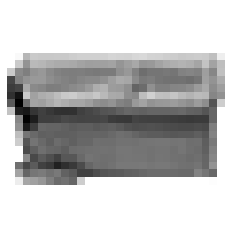

Our model predicted: Bag
The actual answer was: Bag


In [22]:
import random
rand = random.randint(0,9999)

plt.subplot()
plt.axis('off')
plt.imshow(test_images[rand], cmap=plt.cm.binary)
plt.show()

prediction = np.argmax(predictions[rand])
actual = class_names[test_labels[rand]]
print(f'Our model predicted: {class_names[prediction]}')
print(f'The actual answer was: {actual}')